# **Maven Roasters: Coffee Shop Sales: Exploratory Data Analysis**


Transaction records for Maven Roasters, a fictitious coffee shop operating out of three NYC locations. Dataset includes the transaction date, timestamp and location, along with product-level details.


## **Objectives:**
1. Understand the structure of the dataset.
2. Assess and handle data quality issues.
3. Perform descriptive analysis and summary statistics.
4. Visulize key variables and relationships.
5. Formulate hypothesis and identify areas for further analysis. 

## **1. Import relevant libraries and data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress future warnings and protect sensitive data
import warnings
warnings.simplefilter(action= 'ignore', category=FutureWarning)

In [41]:
# Import data
# The data file is in the excel's .xlsx format - So we will use read_xlsx() function from pandas library

data = pd.read_excel("Coffee Shop Sales.xlsx")

In [42]:
# top 5 records
data.head(5)

transaction_id transaction_date transaction_time  transaction_qty  \
0               1       2023-01-01         07:06:11                2   
1               2       2023-01-01         07:08:56                2   
2               3       2023-01-01         07:14:04                2   
3               4       2023-01-01         07:20:24                1   
4               5       2023-01-01         07:22:41                2   

   store_id   store_location  product_id  unit_price    product_category  \
0         5  Lower Manhattan          32         3.0              Coffee   
1         5  Lower Manhattan          57         3.1                 Tea   
2         5  Lower Manhattan          59         4.5  Drinking Chocolate   
3         5  Lower Manhattan          22         2.0              Coffee   
4         5  Lower Manhattan          57         3.1                 Tea   

            product_type               product_detail  
0  Gourmet brewed coffee                  Ethiopia Rg  
1        Brewed Chai tea     Spicy Eye Opener Chai Lg  
2          Hot chocolate            Dark chocolate Lg  
3            Drip coffee  Our Old Time Diner Blend Sm  
4        Brewed Chai tea     Spicy Eye Opener Chai Lg

In [43]:
# fetch last 5 records

data.tail(5)

transaction_id transaction_date transaction_time  transaction_qty  \
149111          149452       2023-06-30         20:18:41                2   
149112          149453       2023-06-30         20:25:10                2   
149113          149454       2023-06-30         20:31:34                1   
149114          149455       2023-06-30         20:57:19                1   
149115          149456       2023-06-30         20:57:19                2   

        store_id  store_location  product_id  unit_price product_category  \
149111         8  Hell's Kitchen          44        2.50              Tea   
149112         8  Hell's Kitchen          49        3.00              Tea   
149113         8  Hell's Kitchen          45        3.00              Tea   
149114         8  Hell's Kitchen          40        3.75           Coffee   
149115         8  Hell's Kitchen          64        0.80         Flavours   

             product_type        product_detail  
149111  Brewed herbal tea         Peppermint Rg  
149112   Brewed Black tea  English Breakfast Lg  
149113  Brewed herbal tea         Peppermint Lg  
149114   Barista Espresso            Cappuccino  
149115      Regular syrup        Hazelnut syrup

In [44]:
# Column names of the DataFrame
data.columns

Index(['transaction_id', 'transaction_date', 'transaction_time',
       'transaction_qty', 'store_id', 'store_location', 'product_id',
       'unit_price', 'product_category', 'product_type', 'product_detail'],
      dtype='object')

### **Data description:**
This is the description of the data we received from the data owner.

- `transaction_id`: 	Unique sequential ID representing an individual transaction
- `transaction_date`: 	Date of the transaction (MM/DD/YY)
- `transaction_time`: 	Timestamp of the transaction (HH:MM:SS)
- `transaction_qty`: 	Quantity of items sold
- `store_id`:           Unique ID of the coffee shop where the transaction took place
- `store_location`: 	Location of the coffee shop where the transaction took place
- `product_id`: 	    Unique ID of the product sold
- `unit_price`: 	    Retail price of the product sold
- `product_category`: 	Description of the product category
- `product_type`: 	    Description of the product type
- `product_detail`: 	Description of the product detail

#### **Key Takeaways:**

- Upon a first glance of the `data.head(5)` and `data.tail(5)` of the data, it appears that the data is well structured.
- If it deviates from this assumption we might need to structure it.
- The variables that we see here must follow a some logic, which is:
    - The variables `store_id`, `store_location`, `product_id`, `product_category`,	`product_type`,	`product_detail` should be categorical features.
    - The variables `transaction_id	` is supposed to be a unique feature.
    - The variables `transaction_date` and `transaction_time` are date and time features.
    - The variables `transaction_qty` and `unit_price` should be numerical variables

## 2. Inspect the data

In [45]:
# Shape of the DataFrame
data.shape

(149116, 11)

In [46]:
# Summary of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


#### **Key Takeaway:**
- The data have `149116 rows` and `10 columns`. 
- The `transaction_time` column is currently stored as a string and needs to be converted to `datetime64`.
- We will use the `pd.to_datetime()` function with the format `%H:%M:%S` and extract the time using `.dt.time`.
- All other variables are already in suitable datand concise.

## 3. Data Cleaning
- Check data for missing values, and duplicated records.

### 3.1 Missing values/ Nulls

In [47]:
# Check for missing or null values
data.isna().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

### 3.2 Duplicated records

In [48]:
# Check for duplicated records
data.duplicated().sum()

0

#### **Key Takeaways:**
- There aren't any obivious nulls in the DataFrame.
- There aren't any duplicated records in the DataFrame.
- Data appears to be without null values and duplicated records.

## 4. Feature Engineering
- For further analysis based on date and time it is required to breakdown the date and time variables into hour, day and month.
- From `transaction_date` we can extract additional features, e.g. day, month.
- From `transaction_time` we can extract additional feature, e.g hour.
- It will be pointless to extaract year from the date as data is of 2023 only.
- Convert a few variables (`store_id`,`store_location`,`product_id`,`product_category`) to category from object for better analysis and memory optimization
- Create a revenue per transaction variable - `transaction_value`

In [49]:
# Create a revenue variable by getting transaction_amount for each variable - multiplying transaction_qty and unit_price

data['transaction_value'] = data['transaction_qty'] * data['unit_price']
data['transaction_value']

0         6.00
1         6.20
2         9.00
3         2.00
4         6.20
          ... 
149111    5.00
149112    6.00
149113    3.00
149114    3.75
149115    1.60
Name: transaction_value, Length: 149116, dtype: float64

In [50]:
# Extract month from the date column

data['month'] = data['transaction_date'].dt.month_name()
data['month'] = data['month'].astype('category')

# Extract day of the week from the date

data['day_of_week'] = data['transaction_date'].dt.day_name()
data['day_of_week'] = data['day_of_week'].astype('category')

# Extract day from transaction date

data['day'] = data['transaction_date'].dt.day

In [51]:
# Extract hour from the transaction_time

# As the column is object(string) we split it by ":" and get first object
data['transaction_time'] = data['transaction_time'].astype(str)
data['hour'] = data['transaction_time'].str.split(":").str[0]
data['hour'] = data['hour'].astype('int64')

In [52]:
# Convert store_location, product_category and store_id into categorical variable

data['store_id'] = data['store_id'].astype('category')
data['store_location'] = data['store_location'].astype('category')
# data['product_id'] = data['product_id'].astype('category')
# data['product_category'] = data['product_category'].astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   transaction_id     149116 non-null  int64         
 1   transaction_date   149116 non-null  datetime64[ns]
 2   transaction_time   149116 non-null  object        
 3   transaction_qty    149116 non-null  int64         
 4   store_id           149116 non-null  category      
 5   store_location     149116 non-null  category      
 6   product_id         149116 non-null  int64         
 7   unit_price         149116 non-null  float64       
 8   product_category   149116 non-null  object        
 9   product_type       149116 non-null  object        
 10  product_detail     149116 non-null  object        
 11  transaction_value  149116 non-null  float64       
 12  month              149116 non-null  category      
 13  day_of_week        149116 non-null  category

**Note**: 
- The variables, `store_location`, `product_category` and `store_id` are clearly categorical and not arbitrary strings.  
- String operations are not required on these columns.  

## 5. Univariate Analysis and Summary Statistics
- Systematically review each variable to summarize the data.

### **5.1 Numerical variables**
- `transaction_qty`, `unit_price` and `transaction_value` are numeric variables.
- Desscriptive statistics for numerical variables will be `Count`, `Mean`, `Standard Deviation`, `Minimum and Maximum`, and `Percentiles (25% and 75%)`.
- Additionally we will look at `Distribution` and `Outliers`.

In [53]:
# Summary descriptive statistics

data[['transaction_qty', 'unit_price', 'transaction_value']].describe()

transaction_qty     unit_price  transaction_value
count    149116.000000  149116.000000      149116.000000
mean          1.438276       3.382219           4.686367
std           0.542509       2.658723           4.227099
min           1.000000       0.800000           0.800000
25%           1.000000       2.500000           3.000000
50%           1.000000       3.000000           3.750000
75%           2.000000       3.750000           6.000000
max           8.000000      45.000000         360.000000

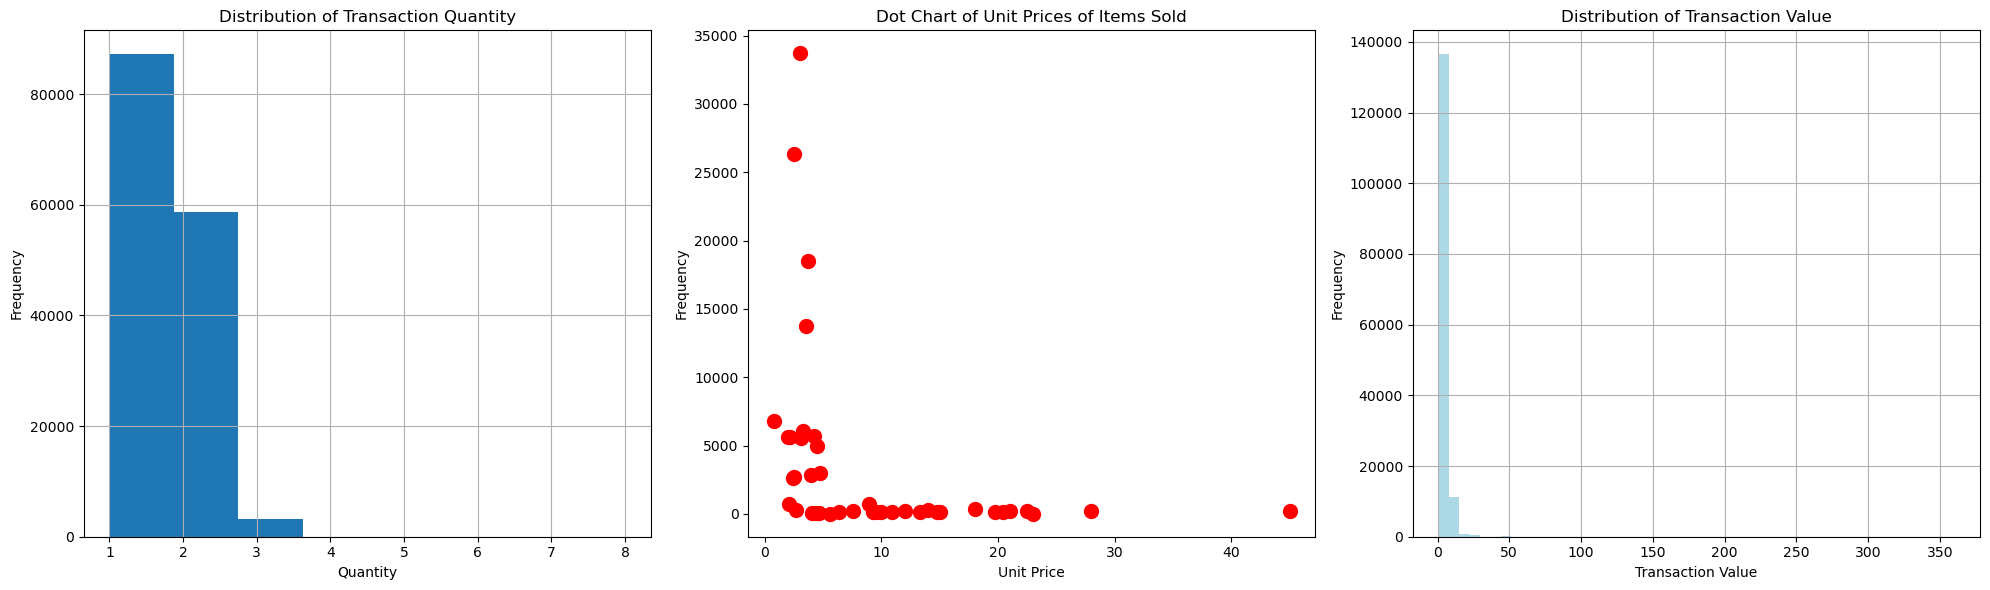

In [54]:
# Frequency Distribution of the Transaction Quantity and Unit Price of the itmes sold

plt.figure(figsize=(20, 6))

# Histogram: Transaction quantity 
plt.subplot(1, 3, 1)
data['transaction_qty'].hist(bins=8)
plt.title('Distribution of Transaction Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')

# Dot chart: Unit price of the itmes sold

unit_price_count = data['unit_price'].value_counts().sort_index()

plt.subplot(1, 3, 2)
plt.scatter(unit_price_count.index, unit_price_count.values, color= "red", s= 100)
plt.title('Dot Chart of Unit Prices of Items Sold')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')

# Histogram : Tranaction value
plt.subplot(1, 3, 3)
data['transaction_value'].hist(bins=50, color='lightblue')
plt.title('Distribution of Transaction Value')
plt.xlabel('Transaction Value')
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()

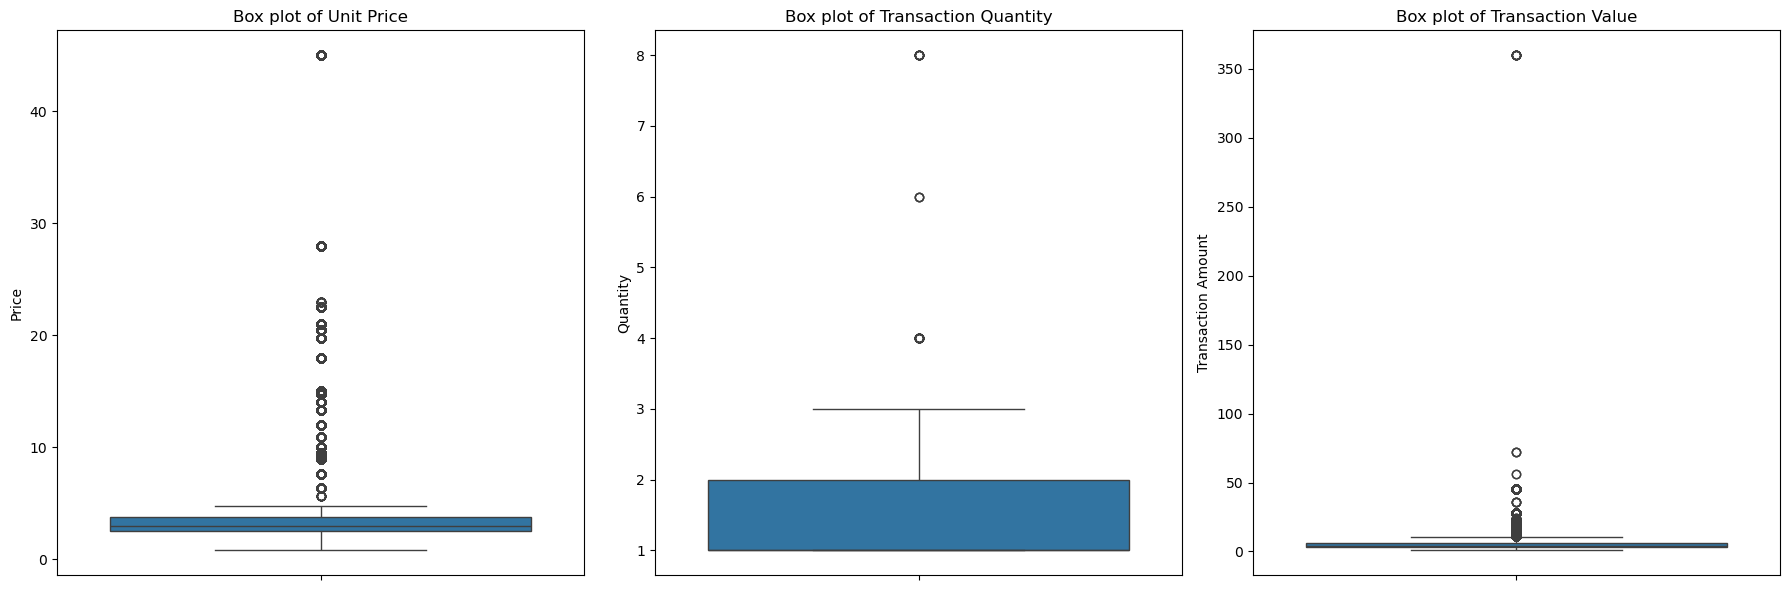

In [55]:
# Distribution through Boxplot

plt.figure(figsize=(18, 6))

# Boxplot 1: Distribution of Unit Price
plt.subplot(1, 3, 1)
sns.boxplot(data['unit_price'])
plt.title('Box plot of Unit Price')
plt.ylabel('Price')

# Boxplot 2: Distribution of Transaction Quantity
plt.subplot(1, 3, 2)
sns.boxplot(data['transaction_qty'])
plt.title('Box plot of Transaction Quantity')
plt.ylabel('Quantity')

# Boxplot 3: Distribution of Transaction Value
plt.subplot(1, 3, 3)
sns.boxplot(data['transaction_value'])
plt.title('Box plot of Transaction Value')
plt.ylabel('Transaction Amount')

plt.tight_layout()
plt.show()

In [56]:
# Calculate last few percentiles of transaction_value

print('98th percentile:', data['transaction_value'].quantile(0.98))
print('99th Percentile:', data['transaction_value'].quantile(0.99))
print('99.9th Percentile:', data['transaction_value'].quantile(0.999))
print('100th Percentile:', data['transaction_value'].quantile(1))

98th percentile: 11.25
99th Percentile: 18.0
99.9th Percentile: 45.0
100th Percentile: 360.0


**Note:**
- The 100th percentile represents an outlier.
- We can create an upper limit to that excludes 100th percentile or 99.9th percentile. 

**Analysis Plan:**
- There is a significant difference between 99.9th percentile, 100th percentile and 99th percentile.  
- We will generate a new DataFrame that excludes 99.9th percentile and further, to gain clearer view of the data while exploring.
- However we will use complete data for statistical analysis, as the outliers are rare and true.

In [57]:
# Create dataframe that excludes 99.9th percentile and further

percentile_100 = data['transaction_value'].quantile(1)
percentile_999 = data['transaction_value'].quantile(0.999)

# Create a trimmed DataFrame
temp_data_filtered = data[data['transaction_value'] < percentile_999]
print(temp_data_filtered.shape)

(148921, 16)


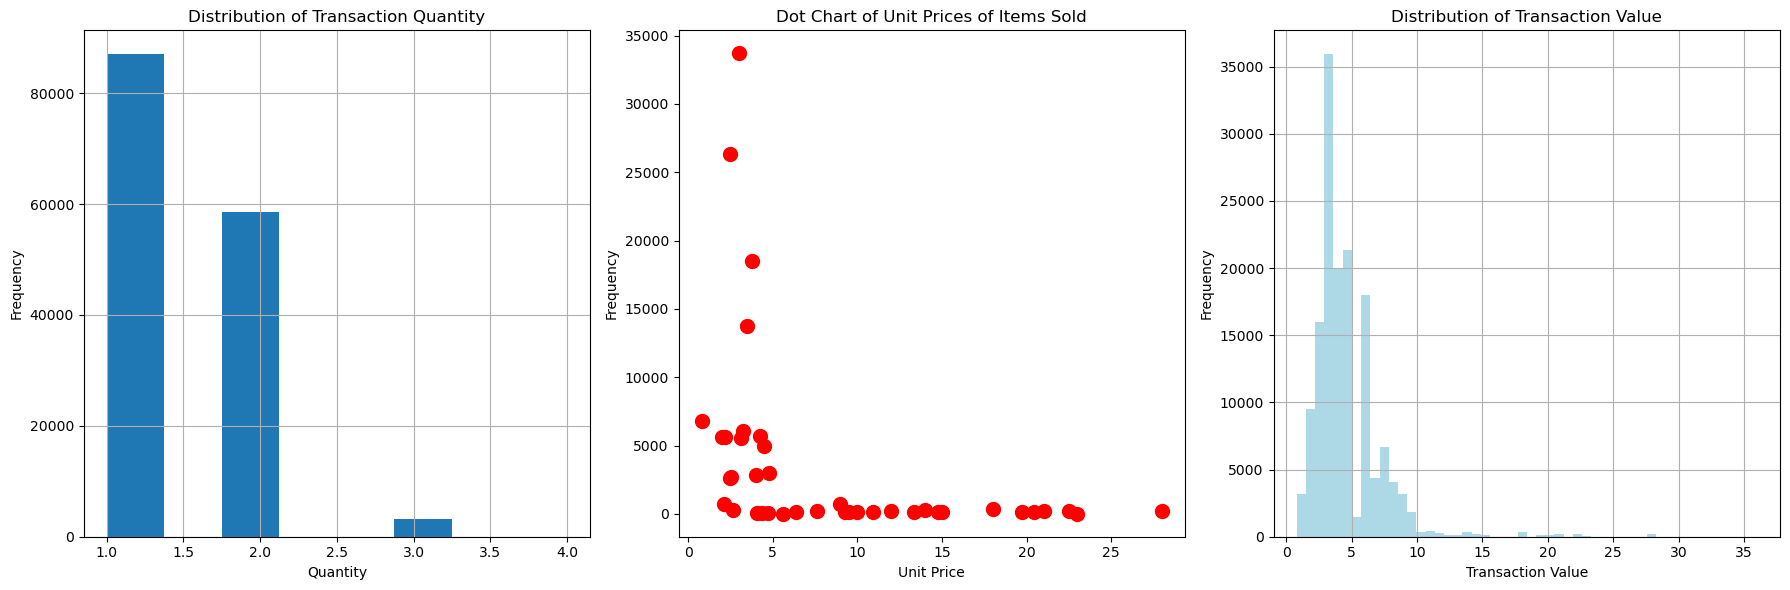

In [58]:
# Frequency Distribution of the Transaction Quantity, Unit Price of the itmes sold and Transaction Value [Trimmed Dataset]

plt.figure(figsize=(18, 6))

# Histogram: Transaction quantity 
plt.subplot(1, 3, 1)
temp_data_filtered['transaction_qty'].hist(bins=8)
plt.title('Distribution of Transaction Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')

# Dot chart: Unit price of the itmes sold

unit_price_count_df = temp_data_filtered['unit_price'].value_counts().sort_index()

plt.subplot(1, 3, 2)
plt.scatter(unit_price_count_df.index, unit_price_count_df.values, color= "red", s= 100)
plt.title('Dot Chart of Unit Prices of Items Sold')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')

# Histogram : Tranaction value
plt.subplot(1, 3, 3)
temp_data_filtered['transaction_value'].hist(bins=50, color='lightblue')
plt.title('Distribution of Transaction Value')
plt.xlabel('Transaction Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

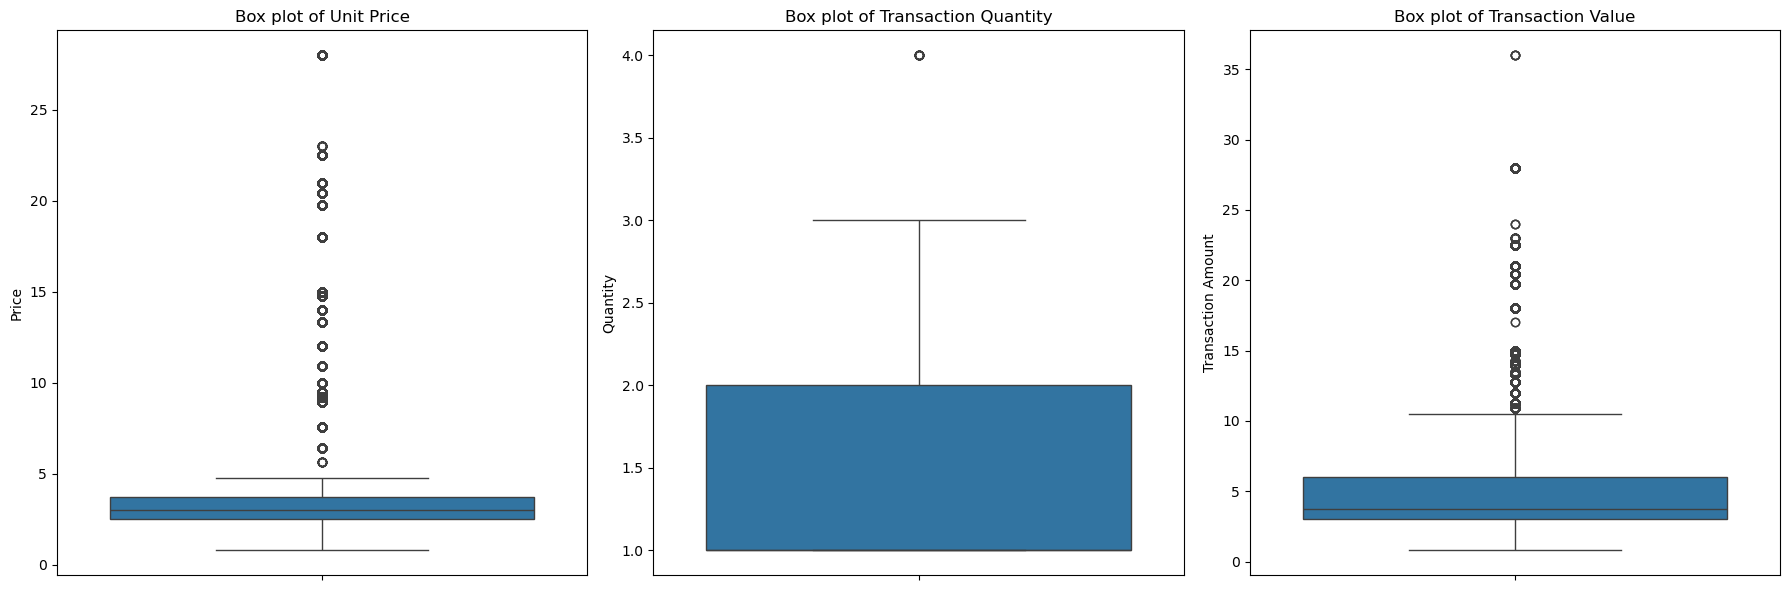

In [59]:
# Distribution through Boxplot [Trimmed dataset]

plt.figure(figsize=(18, 6))

# Boxplot 1: Distribution of Unit Price
plt.subplot(1, 3, 1)
sns.boxplot(temp_data_filtered['unit_price'])
plt.title('Box plot of Unit Price')
plt.ylabel('Price')

# Boxplot 2: Distribution of Transaction Quantity
plt.subplot(1, 3, 2)
sns.boxplot(temp_data_filtered['transaction_qty'])
plt.title('Box plot of Transaction Quantity')
plt.ylabel('Quantity')

# Boxplot 3: Distribution of Transaction Value
plt.subplot(1, 3, 3)
sns.boxplot(temp_data_filtered['transaction_value'])
plt.title('Box plot of Transaction Value')
plt.ylabel('Transaction Amount')

plt.tight_layout()
plt.show()

In [60]:
# Calculate the proportions of the first and second most frequent transaction quantities
transaction_qty_proportions = data['transaction_qty'].value_counts(normalize=True)

one_qty_proportion = transaction_qty_proportions.iloc[0] * 100
two_qty_proportion = transaction_qty_proportions.iloc[1] * 100

print(f"Proportion of 1 units bought: {one_qty_proportion: .2f}%")
print(f"Proportion of 2 units bought: {two_qty_proportion: .2f}%")

Proportion of 1 units bought:  58.45%
Proportion of 2 units bought:  39.33%


#### **Key Takeaways:**

- All three columns (`transaction_qty`, `unit_price`, `transaction_value`) have 149,116 rows.  
- There are no missing values, ensuring consistent data for analysis.

**1. Transaction Quantity**
- `Mean`: Average quantity is 1.44. Most transactions involve small quantities.  
- `Median (50%)`: Median is 1. Half the transactions have a quantity of 1.  
- `Standard Deviation (std)`: Low standard deviation (0.54) shows minimal variation.  
- `Range`: Minimum is 1, maximum is 8. The range is narrow.  
- `Outliers`: The maximum value (8) is significantly higher than the 75th percentile (2), suggesting possible outliers.  
- `Insight`: Most transactions involve 1 or 2 items, indicating small-scale purchases. Quantities of 4 to 8 are rare and might represent bulk orders or special cases.

**2. Unit Price**
- `Mean`: Average unit price is 3.38. A few items are highly priced (max: 45).  
- `Median (50%)`: Median is 3.00. Distribution is symmetric with slight skewness.  
- `Standard Deviation`: Moderate variation with a standard deviation of 2.66.  
- `IQR`: Most unit prices lie between 2.50 (25th percentile) and 3.75 (75th percentile).  
- `Outlier`: The maximum unit price of 45 is significantly higher than the 75th percentile (3.75), indicating outliers.  
- `Insight`: The majority of products are priced affordably, but a few high-priced items could represent premium products or niche offerings.

**3. Transaction Value**
- `Mean`: Average value is 4.69. Some transactions are significantly high (max: 360).  
- `Median (50%)`: Median is 3.75. High-value outliers are skewing the data.  
- `Standard Deviation`: High variation with a standard deviation of 4.23.  
- `IQR`: Most values are between 3.00 (25th percentile) and 6.00 (75th percentile).  
- `Outlier`: The maximum transaction value of 360 is an extreme outlier compared to the 75th percentile (6.00), suggesting a small number of very high-value transactions.  
- `Insight`: High-value transactions could represent large or premium purchases. Analyzing these further may help identify key customers or special sales events.

### **5.2 Categorical variables**
- Key stats would include `Count`, `Unique`, `Top`, `Frequency`

In [61]:
# Summary Statistics of categorical columns

data[['store_id', 'store_location','product_id', 'product_category', 'product_type', 'product_detail' ]].describe(include = ['object', 'category'])

store_id  store_location product_category     product_type  \
count     149116          149116           149116           149116   
unique         3               3                9               29   
top            8  Hell's Kitchen           Coffee  Brewed Chai tea   
freq       50735           50735            58416            17183   

             product_detail  
count                149116  
unique                   80  
top     Chocolate Croissant  
freq                   3076

In [62]:
# Count and Frequency on Product Categories and Store Locations

store_count = data['store_location'].value_counts().reset_index()
product_category_count = data['product_category'].value_counts().reset_index()

print(store_count)
print(product_category_count)

    store_location  count
0   Hell's Kitchen  50735
1          Astoria  50599
2  Lower Manhattan  47782
     product_category  count
0              Coffee  58416
1                 Tea  45449
2              Bakery  22796
3  Drinking Chocolate  11468
4            Flavours   6790
5        Coffee beans   1753
6           Loose Tea   1210
7             Branded    747
8  Packaged Chocolate    487


#### **Key Takeaways:**
1. **Stores and Locations**:
    - There are 3 stores at 3 locations.
    - Store no. 8 and Hell's Kitchen have highets activity with 50735 orders in the period.
2. **Products**:
    - There are 80 unique products and product 71 is most sold product.
    - There are 9 discinct product categories, 29 different product types and 80 unique product details.
    - Coffee is the top category with 58416 transactions.

### **5.3 Temporal variables**
- `transaction_date` and `transaction_time` are temporal variables - variables that capture time.
- We will compute `minimun`, `maximum`, `range` and `total number of days` from the data to summarize the temporal variables.
- For transaction_time variable, we may explore hourly pattern in a later stage of the analysis. 

In [63]:
# Start and end date of the transactions

start_date = data['transaction_date'].min()
end_date = data['transaction_date'].max()
print("Start date: ", start_date)
print("End date: ",end_date)

# Number of days the data is provided--> Count the number of unique dates in the dataset

num_days = data['transaction_date'].nunique()
print("The provided data is of: ",num_days, "days.")

Start date:  2023-01-01 00:00:00
End date:  2023-06-30 00:00:00
The provided data is of:  181 days.


### **Key Takeaway:**  
- The dataset covers a period of 181 days, spanning from **2023-01-01** to **2023-06-30**.  
- Each row in the DataFrame represents a single transaction.  

**Analysis Plan**  
1. **Frequency Analysis**  
   - Analyze transactions by:  
     - Hour of the day  
     - Day of the week  
     - Month  

2. **Seasonality**  
   - Identify patterns or trends in the key variables (`transactions`, `transaction_value`) over time.  

## **6. Data Exploration:** Products

In [64]:
# Understanding relationship between Product Catgeory, Product Type, Product id and Product Detail

prodcat_prodtype = data.groupby(['product_category', 'product_type', 'product_id', 'product_detail'])['transaction_value'].size().reset_index()
prodcat_prodtype.drop(columns= ['transaction_value'], inplace=True)
prodcat_prodtype

product_category       product_type  product_id           product_detail
0            Bakery           Biscotti          69        Hazelnut Biscotti
1            Bakery           Biscotti          74          Ginger Biscotti
2            Bakery           Biscotti          76  Chocolate Chip Biscotti
3            Bakery             Pastry          71      Chocolate Croissant
4            Bakery             Pastry          73         Almond Croissant
..              ...                ...         ...                      ...
75              Tea   Brewed Green tea          47    Serenity Green Tea Lg
76              Tea  Brewed herbal tea          42           Lemon Grass Rg
77              Tea  Brewed herbal tea          43           Lemon Grass Lg
78              Tea  Brewed herbal tea          44            Peppermint Rg
79              Tea  Brewed herbal tea          45            Peppermint Lg

[80 rows x 4 columns]

In [65]:
# Treemap to visualize relationship between Product Category, Product Type, Product detail and Product ID"

import plotly.express as px

prods_treemap = px.treemap(prodcat_prodtype, path=['product_category', 'product_type', 'product_detail', 'product_id'],
                     title= "Relationship between Product Category, Product Type, Product detail and Product ID",
                     width= 1300,
                     height= 800,
                     color= 'product_category',
                     color_discrete_sequence= px.colors.qualitative.Set3)

prods_treemap.show()

In [66]:
# Key figures regarding products

n_prod_details = data['product_detail'].nunique()
n_prod_id = data['product_id'].nunique()
n_prod_type= data['product_type'].nunique()
n_prod_cat =  data['product_category'].nunique()

print(f"Total number of products is {n_prod_details}.")
print(f"Total number of product IDs is {n_prod_id}.")
print(f"Total number of product types is {n_prod_type}.")
print(f"Total number of product categories is {n_prod_cat}.")

Total number of products is 80.
Total number of product IDs is 80.
Total number of product types is 29.
Total number of product categories is 9.


**Note:** All the products sold have unique unit price.

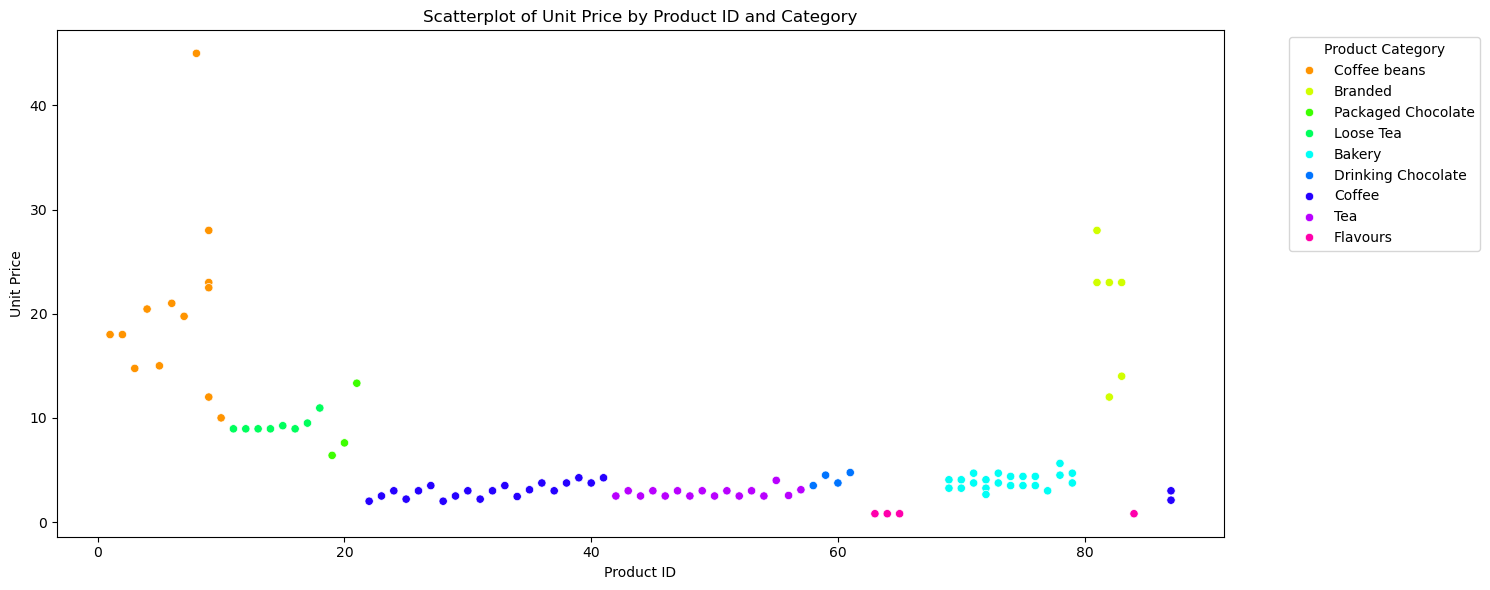

In [67]:
# Product Categorisation and Unit Prices
prod_unit_price = data.groupby(['product_category', 'product_type', 'product_id', 'product_detail', 'unit_price'])['transaction_value'].size().reset_index().sort_values(by='unit_price', ascending= False)

# Scatterplot: Unit Price by Product ID and Category

plt.figure(figsize= (15, 6))
sns.scatterplot(data= prod_unit_price,
                x= 'product_id',
                y= 'unit_price',
                hue= 'product_category', 
                palette=sns.color_palette('hsv', n_colors=prod_unit_price['product_category'].nunique()))

plt.title('Scatterplot of Unit Price by Product ID and Category')
plt.xlabel('Product ID')
plt.ylabel('Unit Price')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [68]:
# Product Categories of top 20 high value products
prod_unit_price['product_category'].head(20).value_counts()

product_category
Coffee beans          12
Branded                6
Packaged Chocolate     1
Loose Tea              1
Name: count, dtype: int64

In [69]:
# Product Categories of top 20 low value products
prod_unit_price['product_category'].tail(20).value_counts()

product_category
Tea         8
Coffee      8
Flavours    4
Name: count, dtype: int64

#### **Key Takeaways:**
- The dataset consists of `80 unique products`, organized into `29 distinct product types`, which are further grouped into `9 product categories`.
- Each product detail is associated with a unique product ID.
- The product detail and product IDs can be used interchangeably for identification purposes.
- `Category Price Bands`: Distinct pricing exists among categories, with Coffee beans, Branded and Bakery at higher ranges compared to Tea or Flavours.
- The 20 highest-priced products are primarily from the Coffee Beans and Branded categories, which include items such as Clothing and Houseware.
- The 20 lowest-priced products are primarily from Tea, Coffee and Flavours. 
- `Price Outliers`: Certain Coffee beans and Branded products show unusually high prices, likely premium items.

## **6. Data Exploration:** Transactions
1. `Monthly Transaction Frequency Distribution` – Analyzing the total number of transactions recorded in each month.
2. `Monthly Transaction Distribution` – Visualizing the proportion of transactions that occurred in each month using a pie chart or summary statistics.
3. `Month-on-Month Change in Transaction Counts` – Calculating the percentage change in the number of transactions from one month to the next.
4. `Average Daily Transaction Count per Month` – Calculating the average number of transactions per day for each month.
5. `Daily Transaction Distribution` – Analyzing how transactions are distributed across individual days.
6. `Transaction Distribution by Day of the Week` – Examining the number of transactions that occur on each day of the week.
7. `Hourly Transaction Frequency` – Analyzing the frequency of transactions by hour to identify peak activity times.

In [70]:
# Total number of transactions in the Dataset

total_transactions = len(data)
print(f"Total number of transaction in the data: {total_transactions}")

Total number of transaction in the data: 149116


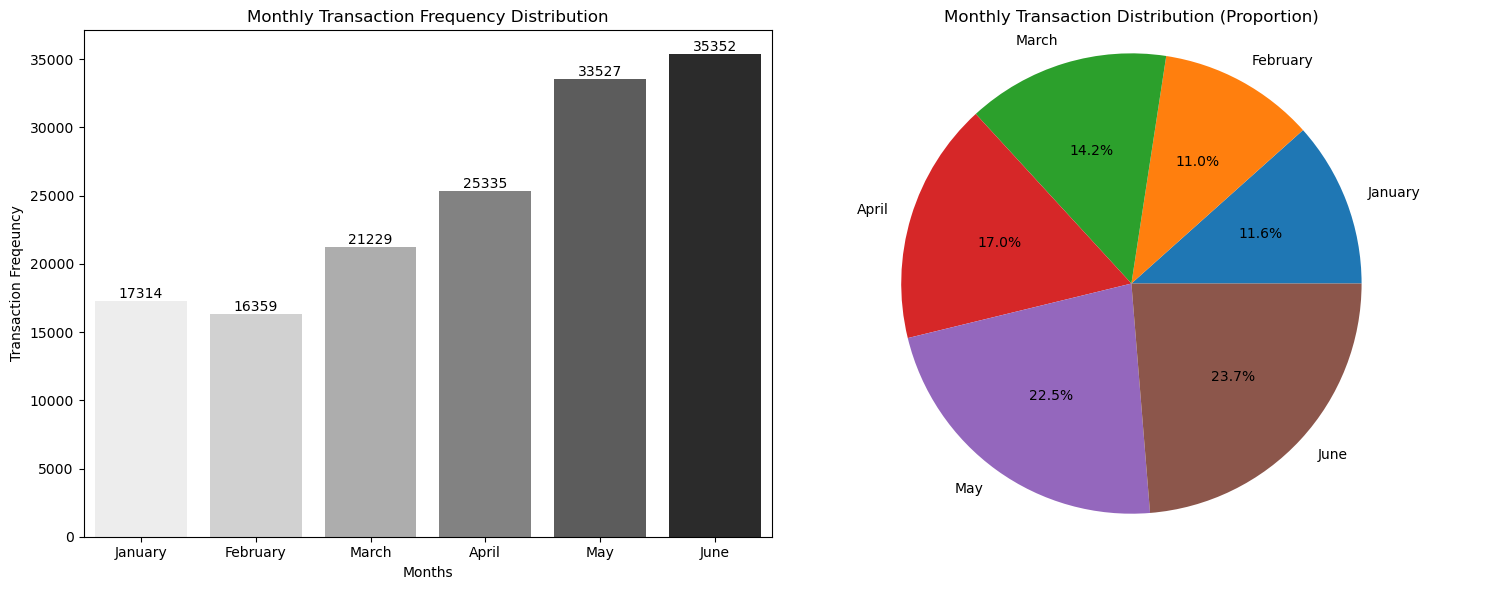

In [71]:
# Monthly Transaction Frequency Distribution

monthly_transactions = data['month'].value_counts().reset_index()
monthly_transactions.columns= ['month', 'transaction_count']
month_order = ['January', 'February', 'March', 'April', 'May', 'June']

monthly_transactions['month'] = pd.Categorical(monthly_transactions['month'], categories= month_order, ordered=True)
monthly_transactions = monthly_transactions.sort_values(by='month')
monthly_transactions

plt.figure(figsize=(15,6))

# Barplot : TMonthly Transaction Frequency Distribution
plt.subplot(1, 2, 1)
a = sns.barplot(x=monthly_transactions['month'], 
                y=monthly_transactions['transaction_count'], 
                palette='Greys', 
                hue= monthly_transactions['month'], 
                legend=False)
                
plt.title('Monthly Transaction Frequency Distribution')
plt.xlabel('Months')
plt.ylabel('Transaction Freqeuncy')

# Add values at the top of each bar for context
for i, j in enumerate(monthly_transactions['transaction_count']):
    a.text(i, j, f'{j}', ha= 'center', va='bottom')


# Pie chart : Monthly Transaction Distribution
plt.subplot(1, 2, 2)
plt.pie(monthly_transactions['transaction_count'], 
        labels= monthly_transactions['month'], 
        autopct='%1.1f%%')
plt.title('Monthly Transaction Distribution (Proportion)')
plt.axis('equal')

plt.tight_layout()
plt.show()

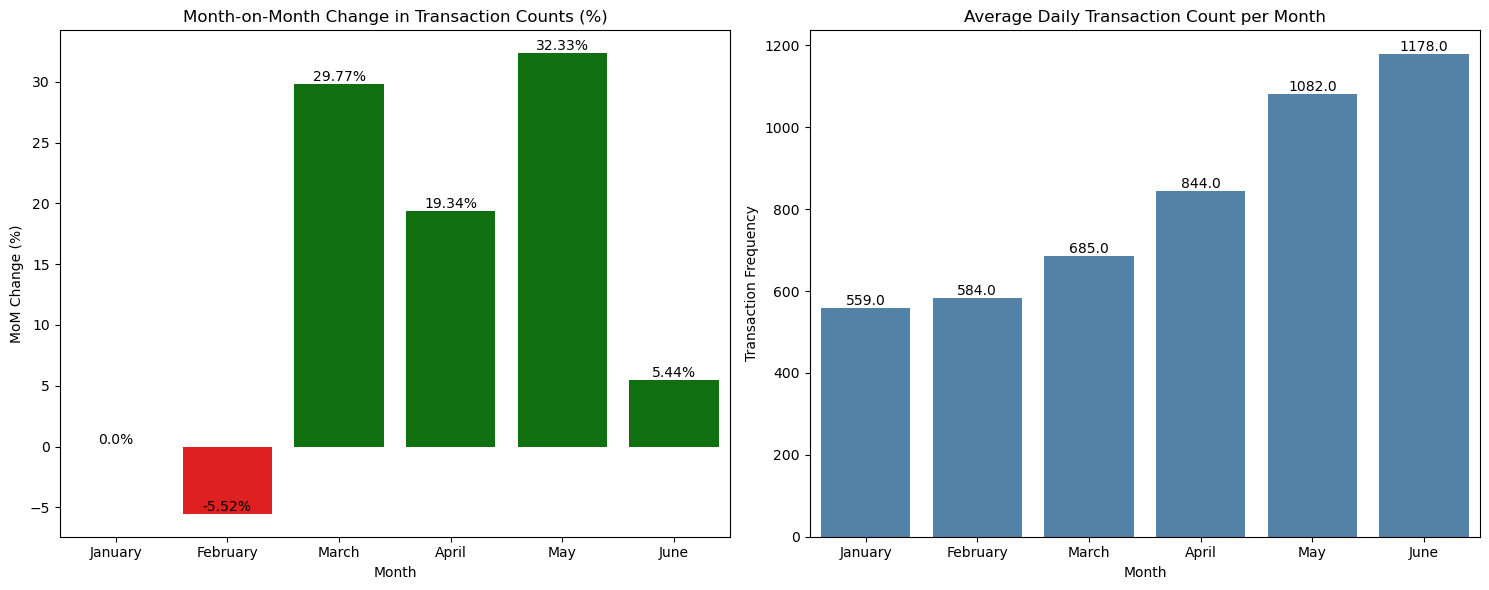

month  transaction_count  mom_change  days_in_month  \
4   January              17314        0.00             31   
5  February              16359       -5.52             28   
3     March              21229       29.77             31   
2     April              25335       19.34             30   
1       May              33527       32.33             31   
0      June              35352        5.44             30   

   avg_daily_transactions  
4                   559.0  
5                   584.0  
3                   685.0  
2                   844.0  
1                  1082.0  
0                  1178.0

In [72]:
# Month-on-Month Change in Transaction Counts (%)
# Average Daily Transaction Count per Month

# Add column for Month on Month change in the transaction count
monthly_transactions['mom_change'] = (monthly_transactions['transaction_count'].pct_change()* 100).round(2)
monthly_transactions['mom_change'] = monthly_transactions['mom_change'].fillna(0)

# Add column for Month-on-Month Change in Average Daily Transactions
days_in_month = {'January': 31, 'February': 28, 'March': 31, 'April': 30, 'May': 31, 'June': 30}
monthly_transactions['days_in_month'] = monthly_transactions['month'].map(days_in_month)
monthly_transactions['avg_daily_transactions'] = (monthly_transactions['transaction_count'] / monthly_transactions['days_in_month']).round(0)

plt.figure(figsize=(15, 6))

# Barplot 1: Month-on-Month Change in Transaction Count (%) (with conditional coloring)

plt.subplot(1, 2, 1)
colors = ['green' if i > 0 else 'red' for i in monthly_transactions['mom_change']]

b = sns.barplot(x=monthly_transactions['month'], 
                y=monthly_transactions['mom_change'], 
                palette= colors,
                hue=monthly_transactions['month'],
                legend= False)

for i, j in enumerate(monthly_transactions['mom_change']):
    b.text(i, j, f"{j}%", ha= "center",va= "bottom")

plt.title("Month-on-Month Change in Transaction Counts (%)")
plt.xlabel("Month")
plt.ylabel("MoM Change (%)")

# Barplot 2: Average Daily Transactions by Month

plt.subplot(1, 2, 2)
c= sns.barplot(x= monthly_transactions['month'], 
               y= monthly_transactions['avg_daily_transactions'],
               color= 'steelblue')

for i, j in enumerate(monthly_transactions['avg_daily_transactions']):
    c.text(i, j, f"{j}", ha= "center", va= 'bottom')

plt.title("Average Daily Transaction Count per Month")
plt.xlabel("Month")
plt.ylabel("Transaction Frequency")

plt.tight_layout()
plt.show()

display(monthly_transactions)

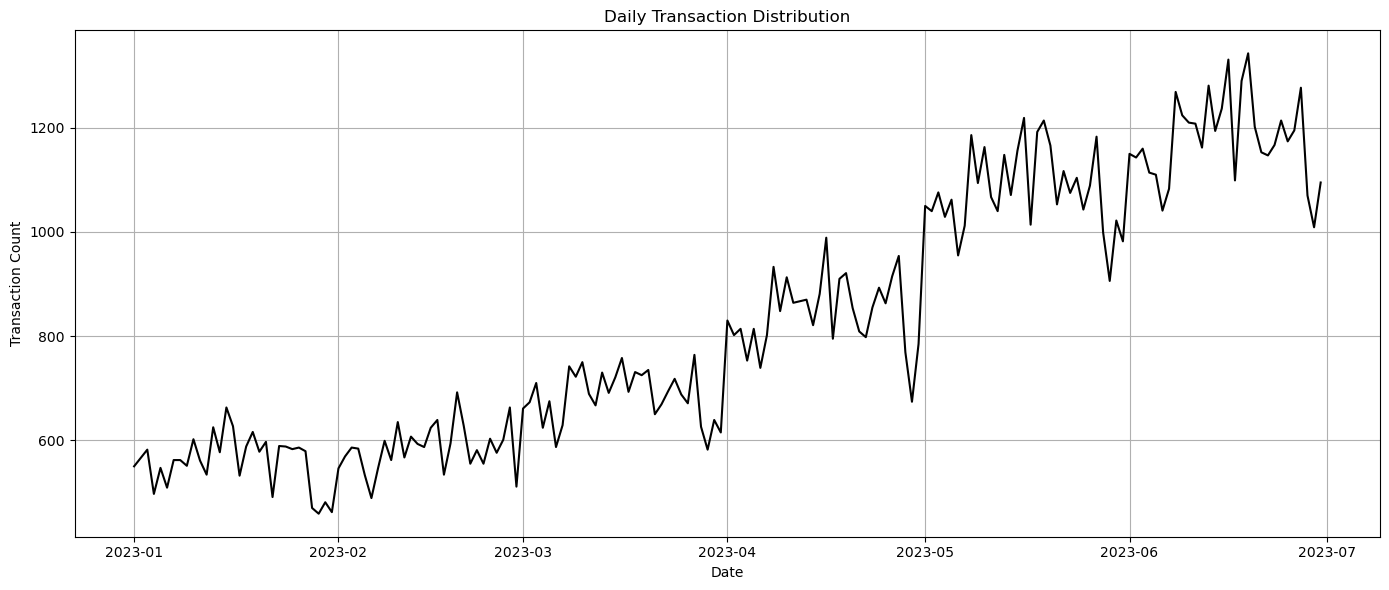

In [73]:
# Daily Transaction Distribution

daily_transactions = data['transaction_date'].value_counts().sort_index()

plt.figure(figsize=(14,6))
plt.plot(daily_transactions.index, daily_transactions.values, linestyle= '-', color= 'black')

plt.title('Daily Transaction Distribution')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.grid(True)

plt.tight_layout()
plt.show()

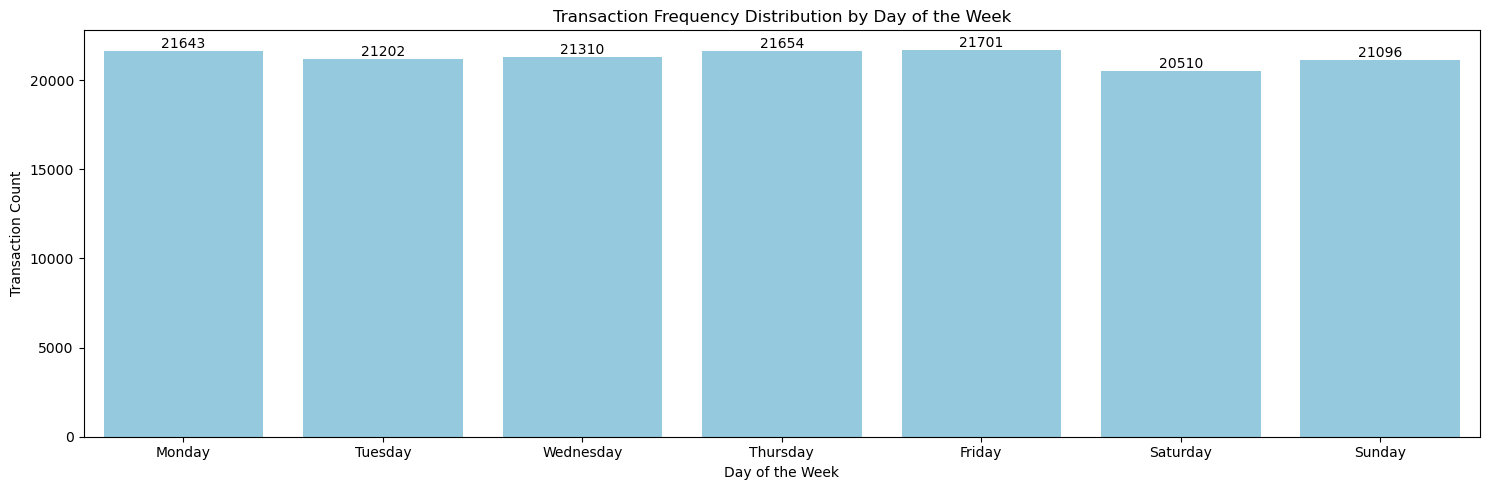

In [74]:
# Transaction Distribution by the Day of the Weeek

daywise_transaction = data['day_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
daywise_transaction

plt.figure(figsize= (15, 5))
d= sns.barplot(x= daywise_transaction.index, 
               y= daywise_transaction.values, 
               color='skyblue')

plt.title('Transaction Frequency Distribution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Transaction Count')
plt.tight_layout()

for i, j in enumerate(daywise_transaction):
   d.text(i, j, f'{j}', ha= 'center', va='bottom')

plt.tight_layout()
plt.show()

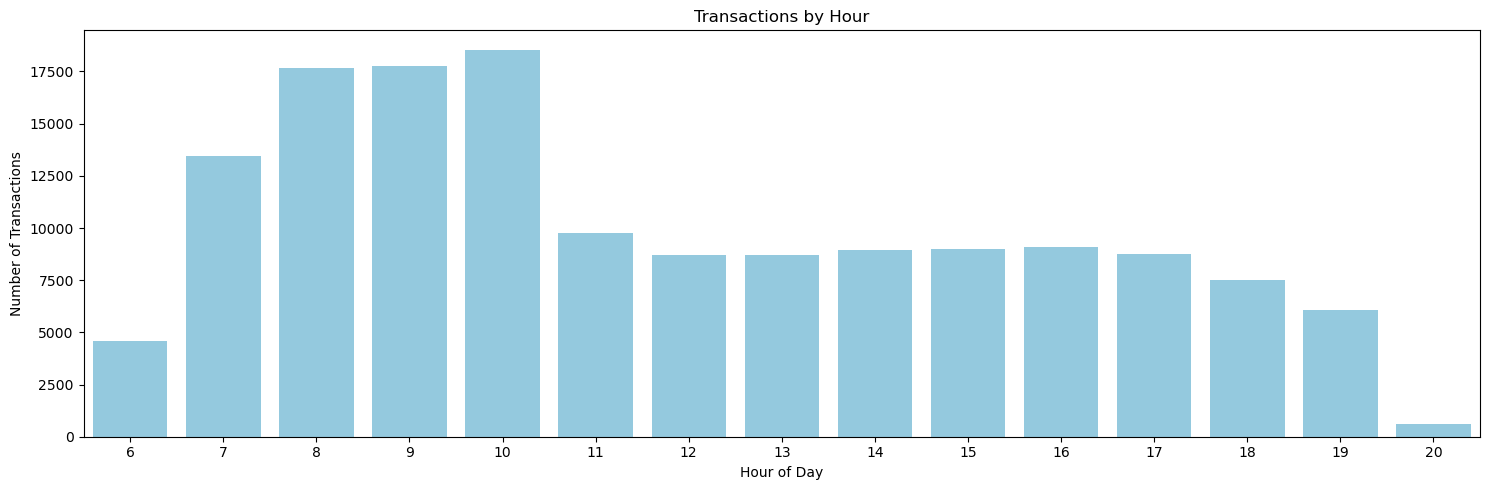

In [75]:
# Hourly Transaction Frequency

hourly_transaction = data['hour'].value_counts().sort_index()
hourly_transaction = hourly_transaction.reset_index()
hourly_transaction.columns = ['Hour', 'Transaction Count']
hourly_transaction['Hour'] = hourly_transaction['Hour'].astype(int)

plt.figure(figsize=(15, 5))
m = sns.barplot(x=hourly_transaction['Hour'], 
                y=hourly_transaction['Transaction Count'], 
                color= 'skyblue')

plt.title('Transactions by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')

plt.tight_layout()
plt.show()

#### **Key Takeaways:**
- `Upward Trend`: There is a noticeable increase in transaction frequency from January to June, evident in both the Transaction by Month and Transaction by Day visualizations, indicating steady month-over-month growth.
- `Seasonality`: The Transaction by Day visualization shows fluctuations with periodic increases and decreases in transaction counts. While there is evidence of monthly seasonality, full-year data is required to confirm an annual cycle.
- `Daywise Consistency`: The Transaction Frequency by Days of the Week shows that transaction counts remain relatively consistent across all days.
- `Peak Hours`: Transactions peak between 8 AM and 10 AM, marking this as the busiest time of the day.
- `Midday Dip`: There is a slight drop in transactions around 12 PM to 1 PM.
- `Evening Increase`: Transaction counts see a slight uptick after 2 PM.
- `Overall Decline`: Transaction volume decreases as the day progresses, with a significant drop after 5 PM.

**Further Plan:** 
- Predictive Analysis: Transaction forecasting 
- Output: Expected daily/weekly/monthly transactions for upcoming period. 

**Note:** However transaction frequency does not tell the complete picture, revenue distribution over time and locations is also important. 

## **7. Data Exploration:** Sales Amount
1. Distribution of Sales over Months
1. Distribution of Sales over Months (Proportion)
1. Month on Month Change in Sales
1. Average Daily Sales per Month
1. Sales Distribution Across Days
1. Sales by Days of the Week
1. Hourly Sales Trend
1. High Value Transactions

In [76]:
# Total sales amount

total_sales = data['transaction_value'].sum().round(2)
print(f"The Maven Roasters have generated {total_sales} dollars through sales.")

The Maven Roasters have generated 698812.33 dollars through sales.


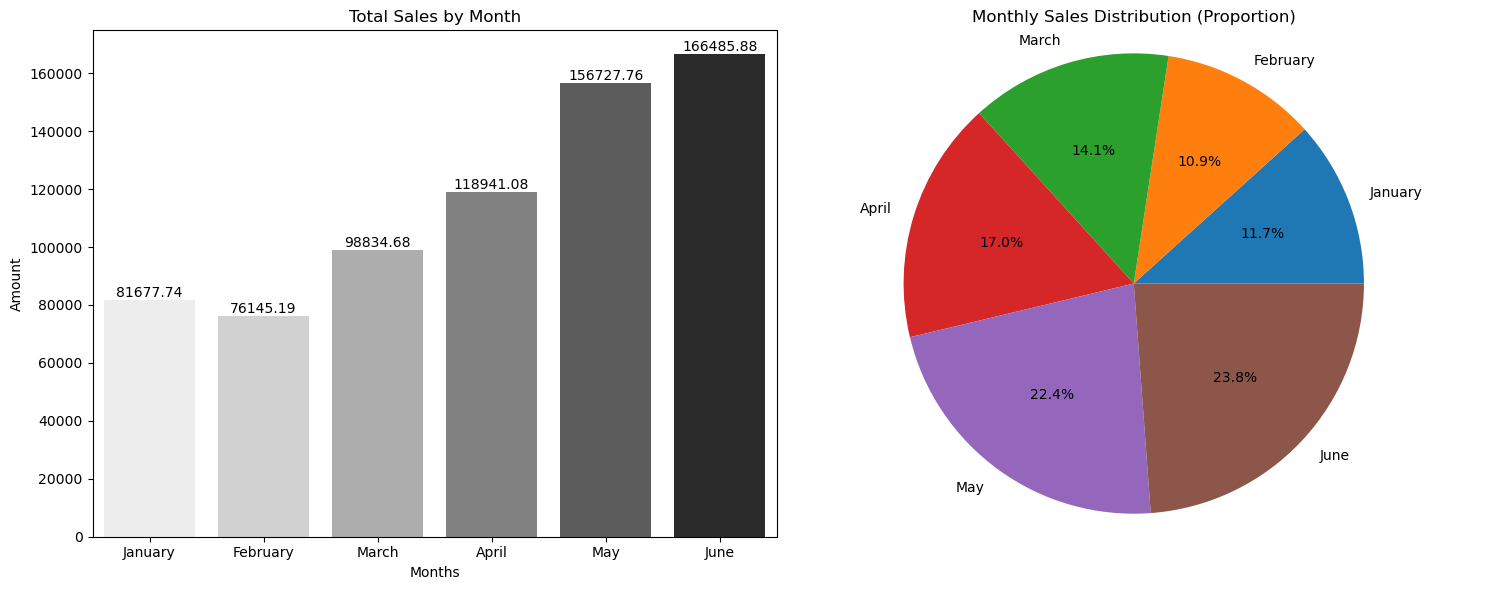

In [77]:
# Distribution of Sales over month

monthly_sales = data.groupby('month')['transaction_value'].sum()
monthly_sales = monthly_sales.reindex(['January', 'February', 'March', 'April', 'May', 'June'])
monthly_sales = monthly_sales.reset_index()
monthly_sales.columns = ['month', 'amount']

plt.figure(figsize=(15, 6))

# Barplot: Total Sales by Month

plt.subplot(1, 2, 1)
e = sns.barplot(x=monthly_sales['month'], 
                y= monthly_sales['amount'], 
                palette='Greys')

plt.title("Total Sales by Month")
plt.xlabel("Months")
plt.ylabel("Amount")

for i, j in enumerate(monthly_sales['amount']):
    e.text(i, j, f'{j}', ha= 'center', va='bottom')

# Pie Chart: Monthly Sales Distribution

plt.subplot(1, 2, 2)
plt.pie(monthly_sales['amount'], 
        labels=monthly_sales['month'], 
        autopct='%1.1f%%')

plt.title('Monthly Sales Distribution (Proportion)')
plt.axis('equal')

plt.tight_layout()
plt.show()

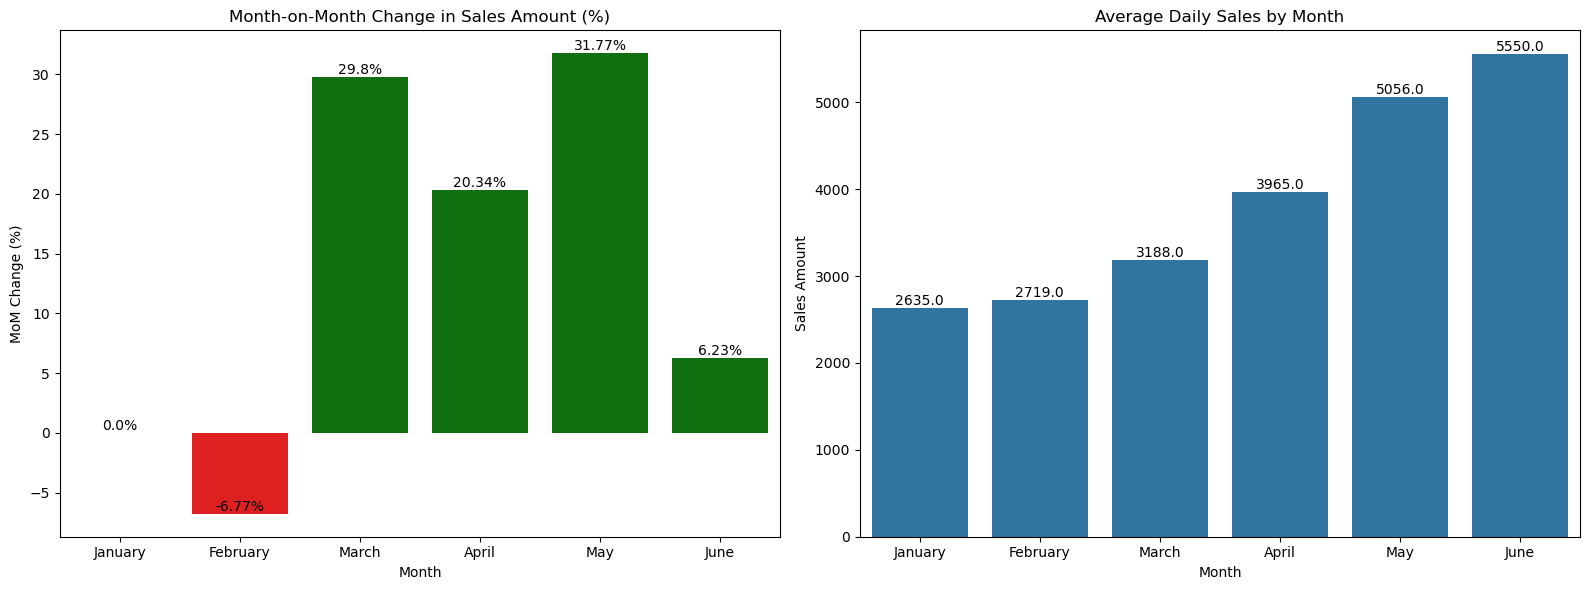

In [78]:
# Month on Month Change in sales amount

monthly_sales['mom_sales_change'] = (monthly_sales['amount'].pct_change() * 100).round(2)
monthly_sales['mom_sales_change'] = monthly_sales['mom_sales_change'].fillna(0)

# Average Daily Sales per Month

monthly_sales['days_in_month'] = monthly_sales['month'].map(days_in_month)
monthly_sales['avg_daily_sales'] = (monthly_sales['amount'] / monthly_sales['days_in_month']).round(0)

plt.figure(figsize=(16, 6))

# Barplot: Month on Month Change in sales amount (%)
plt.subplot(1, 2, 1)
colors = ['green' if i > 0 else 'red' for i in monthly_sales['mom_sales_change']]

f = sns.barplot(x=monthly_sales['month'], 
                y=monthly_sales['mom_sales_change'],
                palette=colors,
                hue=monthly_sales['month'],
                legend= False)

for i, j in enumerate(monthly_sales['mom_sales_change']):
    f.text(i, j, f"{j}%", ha= "center",va= "bottom")

plt.title("Month-on-Month Change in Sales Amount (%)")
plt.xlabel("Month")
plt.ylabel("MoM Change (%)")

# Barplot: Average Daily Sales per Month

plt.subplot(1, 2, 2)
g= sns.barplot(x= monthly_sales['month'],
               y= monthly_sales['avg_daily_sales'])

for i, j in enumerate(monthly_sales['avg_daily_sales']):
    g.text(i, j, f"{j}", ha= "center", va= 'bottom')

plt.title("Average Daily Sales by Month")
plt.xlabel("Month")
plt.ylabel("Sales Amount")

plt.tight_layout()
plt.show()

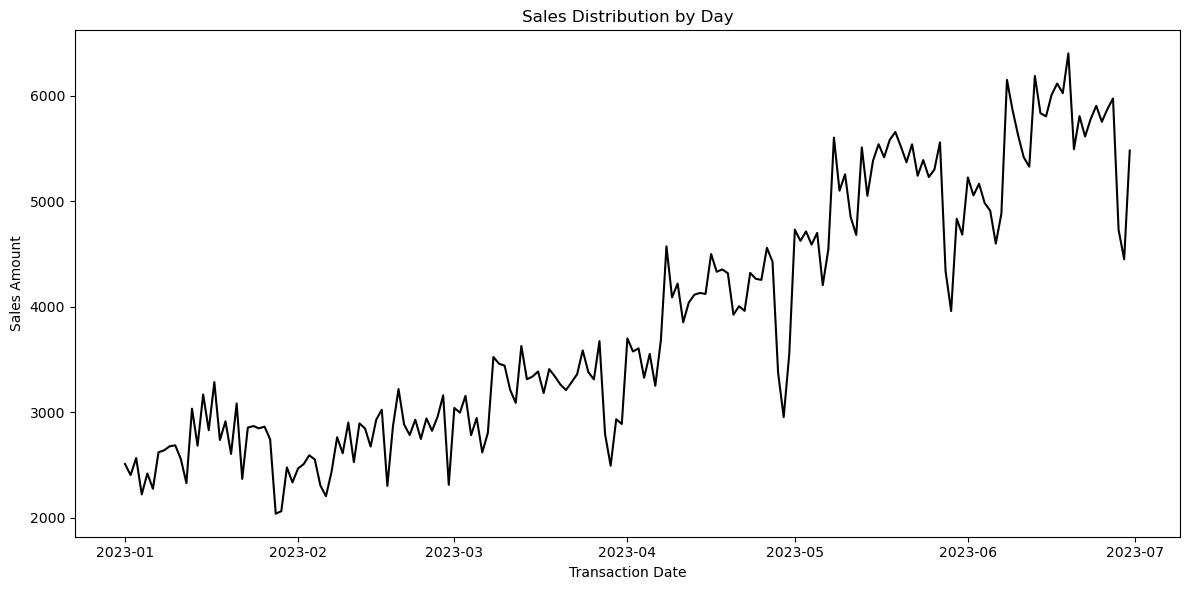

In [79]:
# Sales Distribution Across Days

daily_sales= data.groupby(['transaction_date'])['transaction_value'].sum()
daily_sales = daily_sales.reset_index()

plt.figure(figsize=(12, 6))

sns.lineplot(x= daily_sales['transaction_date'], 
             y= daily_sales['transaction_value'],
            color= 'black')

plt.title("Sales Distribution by Day")
plt.xlabel("Transaction Date")
plt.ylabel("Sales Amount")

plt.tight_layout()
plt.show()

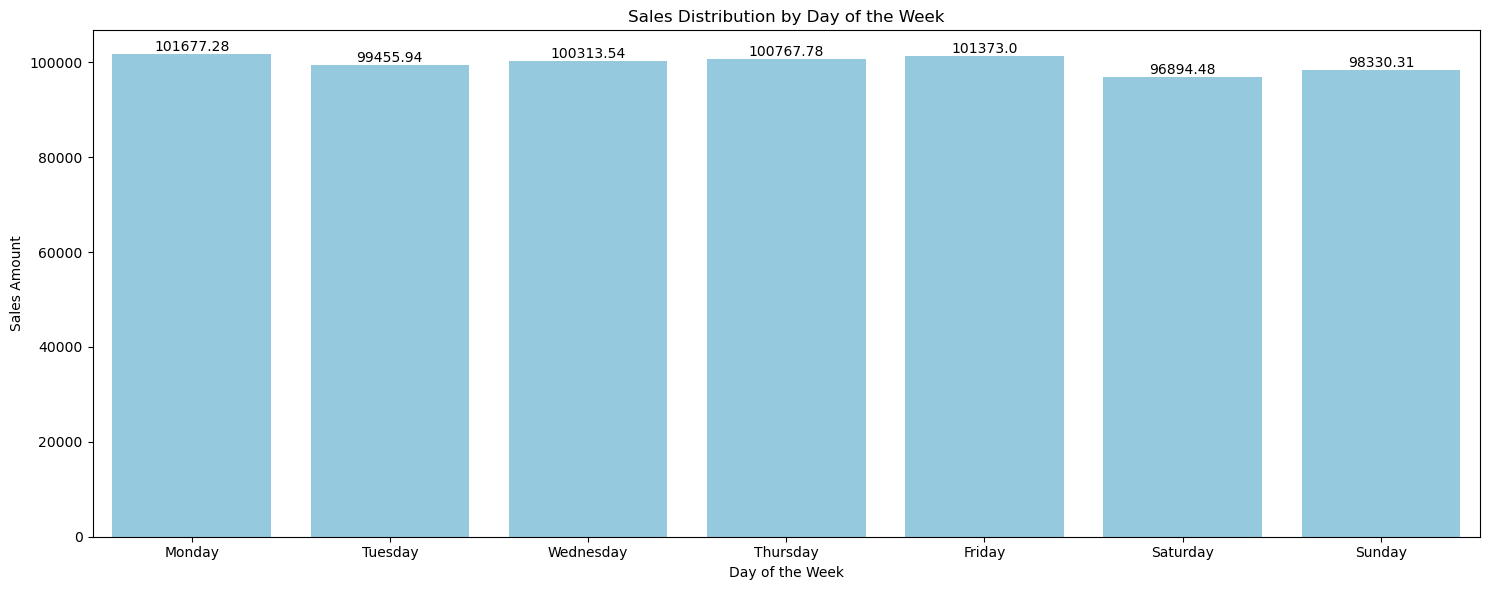

In [80]:
# Sales by Day of the Week

daywise_sales= data.groupby('day_of_week')['transaction_value'].sum()
daywise_sales = daywise_sales.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
daywise_sales = daywise_sales.reset_index()

plt.figure(figsize=(15, 6))

h= sns.barplot(x=daywise_sales['day_of_week'], 
               y=daywise_sales['transaction_value'], 
               color= 'skyblue')

plt.title('Sales Distribution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Sales Amount')
plt.tight_layout()

# Annotation
for i, j in enumerate(daywise_sales['transaction_value']):
   h.text(i, j, f'{j}', ha= 'center', va='bottom')

plt.tight_layout()
plt.show()

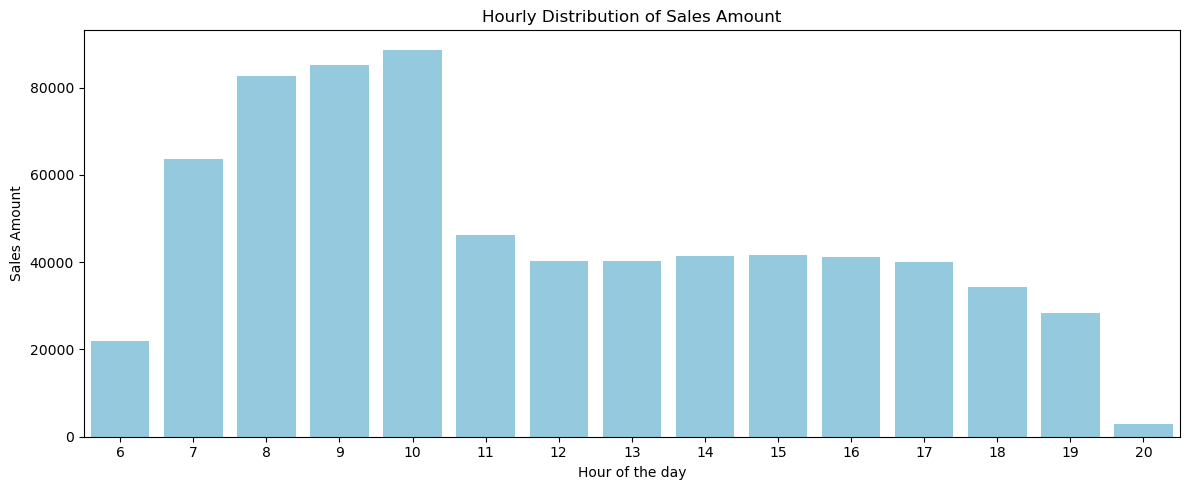

In [81]:
# Hourly Sales Trends

hourly_sales= data.groupby('hour')['transaction_value'].sum()
hourly_sales= hourly_sales.reset_index()

plt.figure(figsize=(12, 5))

sns.barplot(x= hourly_sales['hour'], y= hourly_sales['transaction_value'], color= 'skyblue')
plt.title('Hourly Distribution of Sales Amount')
plt.xlabel('Hour of the day')
plt.ylabel('Sales Amount')

plt.tight_layout()
plt.show()

#### Key Insights: 
- **Sales Distribution**: The sales amount distribution is right-skewed, indicating a larger number of smaller transactions and fewer high-value transactions.
- **Monthly Trend:** Sales show a clear upward trend from January to June, reflecting consistent month-to-month growth.
- **Daily Fluctuations:** The daily sales distribution displays peaks and troughs, though the causes remain unexplored.
- **Peak Sales Hours:** Sales are highest in the morning, particularly between 8 AM and 11 AM.
- **Sales Decline:** After the peak hours, sales gradually decline throughout the remainder of the day.
- **Daywise Consistency:** Sales patterns are relatively stable across different days of the week, with little variation.

**Further Plan:**
- Predictive Analysis: Sales Forecasting
- Output: Expected daily/weekly/monthly sales for upcoming period

### **6.1 High Value Transactions (HVT)**

In [82]:
# Calculate IQR to create a upper limit to calculate High Value Transactions.

q1 = data['transaction_value'].quantile(0.25)
q3 = data['transaction_value'].quantile(0.75)
iqr = q3 - q1

# Upper bound threshold
threshold_by_iqr = q3 + 1.5 * iqr
print(f"Threshold for high-value transactions (IQR Method): {threshold_by_iqr}")

Threshold for high-value transactions (IQR Method): 10.5


In [83]:
# High value transactions 
high_value_transactions = data[data['transaction_value'] > threshold_by_iqr]

# High value sales
high_value_sales = high_value_transactions['transaction_value'].sum()
print(f"Total sales generated through high value transactions is {high_value_sales}.")

# Contribution
hvt_contribution = (high_value_sales/total_sales) * 100 
print(f"High-value transactions contribute {hvt_contribution: .2f}% of the total sales.")

# Frequency Percentage
hvt_frequency = (len(high_value_transactions)/len(data)) * 100
print(f"High value transactions make up upto {hvt_frequency: .2f}% of total transactions")

Total sales generated through high value transactions is 63437.99.
High-value transactions contribute  9.08% of the total sales.
High value transactions make up upto  2.19% of total transactions


In [84]:
# Average transaction values of high value and regular transactions

reg_transactions = data[data['transaction_value'] <= threshold_by_iqr]

print(f"The average transaction value of regular transactions is {reg_transactions['transaction_value'].mean(): .2f}.")
print(f"The average transaction value of high-value transactions is {high_value_transactions['transaction_value'].mean(): .2f}.")
print(f"The average transaction value of all transactions is {data['transaction_value'].mean(): .2f}.")


The average transaction value of regular transactions is  4.36.
The average transaction value of high-value transactions is  19.38.
The average transaction value of all transactions is  4.69.


In [85]:
# Products in High value transactions

hvt_products = high_value_transactions.groupby(['product_id', 'product_type', 'product_detail'])['transaction_value'].sum().sort_values(ascending=False).reset_index()
hvt_products

product_id           product_type                product_detail  \
0            8          Premium Beans                     Civet Cat   
1           81               Clothing       I Need My Bean! T-shirt   
2            9          Organic Beans           Organic Decaf Blend   
3            6          Gourmet Beans                      Ethiopia   
4           83             Housewares     I Need My Bean! Latte cup   
5            1          Organic Beans           Brazilian - Organic   
6            2      House blend Beans      Our Old Time Diner Blend   
7            4         Espresso Beans          Primo Espresso Roast   
8           82             Housewares     I Need My Bean! Diner mug   
9            7          Premium Beans         Jamacian Coffee River   
10           3         Espresso Beans                Espresso Roast   
11           5          Gourmet Beans        Columbian Medium Roast   
12          21     Drinking Chocolate                   Chili Mayan   
13          18               Chai tea         Spicy Eye Opener Chai   
14          38       Barista Espresso                         Latte   
15          59          Hot chocolate             Dark chocolate Lg   
16          41       Barista Espresso                 Cappuccino Lg   
17          39       Barista Espresso                      Latte Rg   
18          55        Brewed Chai tea       Morning Sunrise Chai Lg   
19          40       Barista Espresso                    Cappuccino   
20          61          Hot chocolate  Sustainably Grown Organic Lg   
21          60          Hot chocolate  Sustainably Grown Organic Rg   
22          36  Premium brewed coffee      Jamaican Coffee River Lg   

    transaction_value  
0            11700.00  
1             6163.00  
2             4657.50  
3             4578.00  
4             4509.00  
5             3852.00  
6             3294.00  
7             3067.50  
8             2935.00  
9             2883.50  
10            2492.75  
11            2220.00  
12            1972.84  
13            1335.90  
14            1136.25  
15             999.00  
16             977.50  
17             969.00  
18             924.00  
19             776.25  
20             712.50  
21             652.50  
22             630.00

In [86]:
# Analysis of product categories' share in high-value, regular, and all transactions

# Group by product_category for high-value transactions
high_value_prodcat = high_value_transactions.groupby('product_category').agg(highvalue_txn_count=('transaction_value', 'size'),
                                                                             highvalue_txn_sales=('transaction_value', 'sum')).reset_index()

# Group by product_category for Regular (Transactions that are not in high value category)
reg_prodcat = reg_transactions.groupby('product_category').agg(reg_txn_count=('transaction_value', 'size'),
                                                               reg_txn_sales=('transaction_value', 'sum')).reset_index()
# Group by product_category for all transactions
all_prodcat = data.groupby('product_category').agg(all_txn_count=('transaction_value', 'size'),
                                                   all_txn_sales=('transaction_value', 'sum')).reset_index()

# Merge all tables to produce one DataFrame
prodcat = all_prodcat.merge(high_value_prodcat, on='product_category', how='left')
prodcat = prodcat.merge(reg_prodcat, on='product_category', how='left')

# Create separate tables for counts and sums
transaction_counts = prodcat[['product_category', 'all_txn_count', 'highvalue_txn_count', 'reg_txn_count']]
transaction_sums = prodcat[['product_category', 'all_txn_sales', 'highvalue_txn_sales', 'reg_txn_sales']]

# Output tables
print("Transaction Counts:")
print(transaction_counts)

print("\nTransaction Sums:")
print(transaction_sums)

Transaction Counts:
     product_category  all_txn_count  highvalue_txn_count  reg_txn_count
0              Bakery          22796                  NaN        22796.0
1             Branded            747                747.0            NaN
2              Coffee          58416                378.0        58038.0
3        Coffee beans           1753               1619.0          134.0
4  Drinking Chocolate          11468                182.0        11286.0
5            Flavours           6790                  NaN         6790.0
6           Loose Tea           1210                122.0         1088.0
7  Packaged Chocolate            487                148.0          339.0
8                 Tea          45449                 77.0        45372.0

Transaction Sums:
     product_category  all_txn_sales  highvalue_txn_sales  reg_txn_sales
0              Bakery       82315.64                  NaN       82315.64
1             Branded       13607.00             13607.00            NaN
2           

#### **Key Takeaways:**
- High-value transactions account for $63,437.99, contributing `9.08% of the total sales`.
- Despite contributing a small percentage of the total transaction volume `(2.19%)`, they significantly impact the revenue due to their higher average value.
- The `Average Transaction Value` for `high-value transactions is at $19.38`, significantly higher.
- Whereas Average Transaction Value (ATV) of `all transactions is $4.69`.
- `Coffee beans stands out for high-value transactions`, with an average higher than regular transactions and significant total high-value sales.
- `Branded has all transactions classified as high-value`.
- Coffee and Tea are major players in regular transactions.
- High-value transactions contribute disproportionately to total sales despite their lower count.
- Categories with a high share of high-value transactions like Coffee beans and Branded are essential for maximizing revenue.
- Strategies focusing on enhancing high-value sales in Tea, Bakery, and Flavours could yield better returns, as these categories rely more on regular transactions.

### **6.2 Key Matrices:**
1. Period of transaction
1. Total number of transactions
1. Total revenue generated 
1. Average transactions per day
1. Average revenue per day
1. Units of the products sold
1. Number of unique products sold
1. Average revenue per transaction
1. Average revenue per unit of product sold

In [87]:
# Period of transacions
print(f"Period of Transaction: {num_days} days.")

# Total number of transactions
total_transactions = len(data)
print(f"Total Transactions: {total_transactions} transactions.")

# Total revenue generated
total_revenue = data['transaction_value'].sum()
print(f"Total Revenue Generated: {total_revenue: .2f} dollars.")

# Average transactions per day
avg_daily_txn = total_transactions / num_days
print(f"Average Daily Transactions: {avg_daily_txn: .2f} transactions per day.")

# Average revenue per day
avg_daily_revenue = total_revenue / num_days
print(f"Average Daily Revenue: {avg_daily_revenue: .2f} dollars per day.") 

# Units of the products sold
total_txn_qty = data['transaction_qty'].sum()
print(f"Units of Products Sold: {total_txn_qty} units of products.")

# Number of unique products sold
uniq_prods = data['product_detail'].nunique()
print(f"Number of Products sold: {uniq_prods} unique products.")

# Average revenue per transaction
avg_revenue_pertxn = total_revenue / total_transactions
print(f"Average Revenue per Transaction: {avg_revenue_pertxn: .2f} dollars.")

# Average revenue per unit of product sold
avg_revenue_per_unit= total_revenue / total_txn_qty
print(f"Average Revenue per Unit of Product Sold: {avg_revenue_per_unit: .2f} dollars.")

# Change in Monthly Transaction Counts (From January to June):
jan_txn = monthly_transactions[monthly_transactions['month']== 'January']['transaction_count'].values[0]
june_txn = monthly_transactions[monthly_transactions['month']== 'June']['transaction_count'].values[0]
monthly_txn_pct_change = (june_txn - jan_txn) * 100 / jan_txn

print(f"Percentage change in transaction count from January to June: {monthly_txn_pct_change:.2f}%")

# Change in Quantity Sold (From January to June):

# Change in Sales Amount (From January to June):
jan_sales = monthly_sales[monthly_sales['month']== 'January']['amount'].values[0]
june_sales = monthly_sales[monthly_sales['month']== 'June']['amount'].values[0]
monthly_sales_pct_change = (june_sales - jan_sales) * 100 / jan_sales

print(f"Percentage change in sales amount from January to June: {monthly_sales_pct_change:.2f}%")


Period of Transaction: 181 days.
Total Transactions: 149116 transactions.
Total Revenue Generated:  698812.33 dollars.
Average Daily Transactions:  823.85 transactions per day.
Average Daily Revenue:  3860.84 dollars per day.
Units of Products Sold: 214470 units of products.
Number of Products sold: 80 unique products.
Average Revenue per Transaction:  4.69 dollars.
Average Revenue per Unit of Product Sold:  3.26 dollars.
Percentage change in transaction count from January to June: 104.18%
Percentage change in sales amount from January to June: 103.83%


In [88]:
monthly_sales

month     amount  mom_sales_change  days_in_month  avg_daily_sales
0   January   81677.74              0.00             31           2635.0
1  February   76145.19             -6.77             28           2719.0
2     March   98834.68             29.80             31           3188.0
3     April  118941.08             20.34             30           3965.0
4       May  156727.76             31.77             31           5056.0
5      June  166485.88              6.23             30           5550.0

#### **Key Takeaways from Key Matrices:**
- Period of Transaction: 181 days.
- Total Transactions: 149,116 transactions were recorded.
- Total Revenue: $698,812.33 was generated.
- Average Daily Transactions: 823.85 transactions per day.
- Average Daily Revenue: $3,860.84 in revenue per day.
- Units Sold: 214,470 units of products were sold.
- Unique Products Sold: 80 different products were sold.
- Average Revenue per Transaction: $4.69 per transaction.
- Average Revenue per Unit Sold: $3.26 per unit.
- Percentage change in transaction count from January to June: 104.18%
- Percentage change in sales amount from January to June: 103.83%

## Phase II : Multivariate Analysis

## Objectives:
1. Evaluate store performance and identify top performing locations [Revenue wise]
1. Analyze product based on Revenue
1. Evaluate customer behaviour
1. Correlation between multiple variables

#### 1. Store Performance

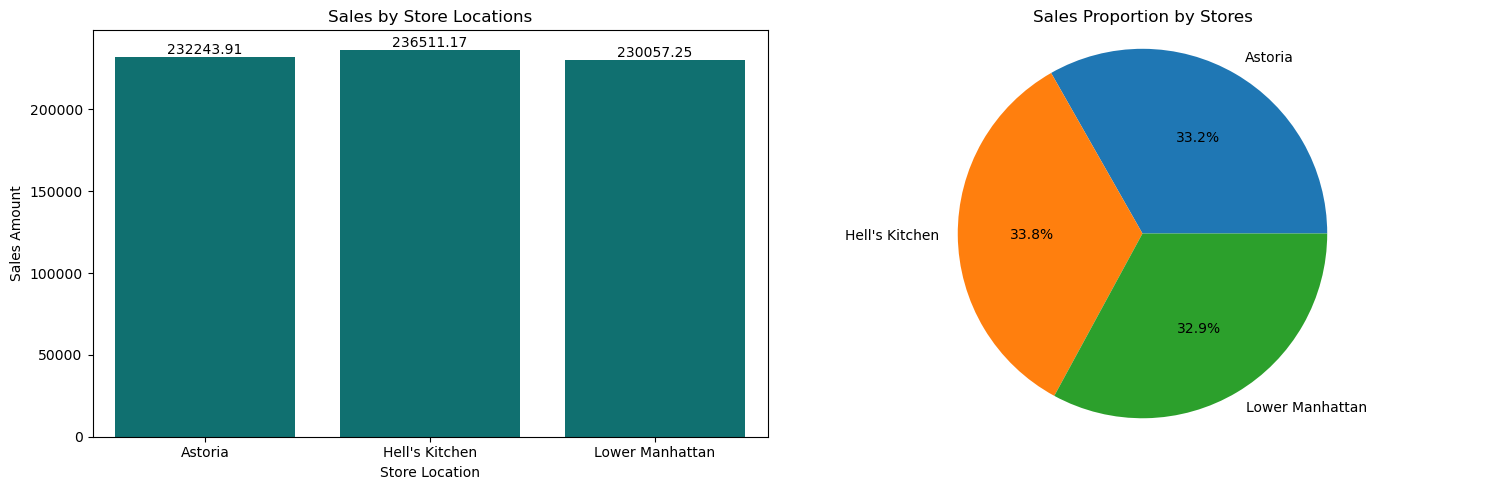

In [89]:
# Sales Performance Analysis for Each Store Location

storewise_sales = data.groupby('store_location')['transaction_value'].sum().reset_index()

# Barplot 1: Sales distribution across store locations 
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
k= sns.barplot(x=storewise_sales['store_location'], y=storewise_sales['transaction_value'], color='teal')
plt.title("Sales by Store Locations")
plt.xlabel('Store Location')
plt.ylabel('Sales Amount')

for i, j in enumerate(storewise_sales['transaction_value']):
   k.text(i, j, f"{j}", ha= 'center', va= "bottom") 

# Pie chart: Sales proportions for each store location
plt.subplot(1, 2, 2)
plt.pie(storewise_sales['transaction_value'], labels=storewise_sales['store_location'], autopct='%1.1f%%')
plt.title('Sales Proportion by Stores')
plt.axis('equal')

plt.tight_layout()
plt.show()

##### 1.1 Store performance by month

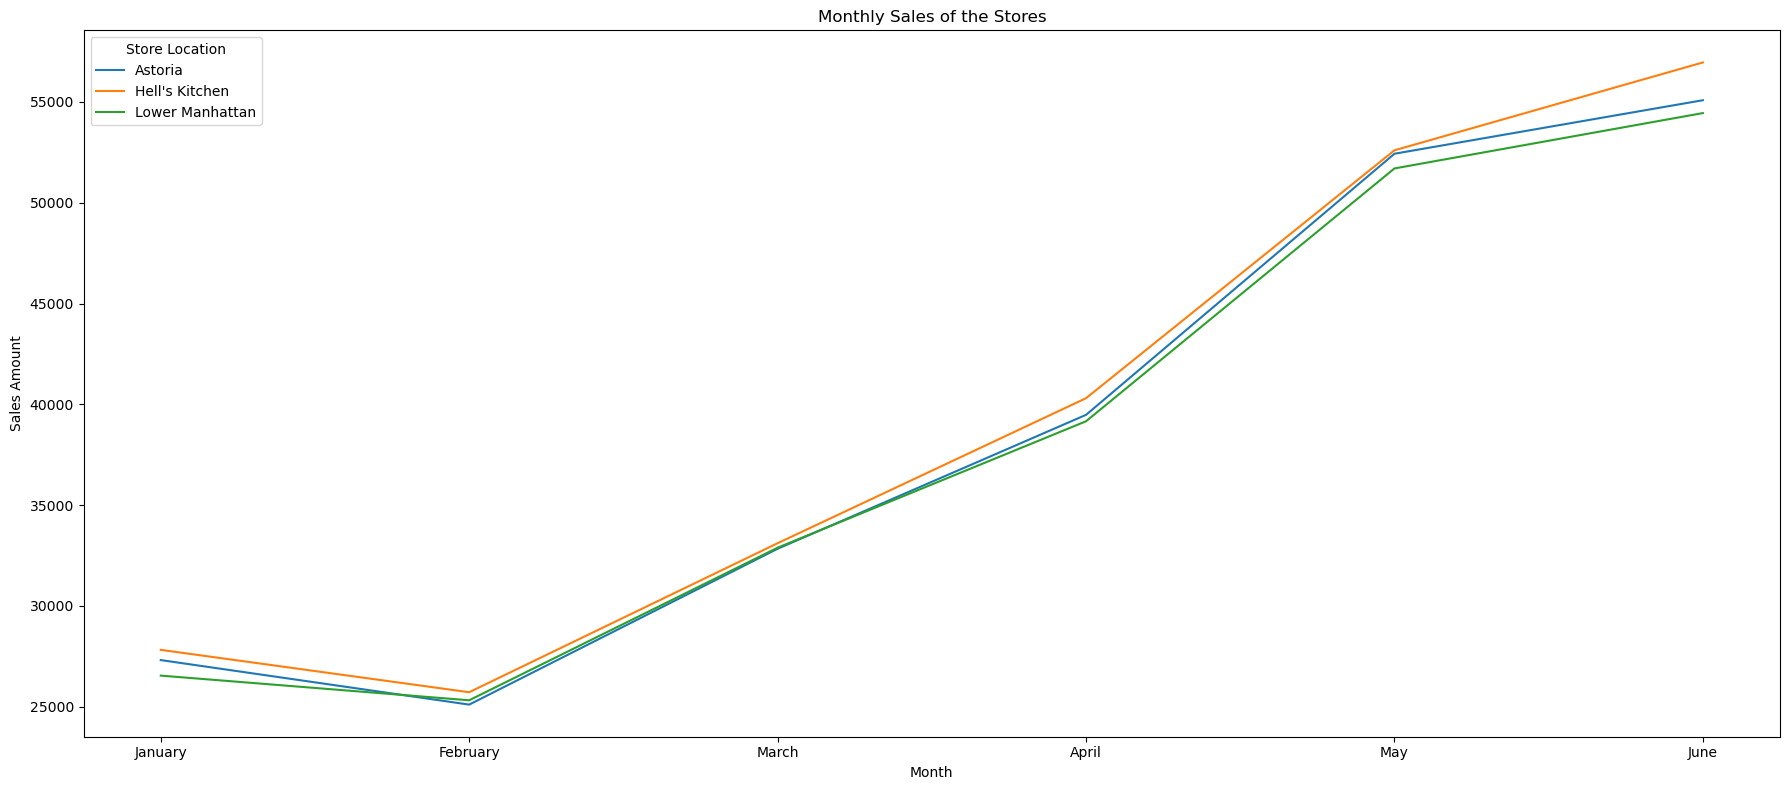

In [90]:
# Storewise Monthly Sales
storewise_sales_bymonth = data.groupby(['month', 'store_location'])['transaction_value'].sum().reset_index()

# Order month column
month_order = ['January', 'February', 'March', 'April', 'May', 'June']
storewise_sales_bymonth['month'] = pd.Categorical(storewise_sales_bymonth['month'], categories= month_order, ordered= True)
storewise_sales_bymonth = storewise_sales_bymonth.sort_values(by='month')
storewise_sales_bymonth

# Grouped barchart: Monthly Sales of stores
plt.figure(figsize=(18, 8))
l= sns.lineplot(x= storewise_sales_bymonth['month'],
            y= storewise_sales_bymonth['transaction_value'],
            hue= storewise_sales_bymonth['store_location'])

plt.title('Monthly Sales of the Stores')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
# plt.legend(title='Store Location')
l.legend(title = 'Store Location')

plt.tight_layout()
plt.show()

#### Key Takeaways: 
- Sales are evenly distributed across locations, with Hell's Kitchen slightly leading.
- Monthly sales show steady growth from January to June for all three stores.
- All stores perform competitively, with minimal differences in revenue.

#### 2. Product Performance Analysis

##### 2.1 Performance of product categories 

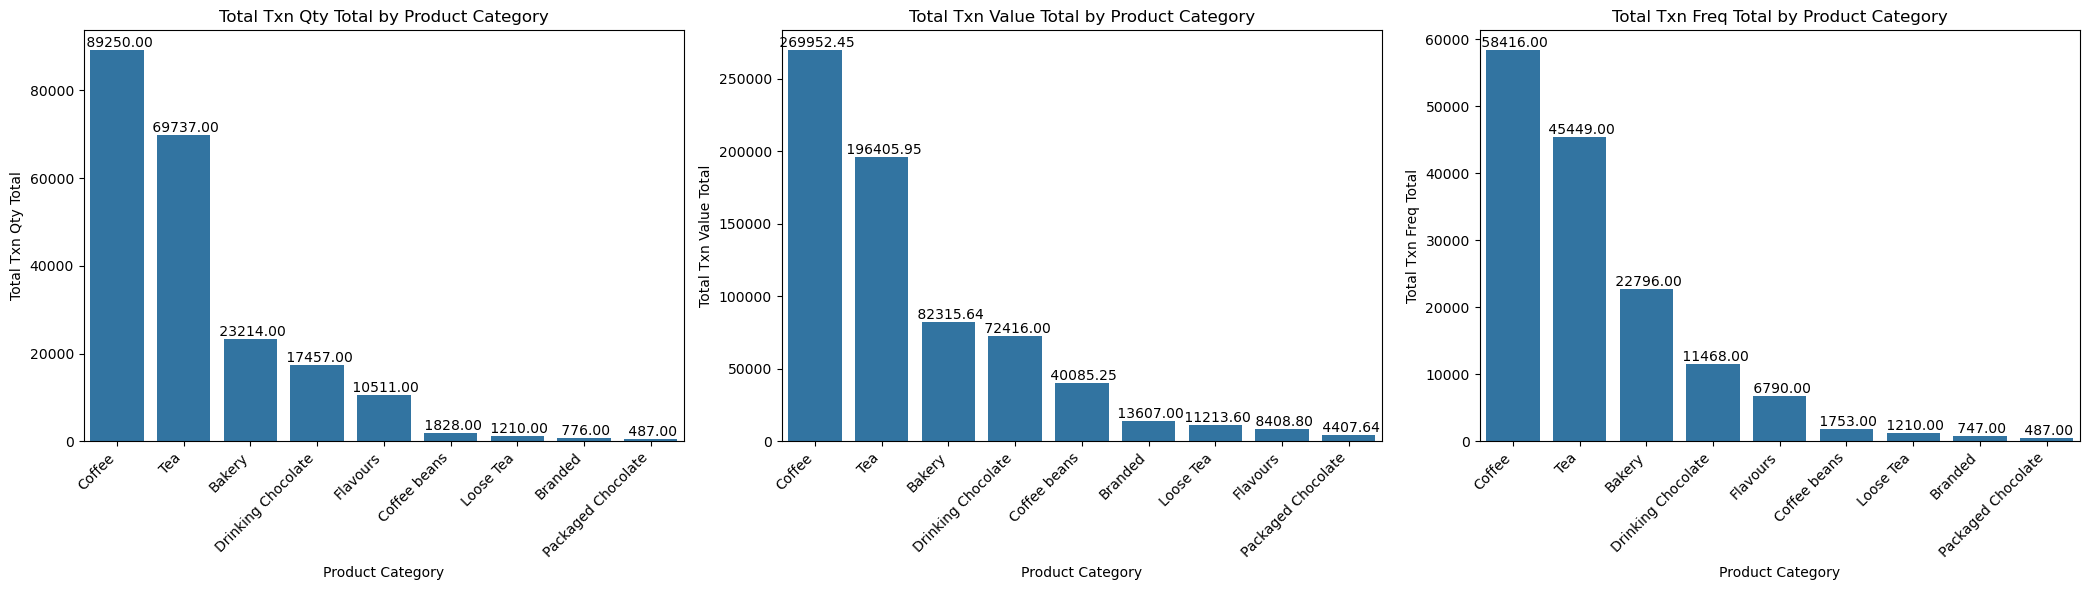

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Product Categorywise total transaction quantity, total revenue, and transaction frequency (number of transactions)
prodcat_revenue_qty_freq = data.groupby('product_category').agg(txn_qty_total=('transaction_qty', 'sum'), 
                                                                txn_value_total=('transaction_value', 'sum'),
                                                                txn_freq_total=('transaction_id', 'nunique'))
prodcat_revenue_qty_freq = prodcat_revenue_qty_freq.reset_index()

# Melt the DataFrame 
prodcat_revenue_qty_freq_long = prodcat_revenue_qty_freq.melt(id_vars='product_category', 
                                                             var_name='metric', 
                                                             value_name='value')

metrics = prodcat_revenue_qty_freq_long['metric'].unique()

n_rows = 1
n_cols = len(metrics)

# Plot
plt.figure(figsize=(7 * n_cols, 6 * n_rows))

for i, metric in enumerate(metrics):
    metric_data = prodcat_revenue_qty_freq_long[prodcat_revenue_qty_freq_long['metric'] == metric]
    # Order for plot
    metric_data_order = metric_data.sort_values(by='value', ascending=False)['product_category']

    plt.subplot(n_rows, n_cols, i + 1)

    q = sns.barplot(data=metric_data, 
                    x='product_category', 
                    y='value', 
                    order=metric_data_order)

    plt.title(f"Total {metric.replace('_', ' ').title()} by Product Category")
    plt.xlabel("Product Category")
    plt.ylabel(f"Total {metric.replace('_', ' ').title()}")
    plt.xticks(rotation=45, ha='right')

    # Aannotations
    for i in q.patches:
        height = i.get_height()
        q.annotate(f'{height: .2f}', 
                   (i.get_x() + i.get_width() / 2, height),
                   ha='center', va='bottom',
                   fontsize=10, color='black')

plt.tight_layout()
plt.show()

In [92]:
categorywise_sales = data.groupby('product_category')['transaction_value'].sum().reset_index()
categorywise_sales

product_category  transaction_value
0              Bakery           82315.64
1             Branded           13607.00
2              Coffee          269952.45
3        Coffee beans           40085.25
4  Drinking Chocolate           72416.00
5            Flavours            8408.80
6           Loose Tea           11213.60
7  Packaged Chocolate            4407.64
8                 Tea          196405.95

In [93]:
# Proportion of Categories in total sales
categorywise_sales['pct'] = ((categorywise_sales['transaction_value'] / categorywise_sales['transaction_value'].sum()) * 100).round(2)
categorywise_sales

product_category  transaction_value    pct
0              Bakery           82315.64  11.78
1             Branded           13607.00   1.95
2              Coffee          269952.45  38.63
3        Coffee beans           40085.25   5.74
4  Drinking Chocolate           72416.00  10.36
5            Flavours            8408.80   1.20
6           Loose Tea           11213.60   1.60
7  Packaged Chocolate            4407.64   0.63
8                 Tea          196405.95  28.11

#### Key Takeaways:
- `Coffee` is the largest revenue source, contributing `38.63%` of total sales.
- `Coffee and Tea combined` account for `two-thirds` of the total revenue.
- `Coffee products` (including Coffee and Coffee beans) together generate `44.37%` of the revenue.

##### 2.2 Performance of product categories by stores

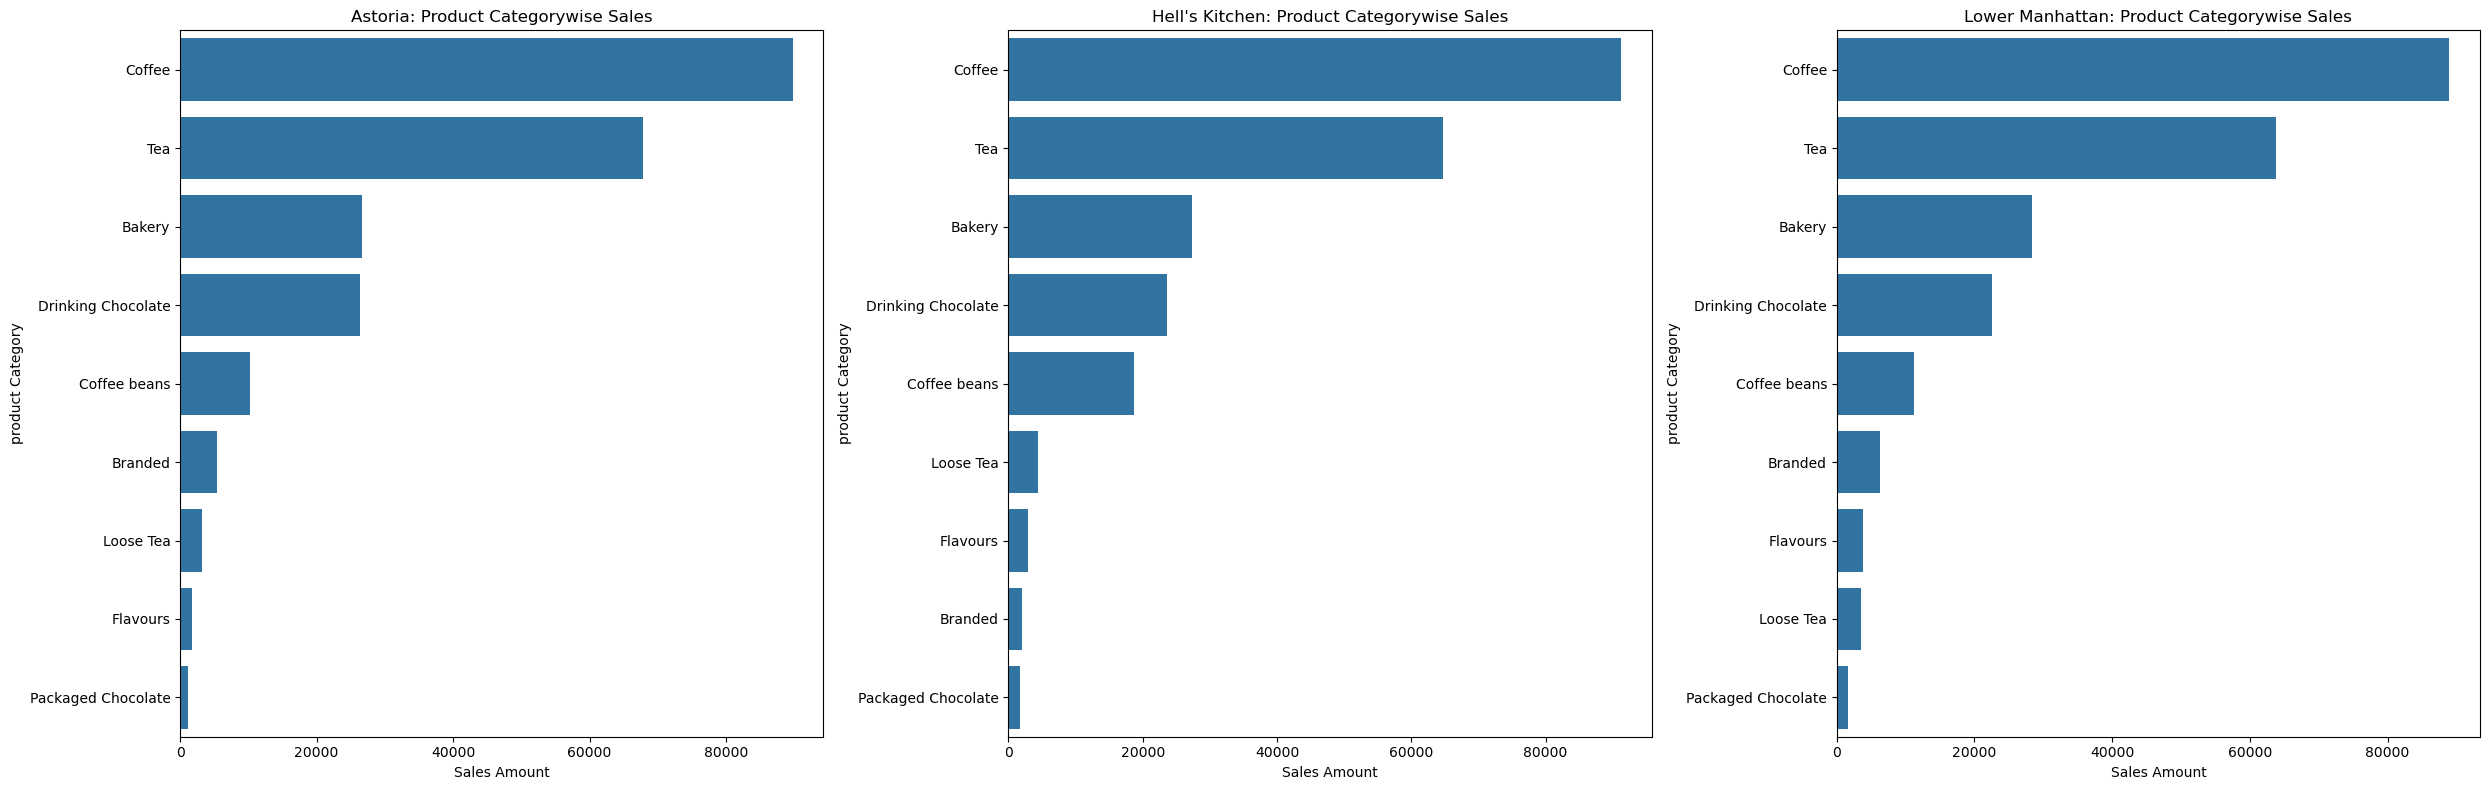

In [94]:
# Sales by Product Category and Store Locations
categorywise_sales_byloc = data.groupby(['store_location', 'product_category'])['transaction_value'].sum().reset_index()
categorywise_sales_byloc = categorywise_sales_byloc.sort_values(by= ['transaction_value'], ascending=False)

# Order for store lcoations
storeloc_ordered = ['Astoria', "Hell's Kitchen", "Lower Manhattan"]

n_cols = len(storeloc_ordered)
n_rows = 1

# Barplot: Categorywise sales by store location
plt.figure(figsize=(25, 8))

for i, j in enumerate(storeloc_ordered):
    storeloc_sales = categorywise_sales_byloc[categorywise_sales_byloc['store_location'] == j]
    product_cat_order = storeloc_sales.sort_values(by='transaction_value', ascending=False)['product_category']

    plt.subplot(n_rows, n_cols, i + 1)
    o= sns.barplot(x=storeloc_sales['transaction_value'],
                   y= storeloc_sales['product_category'],
                   order= product_cat_order)
    
    plt.title(f"{j}: Product Categorywise Sales")
    plt.xlabel('Sales Amount')
    plt.ylabel('product Category') 

plt.tight_layout()
plt.show()

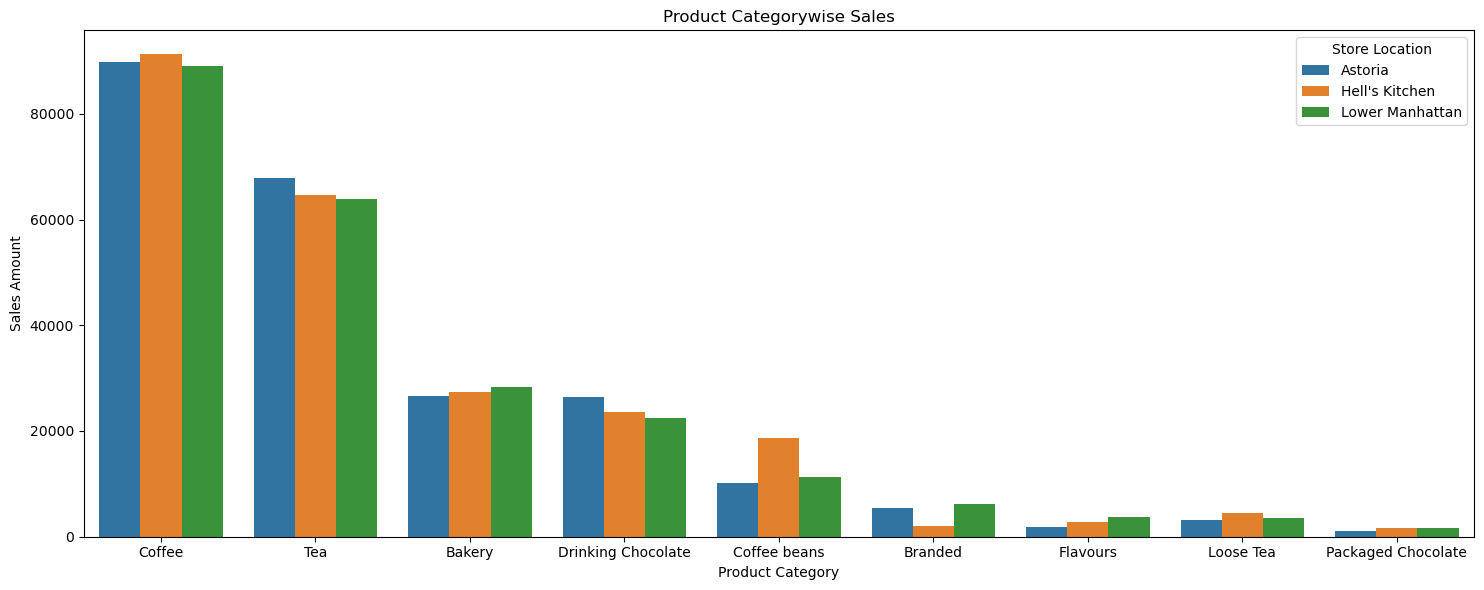

In [95]:
# Sales by Store Location and Product Category

plt.figure(figsize=(15, 6))
sns.barplot(x= categorywise_sales_byloc['product_category'],
            y= categorywise_sales_byloc['transaction_value'],
            hue= categorywise_sales_byloc['store_location'],
            order= product_cat_order)

plt.title(f"Product Categorywise Sales")
plt.xlabel('Product Category')
plt.ylabel('Sales Amount')
plt.legend(title = 'Store Location')

plt.tight_layout()
plt.show()

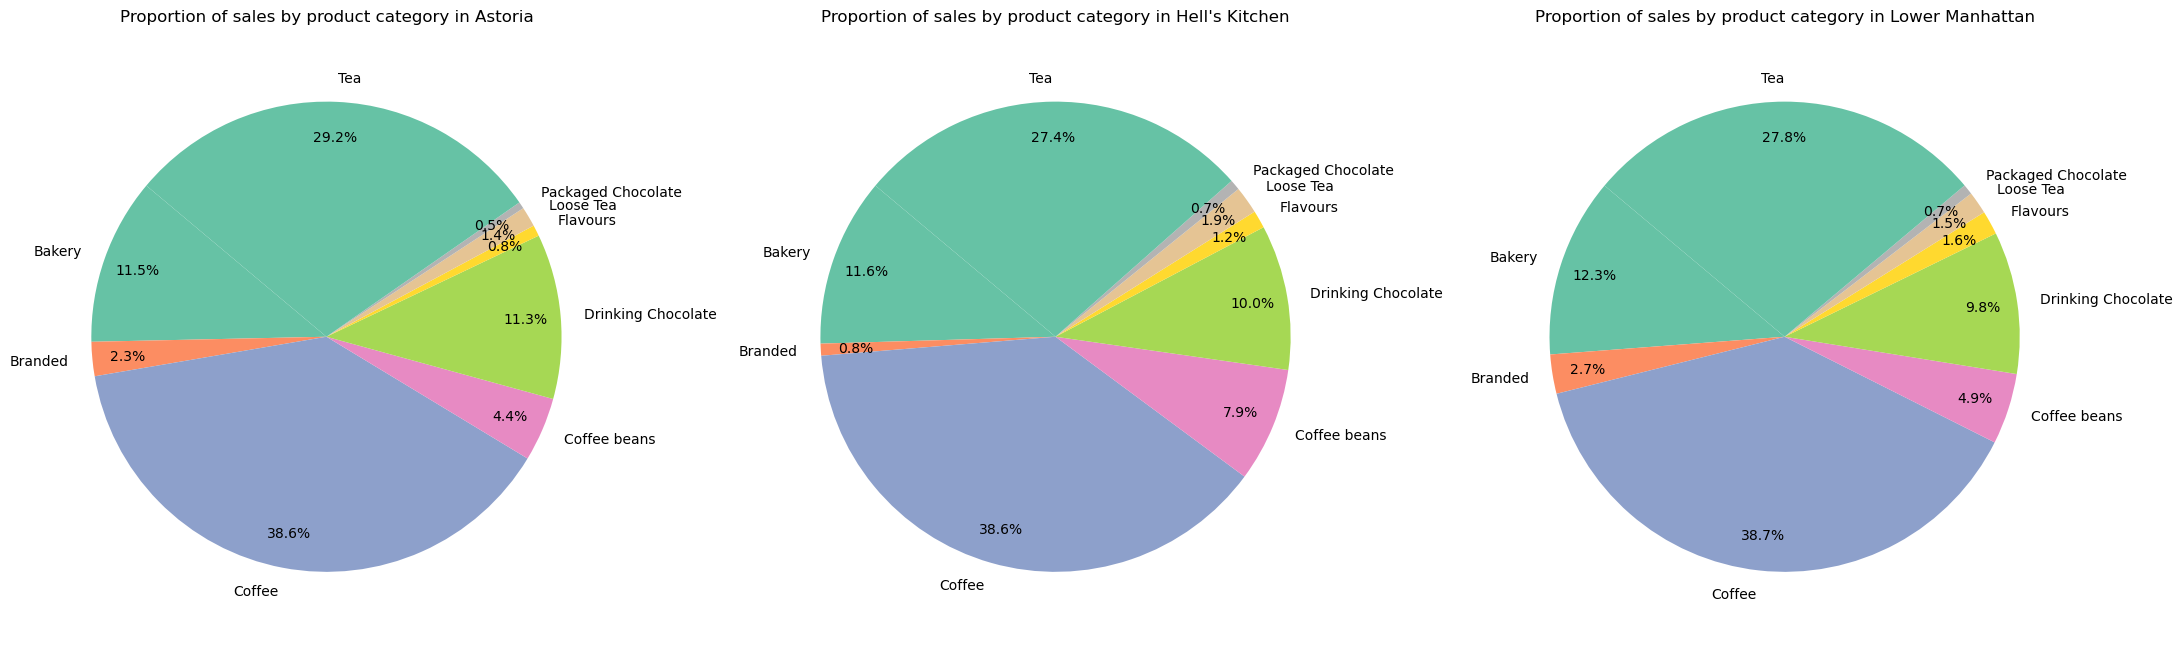

In [96]:
# Proportion of product category in each store's sale

categorywise_sales_byloc = data.groupby(['store_location', 'product_category'])['transaction_value'].sum().reset_index()

store_locations = categorywise_sales_byloc['store_location'].unique()

plt.figure(figsize= (22, 13))

for i, j in enumerate(store_locations):
    # Separate data will get generated for each iteration
    loc_sales = categorywise_sales_byloc[categorywise_sales_byloc['store_location'] == j] 
    # Plot 
    plt.subplot(2, len(store_locations), i + 1)
    plt.pie(loc_sales['transaction_value'],
            labels= loc_sales['product_category'],
            labeldistance= 1.1,
            autopct= '%1.1f%%',
            startangle= 140, 
            pctdistance=0.85, 
            colors=sns.color_palette('Set2'))

    plt.title(f"Proportion of sales by product category in {j}")
    plt.axis('equal')
    
plt.tight_layout()
plt.show()

In [97]:
# Share of store locations in each product category sales

categorywise_sales_byloc['transaction_value'] = pd.to_numeric(categorywise_sales_byloc['transaction_value'], errors='coerce')
categorywise_sales_byloc_pivot = categorywise_sales_byloc.pivot(index='product_category',
                                                                columns='store_location',
                                                                values='transaction_value')
categorywise_sales_byloc_pivot
categorywise_sales_byloc_pct = categorywise_sales_byloc_pivot.div(categorywise_sales_byloc_pivot.sum(axis=1), axis=0) * 100

categorywise_sales_byloc_pct = categorywise_sales_byloc_pct.round(2)
# categorywise_sales_byloc_pct = categorywise_sales_byloc_pct.melt(id_vars= 'store_location',
#                                                                  var_name= 'product_category',
#                                                                  value_name= 'percentage')
categorywise_sales_byloc_pct

store_location      Astoria  Hell's Kitchen  Lower Manhattan
product_category                                            
Bakery                32.31           33.27            34.42
Branded               40.10           14.27            45.62
Coffee                33.24           33.79            32.96
Coffee beans          25.49           46.49            28.02
Drinking Chocolate    36.37           32.57            31.06
Flavours              20.99           34.21            44.80
Loose Tea             28.48           39.79            31.73
Packaged Chocolate    24.72           38.54            36.74
Tea                   34.54           32.94            32.52

#### **Key Takeaways:**
- `Coffee dominates`: Across all locations, Coffee contributes around 38% of total sales, making it the top category.
- `Tea is second`: Tea accounts for ~29% to 33% of sales, showing strong but slightly lower demand than Coffee.
- `Bakery and Drinking Chocolate`: Combined, these contribute ~20% of total sales, with Bakery slightly stronger in Lower Manhattan.
- `Smaller categories`: Flavours, Loose Tea, and Packaged Chocolate each contribute less than 5% of total sales.
- `Hell’s Kitchen unique trend`: It leads in Coffee Bean sales (46% of its Coffee Bean sales total) but still represents a minor ~8% of overall sales.

##### 2.3 Performance of product categories by time

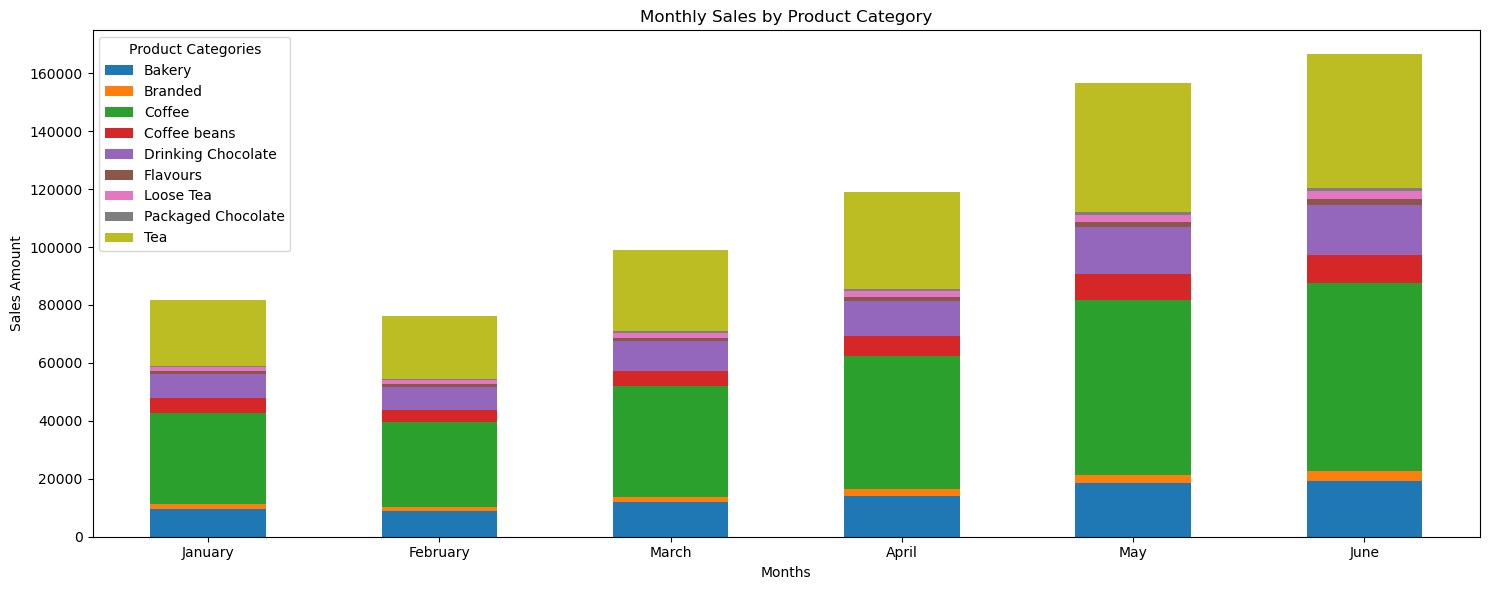

In [98]:
# Sales amount by product category by months
monthly_sales_bycategory =data.groupby(['month', 'product_category'])['transaction_value'].sum().reset_index()

# Ordered months for clarity 
month_order = ['January', 'February', 'March', 'April', 'May', 'June']
monthly_sales_bycategory['month'] = pd.Categorical(monthly_sales_bycategory['month'], categories= month_order, ordered= True)
monthly_sales_bycategory = monthly_sales_bycategory.sort_values('month')

# Sales proportion of product category for each month
monthly_sales_bycategory_pivot = monthly_sales_bycategory.pivot(index= 'month', columns= 'product_category', values='transaction_value')

monthly_sales_bycategory_pivot.plot(kind='bar', stacked= True, figsize=(15, 6))
plt.title("Monthly Sales by Product Category")
plt.xlabel('Months')
plt.ylabel('Sales Amount')
plt.legend(title= 'Product Categories')
plt.xticks(rotation= 0)

plt.tight_layout()
plt.show()

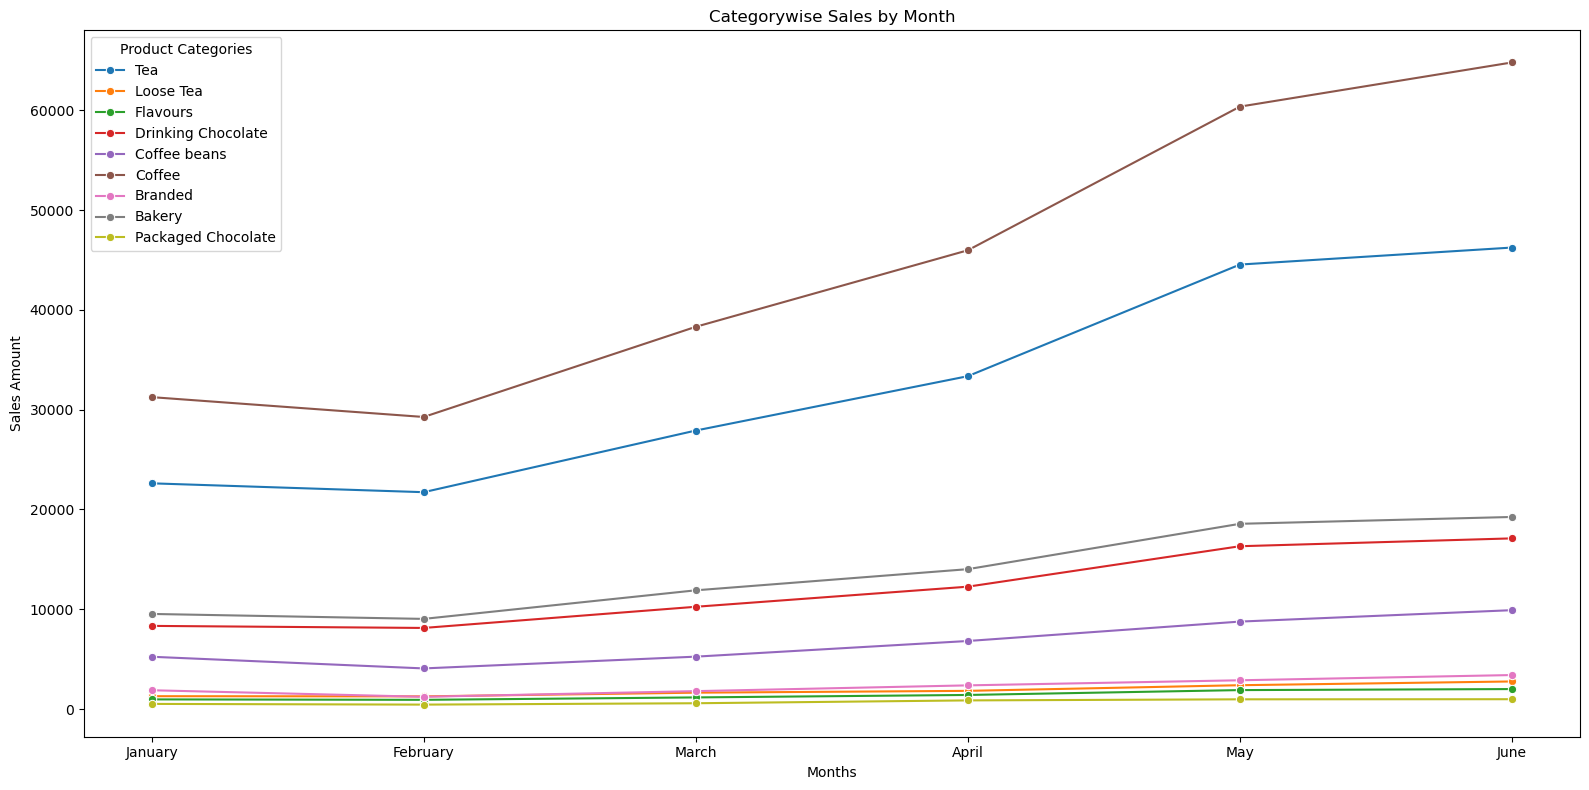

In [99]:
# Lineplot: Compares monthly sales trends for different categories

plt.figure(figsize=(16,8))
sns.lineplot(x= monthly_sales_bycategory['month'],
             y= monthly_sales_bycategory['transaction_value'],
             hue= monthly_sales_bycategory['product_category'],
             marker = 'o')

plt.title("Categorywise Sales by Month")
plt.xlabel('Months')
plt.ylabel('Sales Amount') 
plt.legend(title= 'Product Categories')

plt.tight_layout()
plt.show()

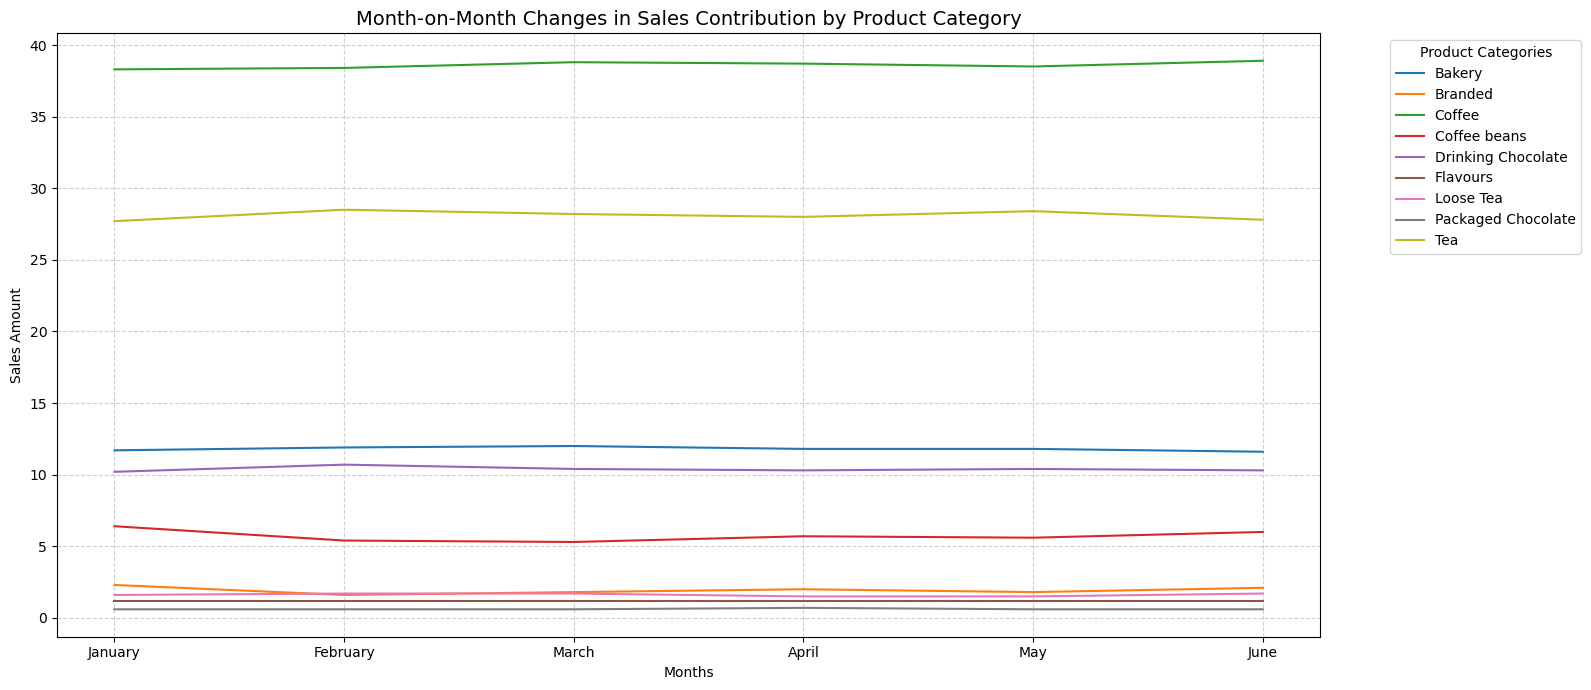

product_category     month  Bakery  Branded  Coffee  Coffee beans  \
0                  January    11.7      2.3    38.3           6.4   
1                 February    11.9      1.6    38.4           5.4   
2                    March    12.0      1.8    38.8           5.3   
3                    April    11.8      2.0    38.7           5.7   
4                      May    11.8      1.8    38.5           5.6   
5                     June    11.6      2.1    38.9           6.0   

product_category  Drinking Chocolate  Flavours  Loose Tea  Packaged Chocolate  \
0                               10.2       1.2        1.6                 0.6   
1                               10.7       1.2        1.7                 0.6   
2                               10.4       1.2        1.7                 0.6   
3                               10.3       1.2        1.5                 0.7   
4                               10.4       1.2        1.5                 0.6   
5                               10.3       1.2        1.7                 0.6   

product_category   Tea  
0                 27.7  
1                 28.5  
2                 28.2  
3                 28.0  
4                 28.4  
5                 27.8

In [100]:
# Calculate row-wise percentages to understand - each category's contribution in the monthly sales 

monthly_sales_bycategory_pct = monthly_sales_bycategory_pivot.div(monthly_sales_bycategory_pivot.sum(axis=1), axis=0) * 100
monthly_sales_bycategory_pct = monthly_sales_bycategory_pct.round(1).reset_index()  # Round to one decimal place 
monthly_sales_bycategory_pct_long = monthly_sales_bycategory_pct.melt(id_vars= 'month',
                                                                 var_name= 'product_category',
                                                                 value_name= "percentage")

# Lineplot: Month-on-Month Changes in Sales Contribution by Product Category
plt.figure(figsize=(16, 7))

sns.lineplot(x= monthly_sales_bycategory_pct_long['month'],
             y= monthly_sales_bycategory_pct_long['percentage'],
             hue= monthly_sales_bycategory_pct_long['product_category'])

plt.title("Month-on-Month Changes in Sales Contribution by Product Category", fontsize= 14)
plt.xlabel('Months')
plt.ylabel('Sales Amount')
plt.legend(title= 'Product Categories')
plt.xticks(rotation= 0)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Product Categories", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

display(monthly_sales_bycategory_pct)

##### Note: 
- `product_detail` is a final name of the product sold.
- It is categories into `product type` and `product_category`.
- Each product detail have a distinct product_id.

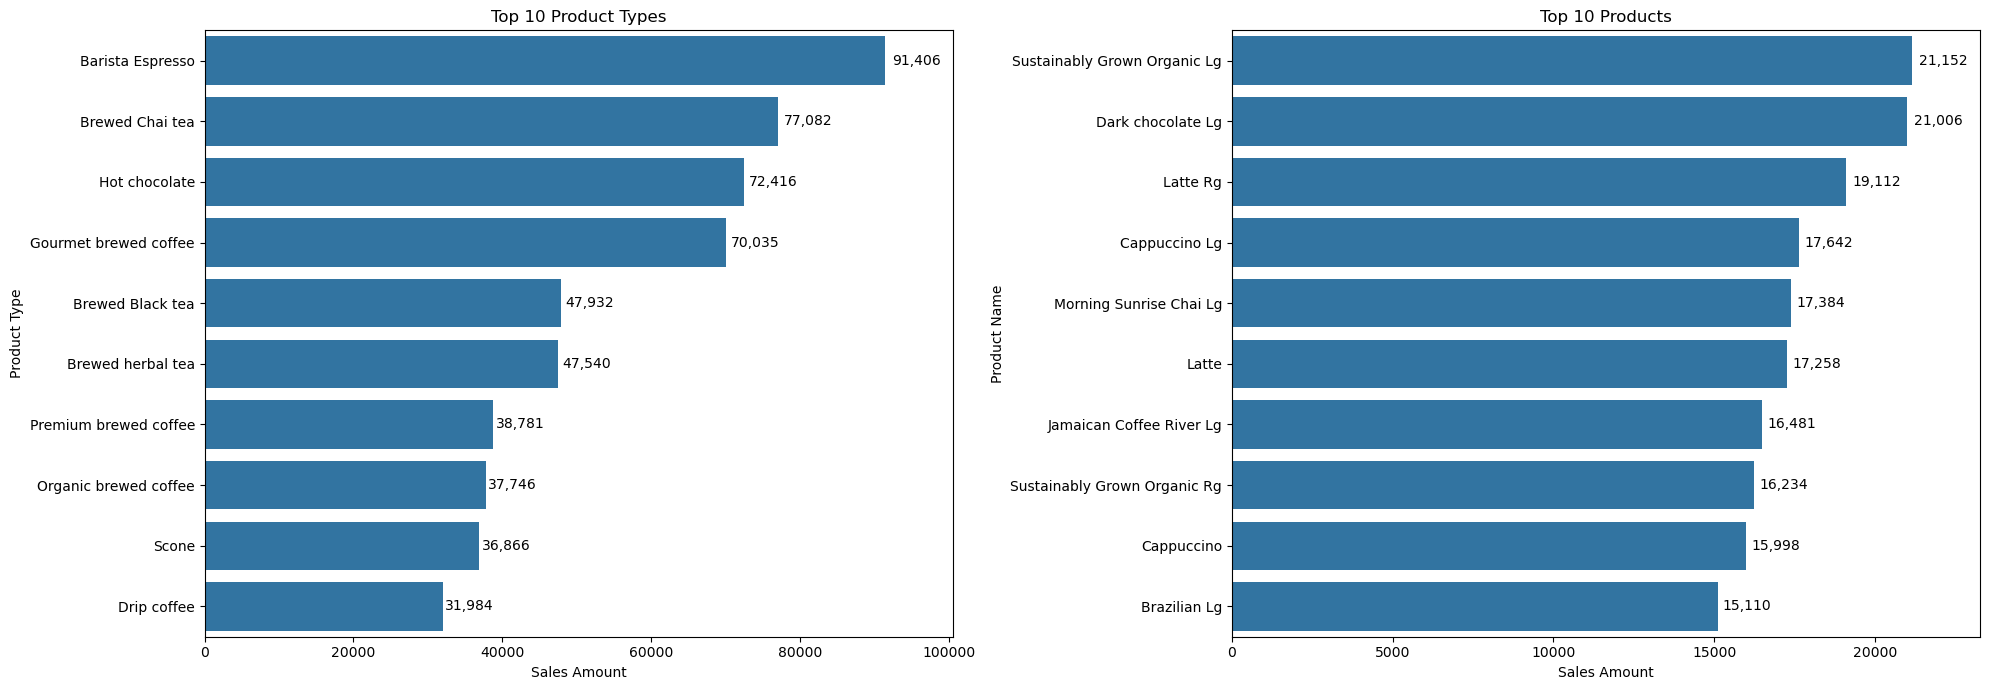

In [101]:
# Top 10 Product Types
top10_product_type = data.groupby('product_type')['transaction_value'].sum().reset_index().sort_values(by='transaction_value', ascending=False).head(10)
# Top 10 Product Details
top10_product_detail = data.groupby(['product_detail'])['transaction_value'].sum().reset_index().sort_values(by='transaction_value', ascending=False).head(10)

plt.figure(figsize=(20, 7))

# Barplot 1: Top 10 Product Types
plt.subplot(1, 2, 1)
o= sns.barplot(x= top10_product_type['transaction_value'],
            y= top10_product_type['product_type'])
plt.title('Top 10 Product Types')
plt.xlabel('Sales Amount')
plt.ylabel('Product Type')

# Adjusting xlim for better visibility
plt.xlim(0, 1.1 * top10_product_type['transaction_value'].max())

# Annotations
for i, j in enumerate(top10_product_type['transaction_value']):
    o.text(
        j + (j * 0.01),  # Slightly offset from the bar for better visibility
        i,  # Position along the y-axis
        f"{j:,.0f}",  # Format the number with commas
        color='black',
        va='center')

# Barplot 2: Top 10 Products
plt.subplot(1, 2, 2)
p= sns.barplot(x= top10_product_detail['transaction_value'],
            y= top10_product_detail['product_detail'])
plt.title('Top 10 Products')
plt.xlabel('Sales Amount')
plt.ylabel('Product Name')

# Adjusting xlim for better visibility
plt.xlim(0, 1.1 * top10_product_detail['transaction_value'].max())

# Annotation
for i, j in enumerate(top10_product_detail['transaction_value']):
    p.text( j + (j * 0.01), i, f"{j:,.0f}", color='black', va='center')

plt.tight_layout()
plt.show()

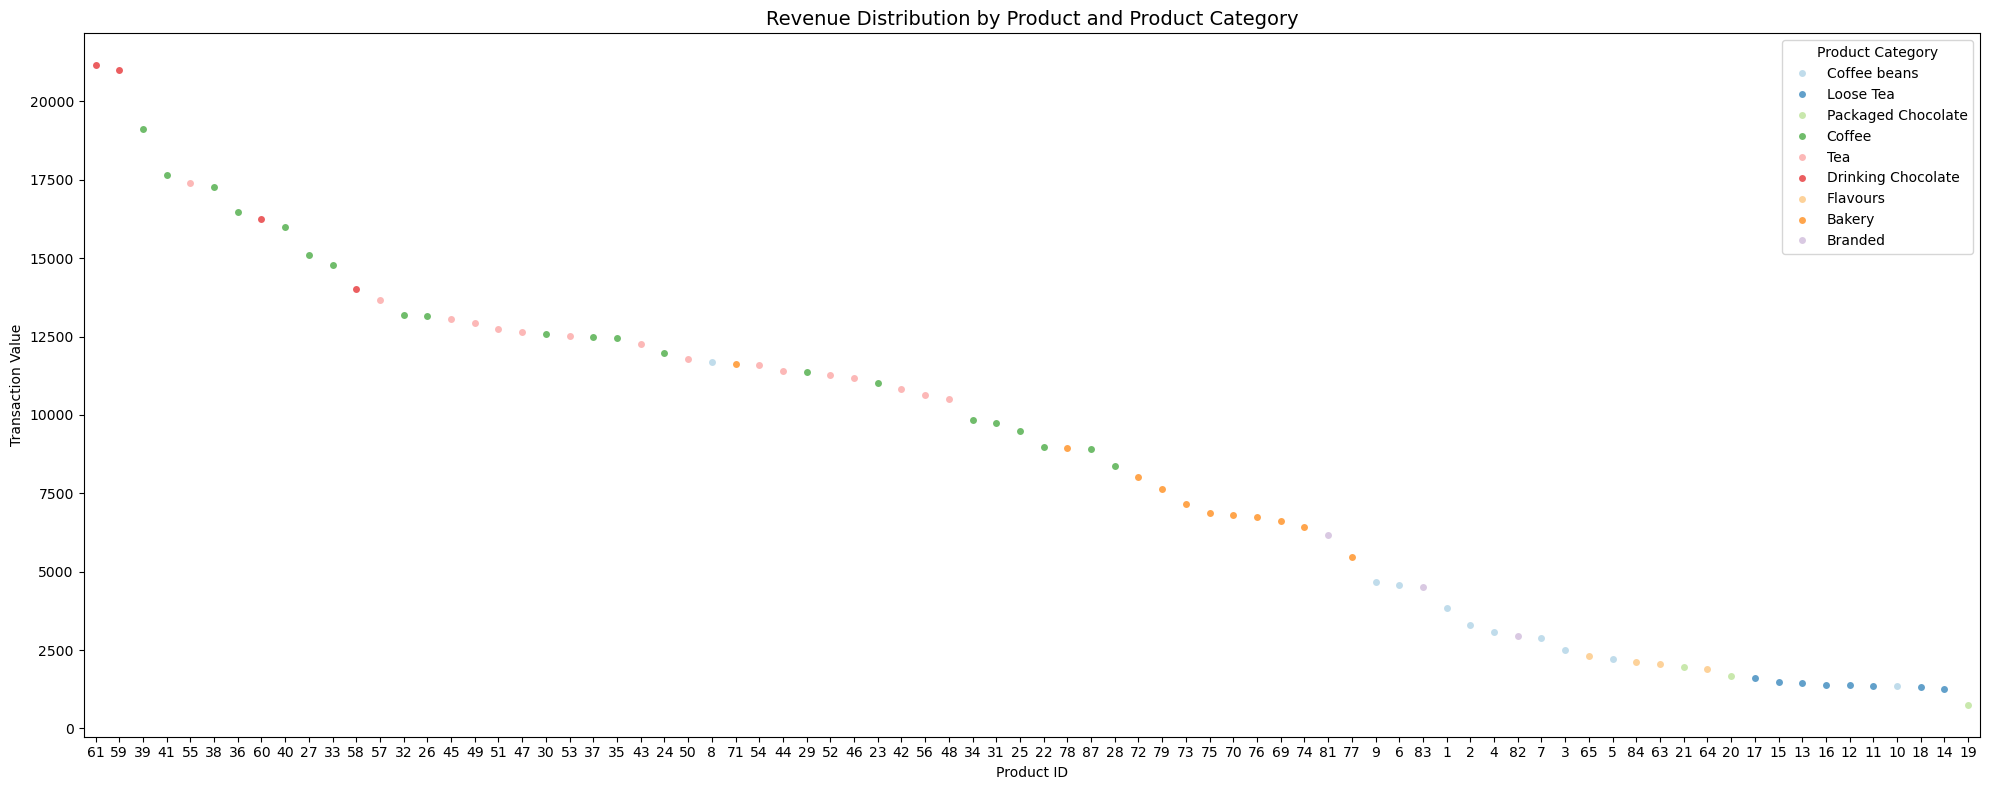

In [102]:
# Relationship between products and their revenue
product_revenue = data.groupby(['product_category', 'product_id'])['transaction_value'].sum().reset_index()
product_revenue = product_revenue.sort_values(by= 'transaction_value', ascending=False)

# Order for chart
product_revenue_order = product_revenue['product_id']

# Stripplot: Revenue Vs Products
plt.figure(figsize=(20, 8))
sns.stripplot(data=product_revenue, 
              x='product_id', 
              y='transaction_value',
              hue= 'product_category',
              order= product_revenue_order,
              alpha= 0.7,
              palette= 'Paired')

plt.title('Revenue Distribution by Product and Product Category', fontsize= 14)
plt.xlabel('Product ID')
plt.ylabel('Transaction Value')
plt.legend(title= "Product Category")

plt.tight_layout()
plt.show()

### Key Takeaways

- `Coffee Dominates Sales`: Coffee consistently contributes the largest share of total sales (~38-40%). Its growth is steady month-over-month, peaking in June.  
- `Tea Shows Significant Growth`: Tea is the second-largest contributor (~27-29%). Sales increased notably from March to June, supporting overall growth.  
- `Steady Contribution from Bakery`: Bakery maintains ~11-12% contribution with minor fluctuations. Growth is slower compared to Coffee and Tea.  
- `Smaller Categories Show Minimal Impact`: Categories like Branded, Loose Tea, and Packaged Chocolate contribute less than 3% each. Their impact on total sales is minimal but stable.  
- `Overall Sales Growth`: Total sales grew significantly from February to June, with Coffee and Tea driving most of the increase. Incremental contributions from smaller categories are minor in comparison.  

#### 3. Revenue, Pricing and Quantity Analysis

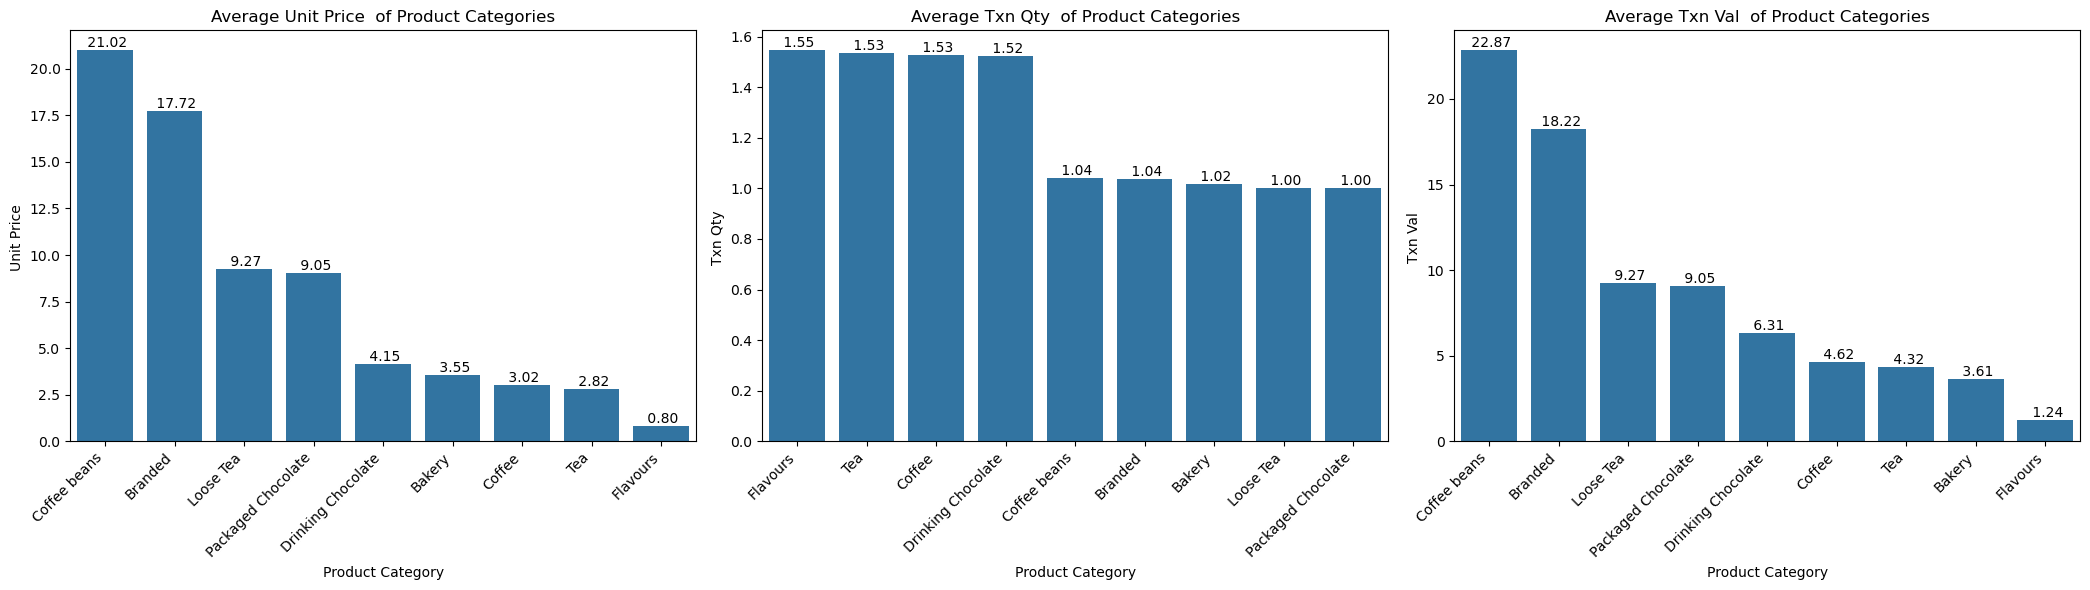

In [103]:
# Product Categorywise average unit value, average quantity per transaction and average transaction value
prodcat_mean = data.groupby('product_category').agg(unit_price_mean=('unit_price', 'mean'), 
                                                     txn_qty_mean=('transaction_qty', 'mean'), 
                                                     txn_val_mean=('transaction_value', 'mean'))
prodcat_mean = prodcat_mean.reset_index()

# Melt the DataFrame
prodcat_mean_long = prodcat_mean.melt(id_vars='product_category', 
                                      var_name='mean_var', 
                                      value_name='mean_value')

mean_vars = prodcat_mean_long['mean_var'].unique()

n_rows = 1 
n_cols = len(mean_vars)

plt.figure(figsize=(7 * n_cols, 6 * n_rows))

for i, j in enumerate(mean_vars):
    mean_vars_data = prodcat_mean_long[prodcat_mean_long['mean_var'] == j]
    mean_vars_data_order = mean_vars_data.sort_values(by= 'mean_value', ascending= False)['product_category']

    plt.subplot(n_rows, n_cols, i+1)

    q= sns.barplot(data= mean_vars_data,
                   x='product_category',
                   y= 'mean_value',
                   order= mean_vars_data_order)
    
    plt.title(f"Average {j.replace("_", " ").replace("mean", "").title()} of Product Categories")
    plt.xlabel("Product Category")
    plt.ylabel(f"{j.replace("_", " ").replace("mean", "").title()}")
    plt.xticks(rotation= 45, ha= 'right' )    

    for i in q.patches:
        height = i.get_height()
        q.annotate(f'{height: .2f}', 
                   (i.get_x() + i.get_width() / 2, height),
                   ha='center', va='bottom',
                   fontsize=10, color='black')
    
plt.tight_layout()
plt.show()

#### Key Takeaway:
- `Premium items`: Coffee beans and Branded products are premium items with high average unit prices and high transaction values.
- High transaction values for Coffee Beans and Branded products correlate with their higher unit prices, indicating they are premium offerings.
- `Low-cost Category`: Flavour make low cost category with average unit price of $0.8 and average transaction value of $1.24.
- `Frequent purchases`: Tea, Coffee, Flavours have high average transaction qunatity.
- `Bakery and Packaged chocolates`: Less frequent purchases (low transaction qunatities) and moderate prices.
- `Low-cost Purchases`: Flavours and Bakery are low-cost purchases with lower transaction values, likely representing smaller, occasional buys.

### **4.1 Unit Price Vs Transaction Quantity**

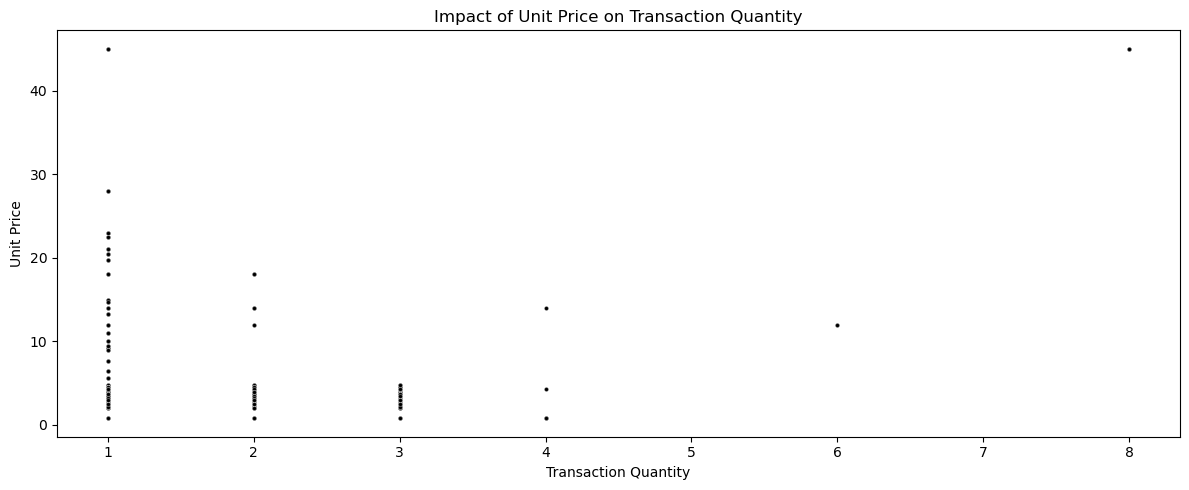

In [104]:
# Unit price and Transaction quantity

plt.figure(figsize=(12, 5))
sns.scatterplot(x= data['transaction_qty'],
                y= data['unit_price'],
                s=8,  
                color='black',
                legend=False)

plt.title("Impact of Unit Price on Transaction Quantity")
plt.xlabel("Transaction Quantity")
plt.ylabel("Unit Price")

plt.tight_layout()
plt.show()

In [105]:
# Correlation Analysis and Linear Regression

from scipy.stats import linregress

corr_unitprice_tq = data['unit_price'].corr(data['transaction_qty'])
slope, intercept, r_value, p_value, std_err = linregress(data['unit_price'], data['transaction_qty'])

print(f"Correlation Coefficient: {corr_unitprice_tq}")
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")

Correlation Coefficient: -0.12354566015198828
Slope: -0.025209325357088197
Intercept: 1.523539710928738
R-squared: 0.01526353014239058
P-value: 0.0


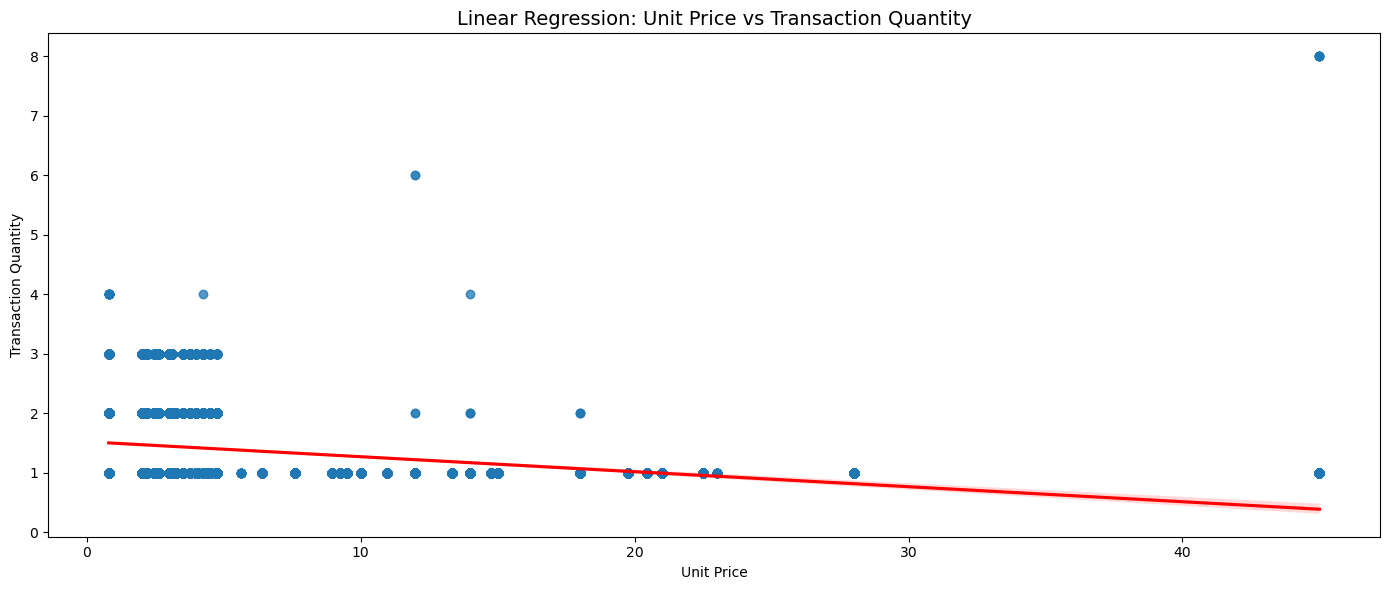

In [106]:
# Visulization: Regression

plt.figure(figsize=(14, 6))
sns.regplot(data=data, 
            x='unit_price', 
            y='transaction_qty', 
            scatter_kws={'alpha': 0.5}, 
            line_kws={'color': 'red'})

plt.title('Linear Regression: Unit Price vs Transaction Quantity', fontsize=14)
plt.xlabel('Unit Price')
plt.ylabel('Transaction Quantity')

plt.tight_layout()
plt.show()

#### **Key Takeaway:**
- Correlation coefficient value of -0.1235 indicates a `weak negative linear relationship` between Unit Price and Transaction Quantity.
- `Negative value`: As unit price increases transaction quantity decreases.
- `P-value (0.0)`: The relationship is statistically significant despite its weak explanatory power.
- `R-squared (0.0153)`: Only 1.53% of the variation in transaction_qty is explained by unit_price, showing a weak relationship.
- `Interpretation`: `Unit_price negatively influences transaction_qty`, but other factors likely play a larger role, as relationship is weak.

### **4.2 Unit Price Vs Transaction Value**

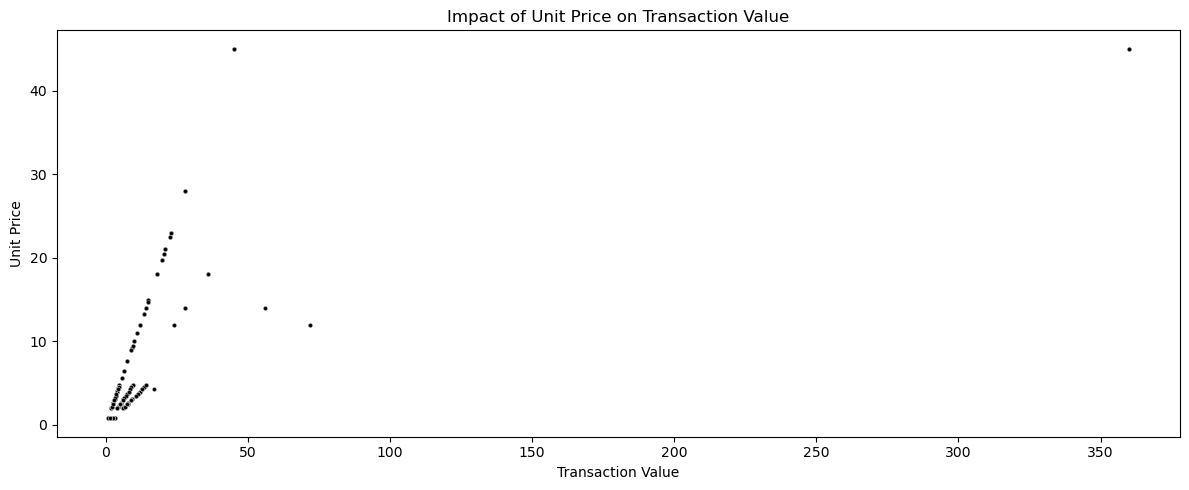

In [107]:
# Unit price and Transaction Value

plt.figure(figsize=(12, 5))
sns.scatterplot(x= data['transaction_value'],
                y= data['unit_price'],
                s=8,  
                color='black',
                legend=False)

plt.title("Impact of Unit Price on Transaction Value")
plt.xlabel("Transaction Value")
plt.ylabel("Unit Price")

plt.tight_layout()
plt.show()

In [108]:
# Correlation Analysis and Linear Regression

corr_unitprice_tval = data['unit_price'].corr(data['transaction_value'])
slope, intercept, r_value, p_value, std_err = linregress(data['unit_price'], data['transaction_value'])

print(f"Correlation Coefficient: {corr_unitprice_tval}")
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")

Correlation Coefficient: 0.6855495636754677
Slope: 1.0899542137632159
Intercept: 0.9999028894913504
R-squared: 0.469978204255624
P-value: 0.0


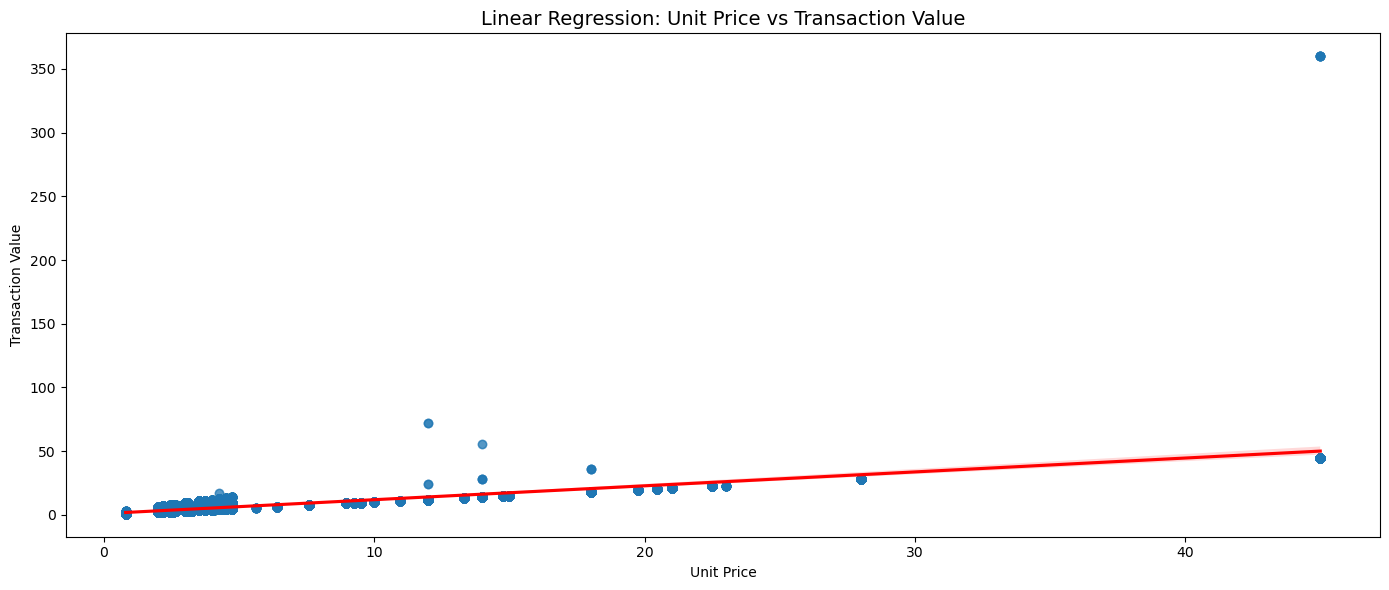

In [109]:
# Visulization: Regretion

plt.figure(figsize=(14, 6))
sns.regplot(data=data, 
            x='unit_price', 
            y='transaction_value', 
            scatter_kws={'alpha': 0.5}, 
            line_kws={'color': 'red'})

plt.title('Linear Regression: Unit Price vs Transaction Value', fontsize=14)
plt.xlabel('Unit Price')
plt.ylabel('Transaction Value')

plt.tight_layout()
plt.show()

#### **Key Takeaway:**
- `Correlation (0.686)`: A `strong positive relationship exists between unit_price and transaction_value`.
-  Iigher-priced products tend to generate higher transaction values.
- `Slope (1.0899)`: For every unit increase in unit_price, transaction_value increases by approximately 1.09 on average.
- `R-squared (0.470)`: 47% of the variation in transaction_value is directly explained by unit_price, showcasing it as a significant driver of revenue.
- `P-value (0.0)`: The relationship is statistically significant.
- `Interpretation`: Unit_price positively influences transaction_value, suggesting that pricing is an important factor in driving revenue.

### **4.2 Transaction Quantity Vs Transaction Value**

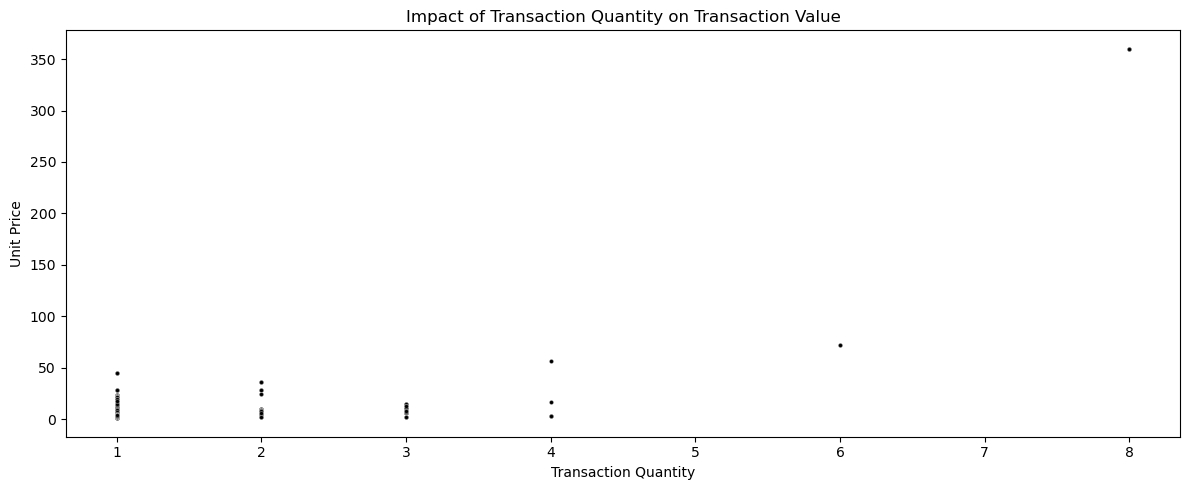

In [110]:
# Transaction Quantity and Transaction Value

plt.figure(figsize=(12, 5))
sns.scatterplot(x= data['transaction_qty'],
                y= data['transaction_value'],
                s=8,  
                color='black',
                legend=False)

plt.title("Impact of Transaction Quantity on Transaction Value")
plt.xlabel("Transaction Quantity")
plt.ylabel("Unit Price")

plt.tight_layout()
plt.show()

In [111]:
# Correlation Analysis and Linear Regression

corr_tq_tval = data['transaction_qty'].corr(data['transaction_value'])
slope, intercept, r_value, p_value, std_err = linregress(data['transaction_qty'], data['transaction_value'])

print(f"Correlation Coefficient: {corr_tq_tval}")
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")

Correlation Coefficient: 0.3562308526230821
Slope: 2.775665946313518
Intercept: 0.6941928062323295
R-squared: 0.126900420360568
P-value: 0.0


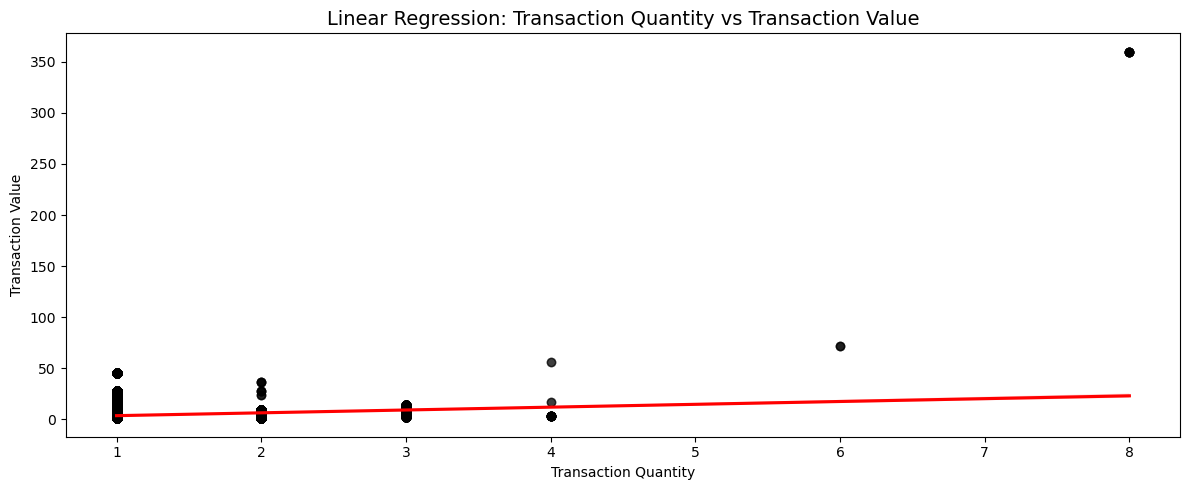

In [112]:
# Visulization: Regression

plt.figure(figsize=(12, 5))
sns.regplot(data=data, 
            x='transaction_qty', 
            y='transaction_value', 
            scatter_kws={'alpha': 0.5}, 
            line_kws={'color': 'red'},  
                color='black')

plt.title('Linear Regression: Transaction Quantity vs Transaction Value', fontsize=14)
plt.xlabel('Transaction Quantity')
plt.ylabel('Transaction Value')

plt.tight_layout()
plt.show()

#### **Key Takeaway:**
- `Correlation coefficient (0.3562)`: Indicates a weak to moderate positive linear relationship between transaction_quantity and transaction_value.
- As transaction_quantity increases, transaction_value tends to increase, but the relationship is not very strong.
- `Slope (2.7757)`: Each unit increase in transaction_quantity raises transaction_value by 2.78.
- `Intercept (0.6942)`: Predicted transaction_value at zero transaction_quantity is 0.69.
- `R-squared (0.1269)`: Only 12.69% of transaction_value variation is explained by transaction_quantity.
- `P-value (0.0)`: The relationship is statistically significant.
- `Interpretation`: Transaction_quantity positively influences transaction_value, but other variables contribute more significantly to determining transaction value, as the relationship is relatively weak.

### 5. Customer behaviour pattern
- Transaction Quantity by product type and product category
- Transaction Value (Sales Amount) by product type and product category 

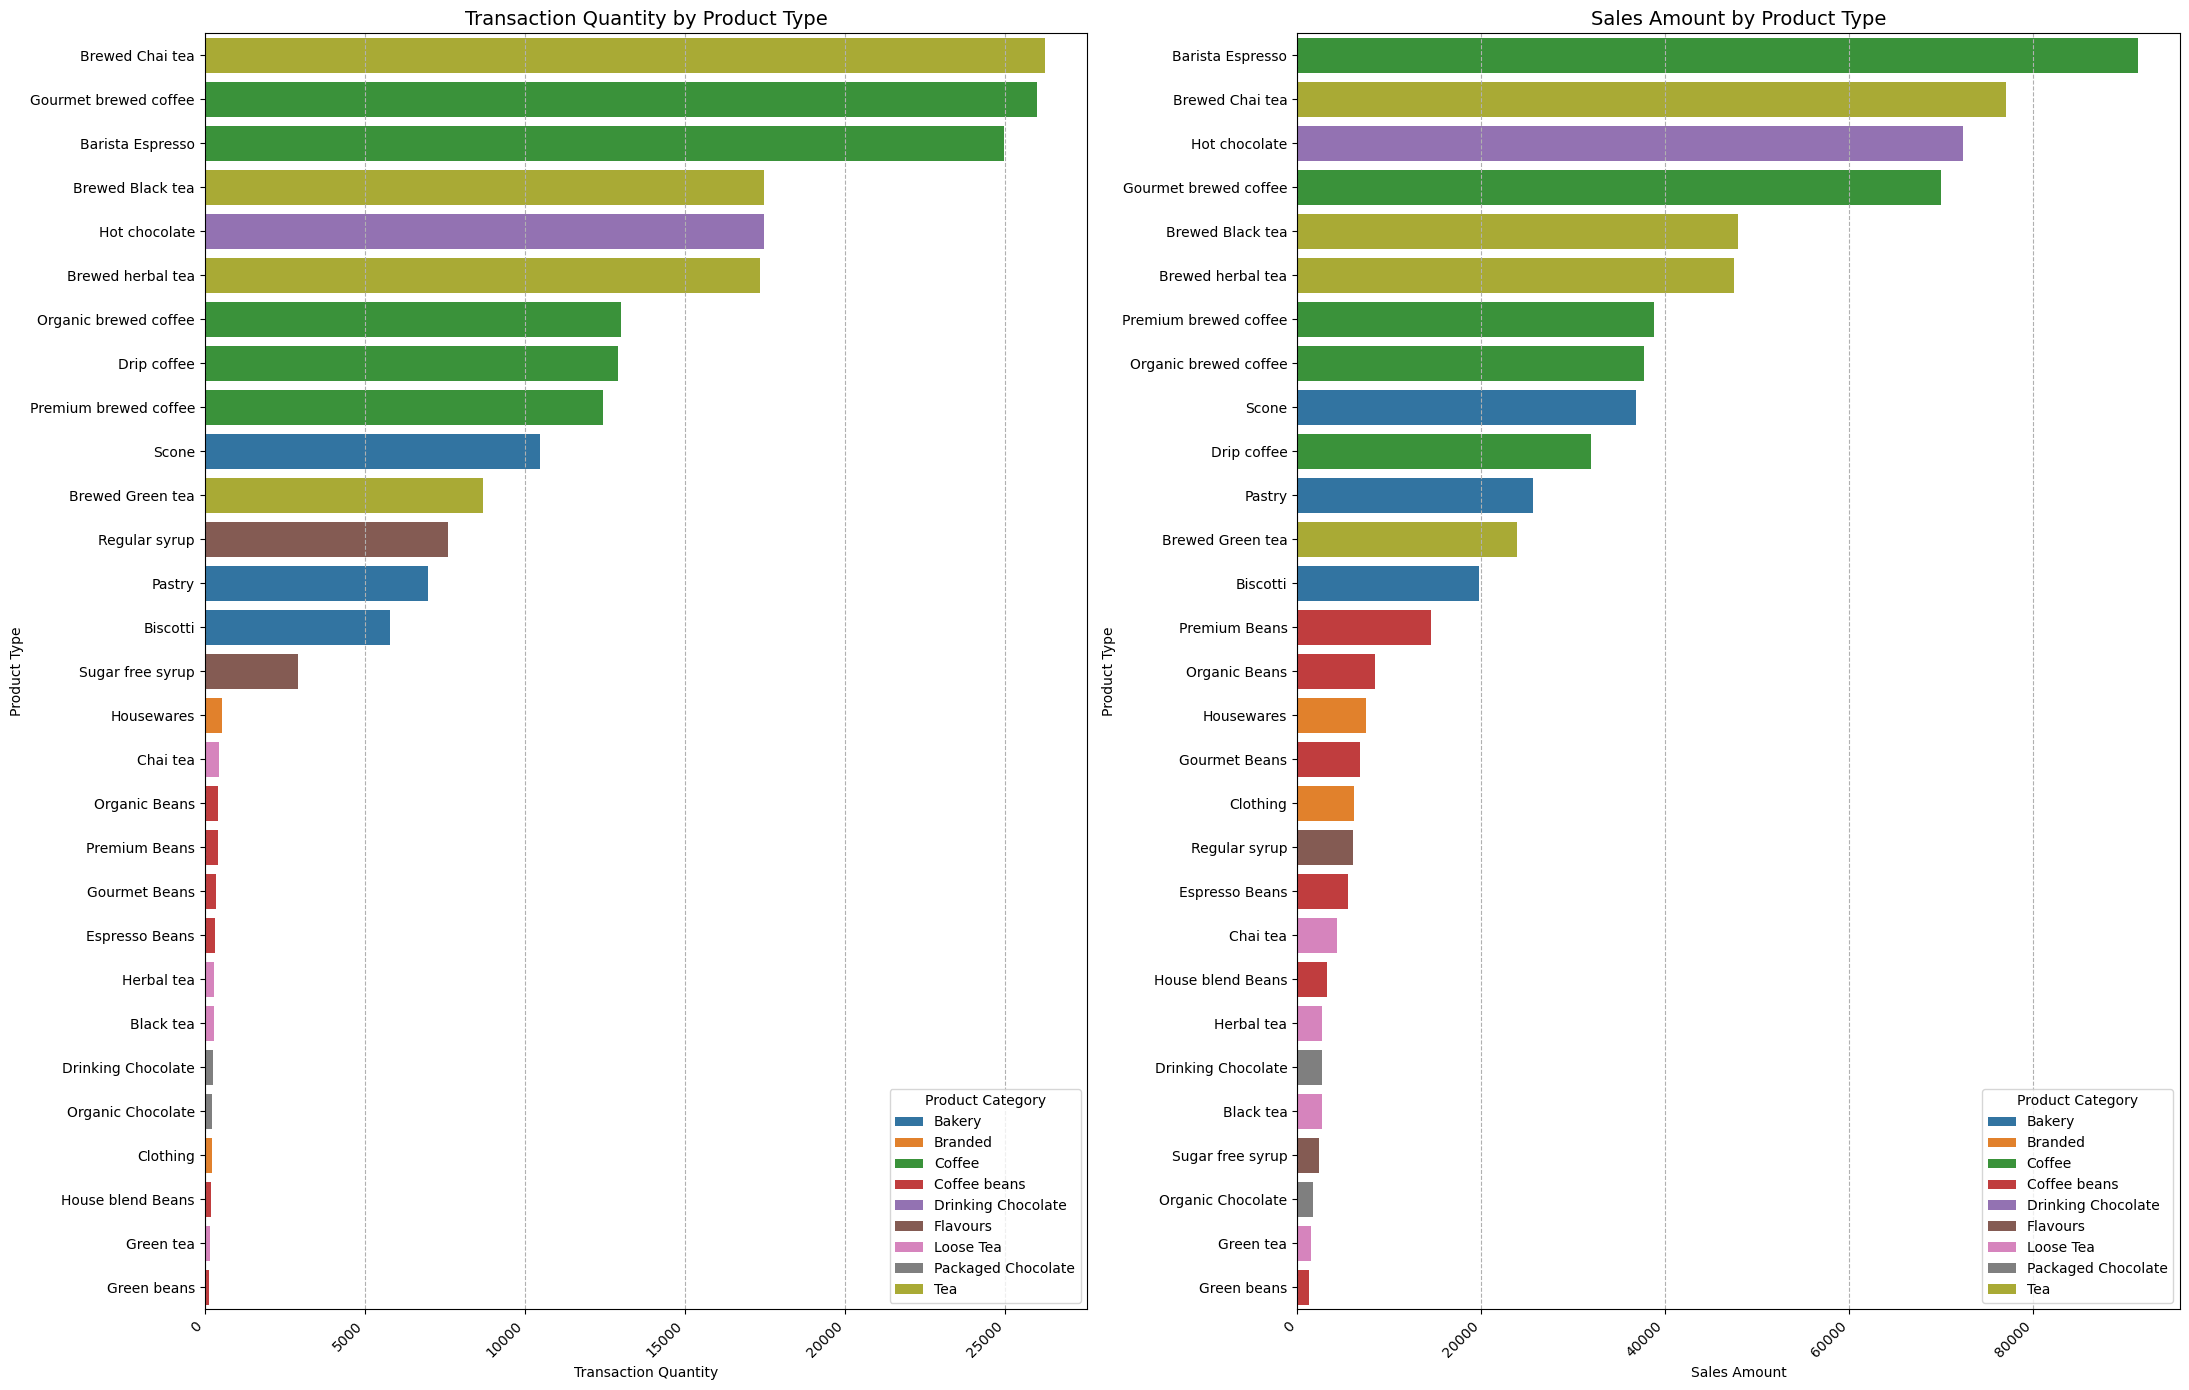

In [113]:
# Transaction Quantity by product type

prodtype_tq_revenue= data.groupby(['product_category', 'product_type']).agg(txn_count = ('transaction_qty', 'sum'),
                                                                        revenue = ('transaction_value', 'sum')).reset_index()


plt.figure(figsize= (22, 14))

prodtype_tq_revenue_order1 = prodtype_tq_revenue.sort_values(by= 'txn_count', ascending=False)['product_type']

plt.subplot(1, 2, 1)
sns.barplot(data= prodtype_tq_revenue,
            x= 'txn_count',
            y= 'product_type',
            hue='product_category',
            order= prodtype_tq_revenue_order1)

plt.title("Transaction Quantity by Product Type", fontsize= 14)
plt.xlabel("Transaction Quantity")
plt.ylabel("Product Type")
plt.legend(title= 'Product Category')
plt.xticks(rotation = 45, ha= 'right')
plt.grid(axis='x', linestyle='--')

# Sales amount by product type and category
prodtype_tq_revenue_order2 = prodtype_tq_revenue.sort_values(by= 'revenue', ascending=False)['product_type']

plt.subplot(1, 2, 2)
sns.barplot(data= prodtype_tq_revenue, 
            x= 'revenue',
            y= 'product_type',
            hue = 'product_category',
            order= prodtype_tq_revenue_order2)

plt.title("Sales Amount by Product Type", fontsize= 14)
plt.xlabel("Sales Amount")
plt.ylabel("Product Type")
plt.legend(title= 'Product Category')
plt.xticks(rotation = 45, ha= 'right')
plt.grid(axis='x', linestyle='--')

plt.tight_layout()
plt.show()

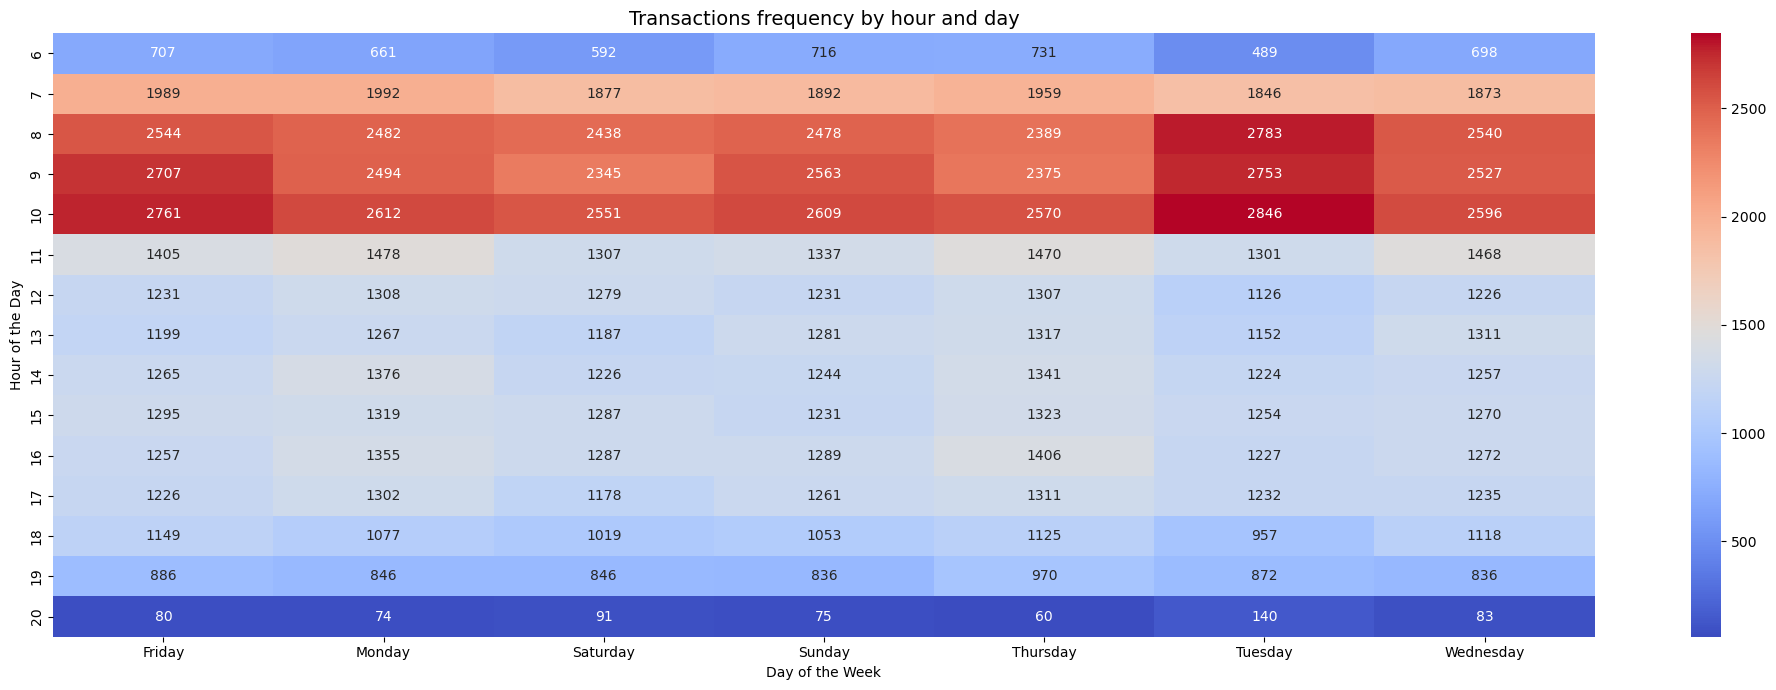

In [114]:
# Heatmap: Transactions frequency distribution pattern by day of the week and hour of the day

txnby_hour_day_hmp = data.pivot_table(values='transaction_value', index='hour', columns='day_of_week', aggfunc='count')

plt.figure(figsize=(20, 7))
sns.heatmap(txnby_hour_day_hmp, cmap='coolwarm', annot=True, fmt='d')

plt.title("Transactions frequency by hour and day", fontsize= 14)
plt.xlabel("Day of the Week")
plt.ylabel("Hour of the Day")

plt.tight_layout()
plt.show()

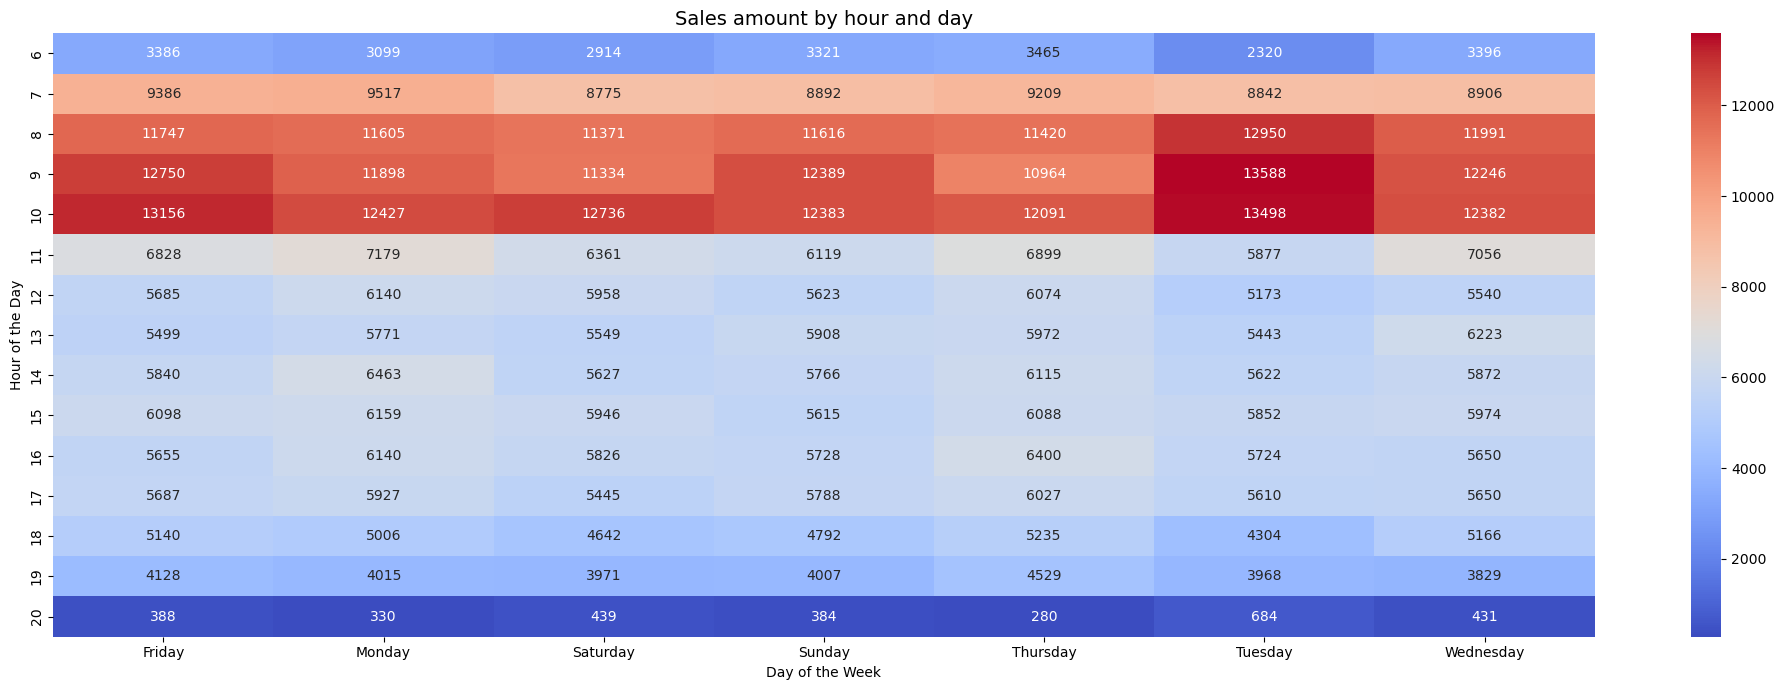

In [115]:
# Heatmap: Transactions value (Sales Amount) distribution pattern by day of the week and hour of the day

salesby_hour_day_hmp = data.pivot_table(values='transaction_value', index='hour', columns='day_of_week', aggfunc='sum')

plt.figure(figsize=(20, 7))
sns.heatmap(salesby_hour_day_hmp, cmap='coolwarm', annot=True, fmt= '.0f')

plt.title("Sales amount by hour and day", fontsize= 14)
plt.xlabel("Day of the Week")
plt.ylabel("Hour of the Day")

plt.tight_layout()
plt.show()

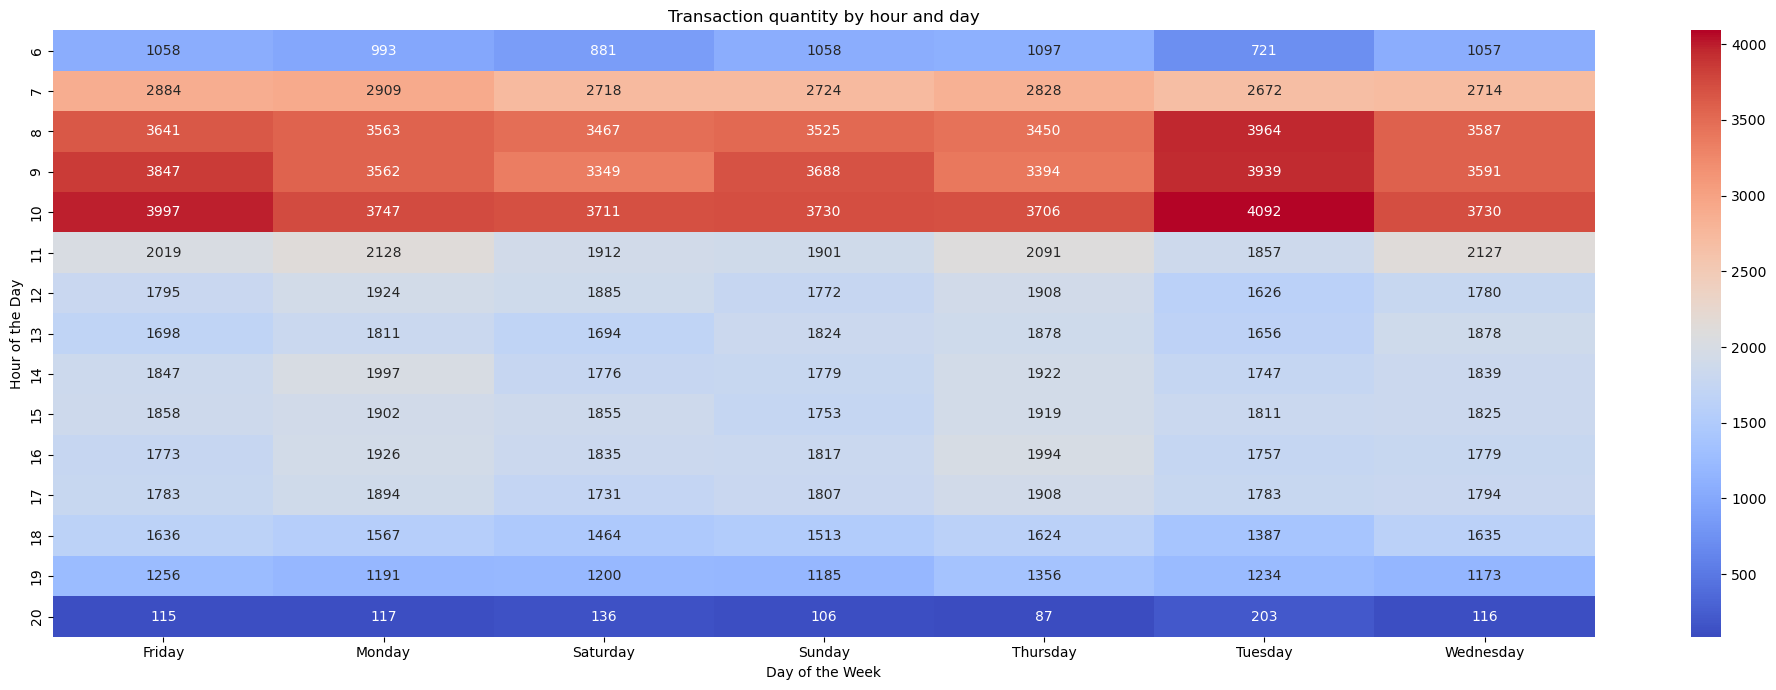

In [116]:
# Transaction quantity distribution by day of the week and hour of the day
 
qtyby_hour_day_hmp = data.pivot_table(values='transaction_qty', index='hour', columns='day_of_week', aggfunc='sum')

plt.figure(figsize=(20, 7))
sns.heatmap(qtyby_hour_day_hmp, cmap='coolwarm', annot=True, fmt= 'd')

plt.title("Transaction quantity by hour and day")
plt.xlabel("Day of the Week")
plt.ylabel("Hour of the Day")

plt.tight_layout()
plt.show()

#### **4.4: Transactions, Quantity and Revenue of Product Categories by Hour of the Day** 

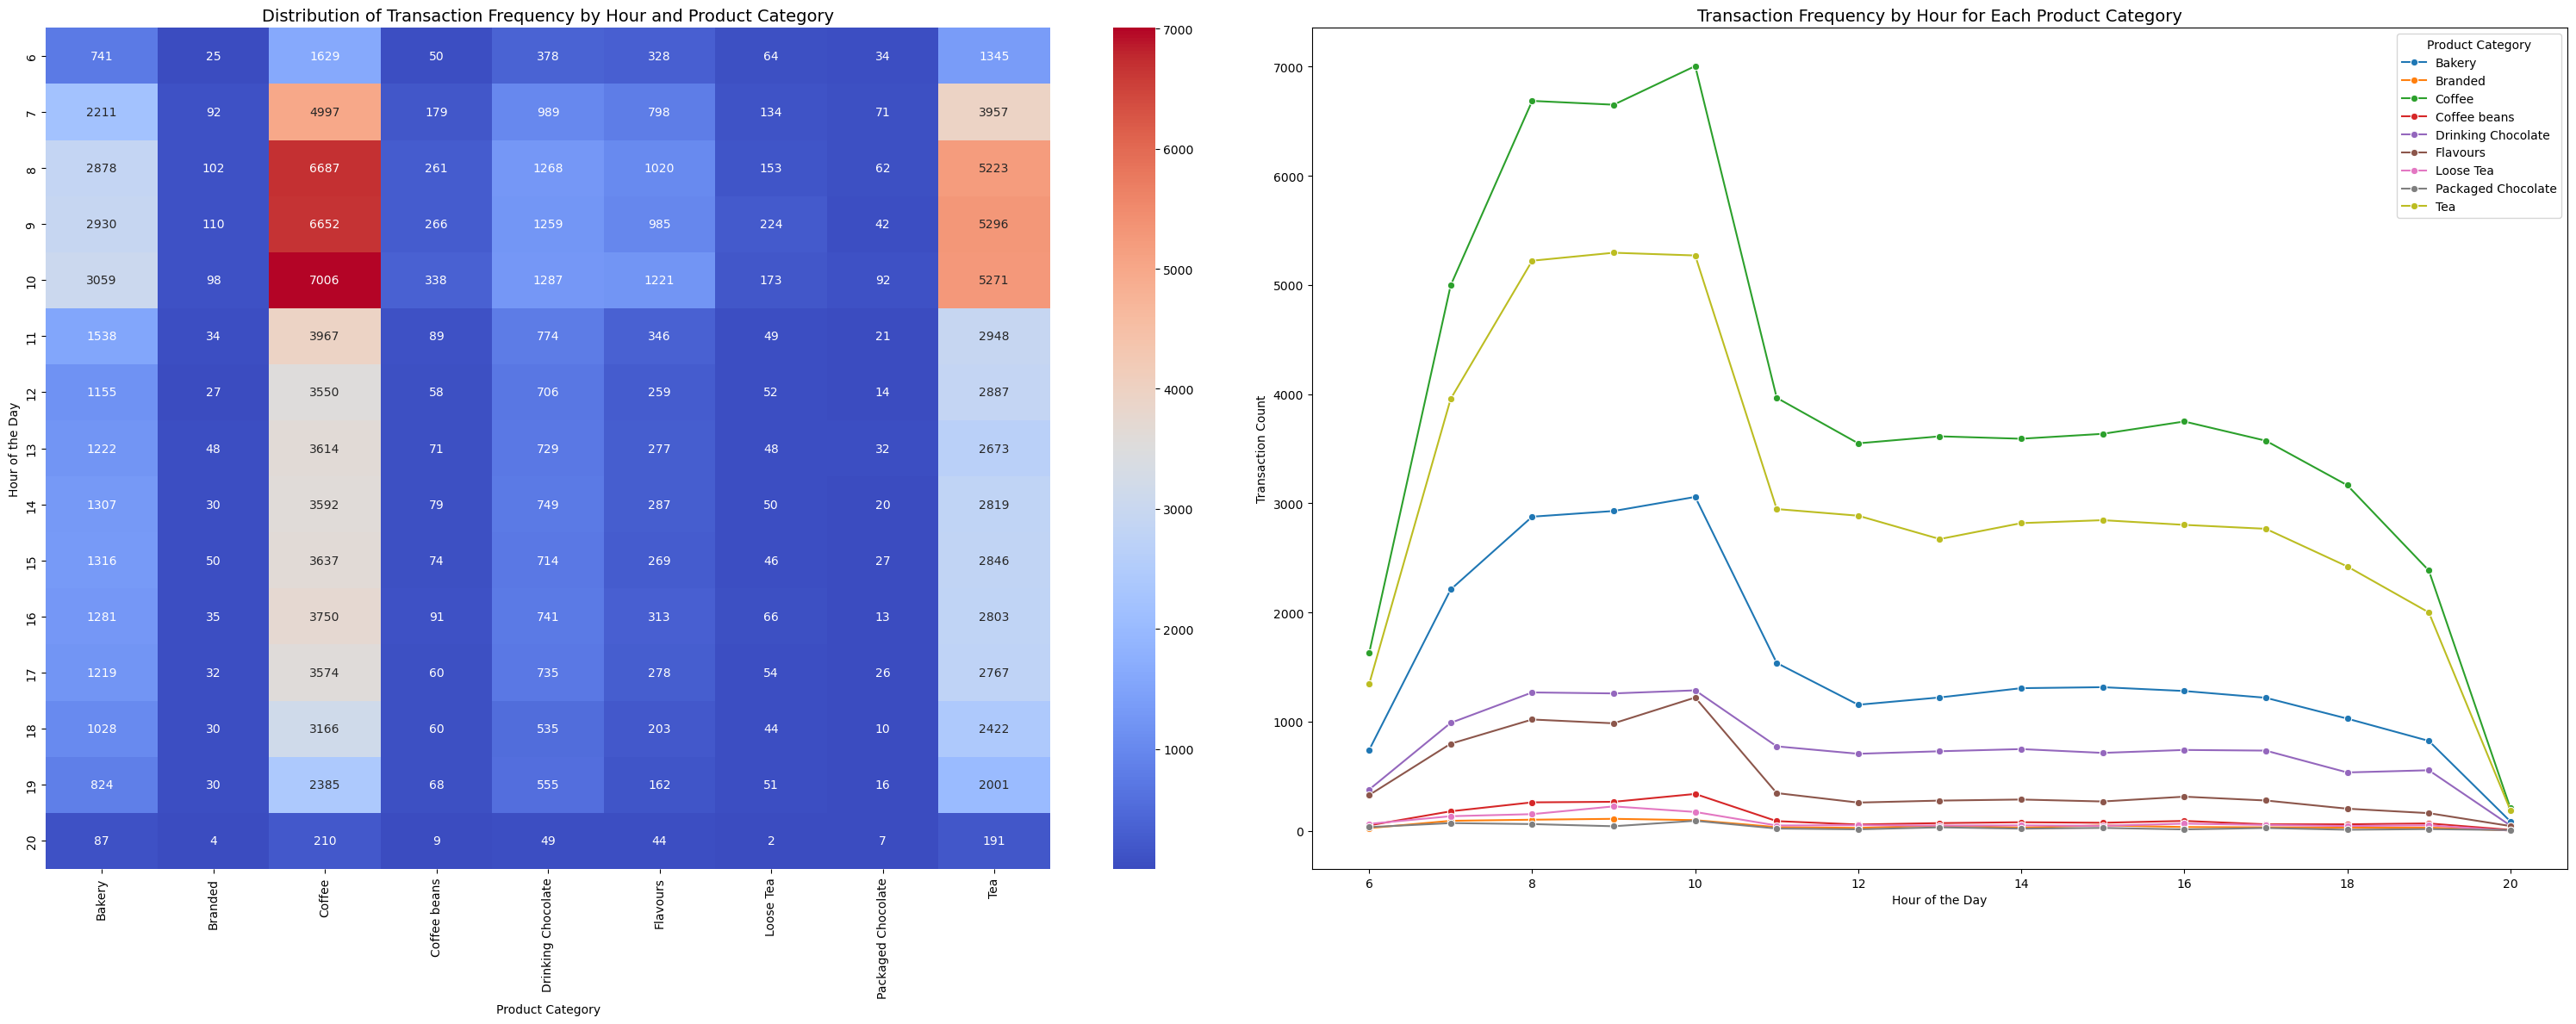

In [117]:
# Transactions frequency by hour and product category

txn_hour_prodcat = data.pivot_table(values='transaction_value', index='hour', columns='product_category', aggfunc='count')

plt.figure(figsize=(30, 12))

# Heatmap: Transaction frequency by hour and product category
plt.subplot(1, 2, 1)  
sns.heatmap(txn_hour_prodcat, cmap='coolwarm', annot=True, fmt="d")

plt.title("Distribution of Transaction Frequency by Hour and Product Category", fontsize=14)
plt.xlabel("Product Category")
plt.ylabel("Hour of the Day")

# Melt the pivot table for the line plot
txn_hour_prodcat = txn_hour_prodcat.reset_index()
txn_hour_prodcat_long = txn_hour_prodcat.melt(id_vars='hour', var_name='product_category', value_name='txn_count')

# Line plot: Transaction frequency by hour and product category
plt.subplot(1, 2, 2)  
sns.lineplot(data=txn_hour_prodcat_long, x='hour', y='txn_count', hue='product_category', marker= 'o')

plt.title("Transaction Frequency by Hour for Each Product Category", fontsize=14)
plt.xlabel("Hour of the Day")
plt.ylabel("Transaction Count")
plt.legend(title = 'Product Category')

plt.tight_layout()
plt.show()

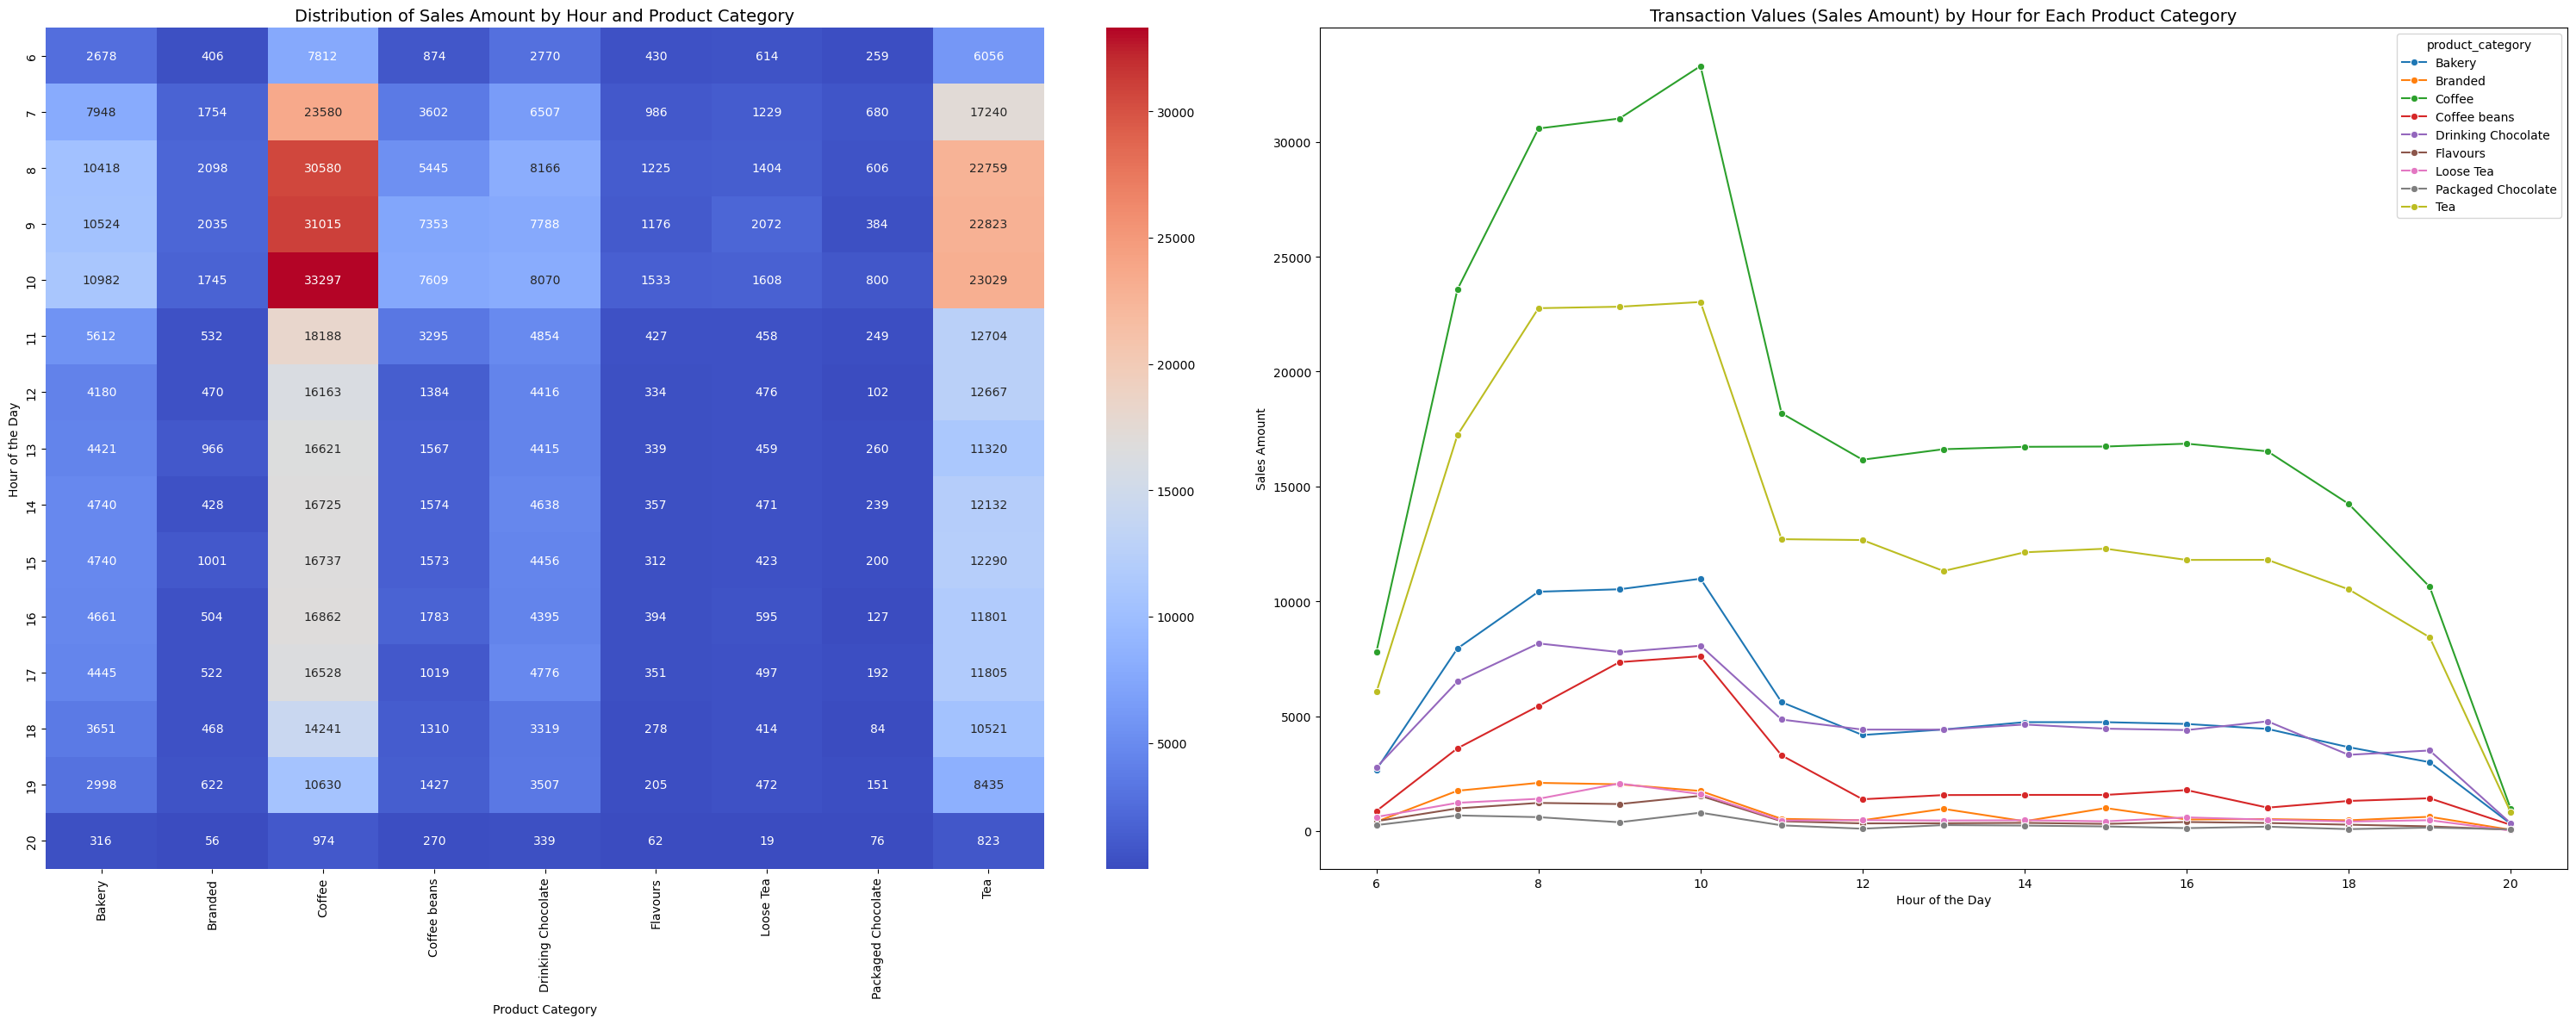

In [118]:
# Transaction values (Sales amount) by hour and product category
sales_hour_pc_hmp = data.pivot_table(values='transaction_value', index='hour', columns='product_category', aggfunc='sum')

plt.figure(figsize=(30, 12))

# Heatmap: Sales amount by hour and product category
plt.subplot(1, 2, 1)  
sns.heatmap(sales_hour_pc_hmp, cmap='coolwarm', annot=True, fmt=".0f")

plt.title("Distribution of Sales Amount by Hour and Product Category", fontsize=14)
plt.xlabel("Product Category")
plt.ylabel("Hour of the Day")

# Melt the pivot table 
sales_hour_pc_hmp = sales_hour_pc_hmp.reset_index()
sales_hour_pc_hmp_long = sales_hour_pc_hmp.melt(id_vars='hour', var_name='product_category', value_name='txn_value')

# Line plot: Sales amount by hour and product category
plt.subplot(1, 2, 2)  
sns.lineplot(data=sales_hour_pc_hmp_long, x='hour', y='txn_value', hue='product_category', marker= 'o')

plt.title("Transaction Values (Sales Amount) by Hour for Each Product Category", fontsize=14)
plt.xlabel("Hour of the Day")
plt.ylabel("Sales Amount")

plt.tight_layout()
plt.show()

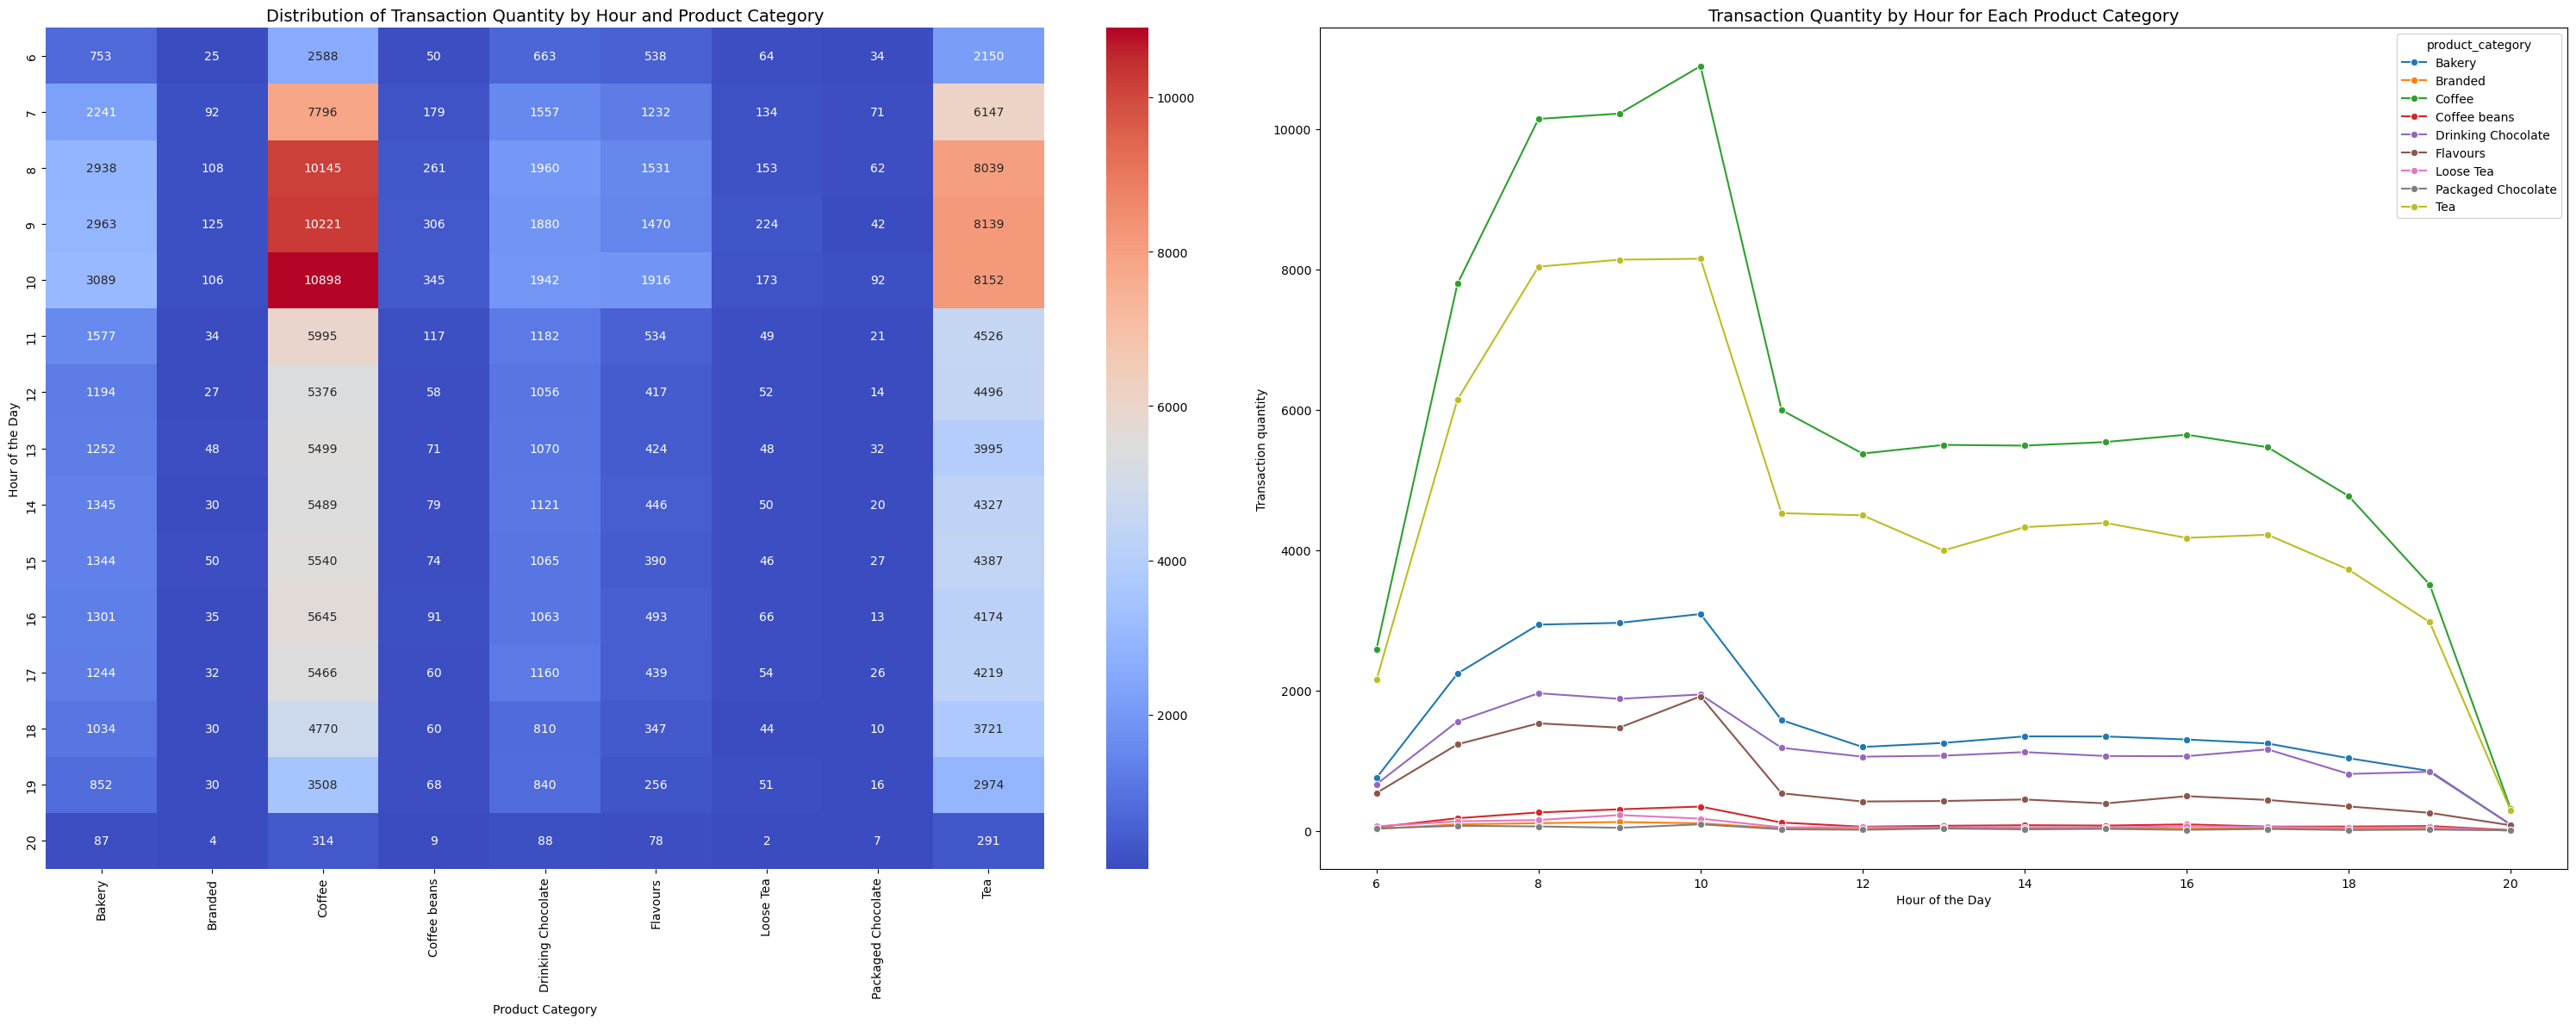

In [119]:
# Transaction Quantity by hour and product category
qty_hour_pc_hmp = data.pivot_table(values='transaction_qty', 
                                   index='hour', 
                                   columns='product_category', 
                                   aggfunc='sum')

plt.figure(figsize=(30, 12))

# Heatmap: Transaction Quantity by hour and product category
plt.subplot(1, 2, 1)  
sns.heatmap(qty_hour_pc_hmp, cmap='coolwarm', annot=True, fmt=".0f")

plt.title("Distribution of Transaction Quantity by Hour and Product Category", fontsize=14)
plt.xlabel("Product Category")
plt.ylabel("Hour of the Day")

# Melt the pivot table 
qty_hour_pc_hmp = qty_hour_pc_hmp.reset_index()
qty_hour_pc_hmp_long = qty_hour_pc_hmp.melt(id_vars='hour', 
                                           var_name='product_category', 
                                           value_name='txn_qty')

# Line plot: Transaction Quantity by hour and product category
plt.subplot(1, 2, 2)  
sns.lineplot(data=qty_hour_pc_hmp_long, x='hour', y='txn_qty', hue='product_category', marker= 'o')

plt.title("Transaction Quantity by Hour for Each Product Category", fontsize=14)
plt.xlabel("Hour of the Day")
plt.ylabel("Transaction quantity")

plt.tight_layout()
plt.show()

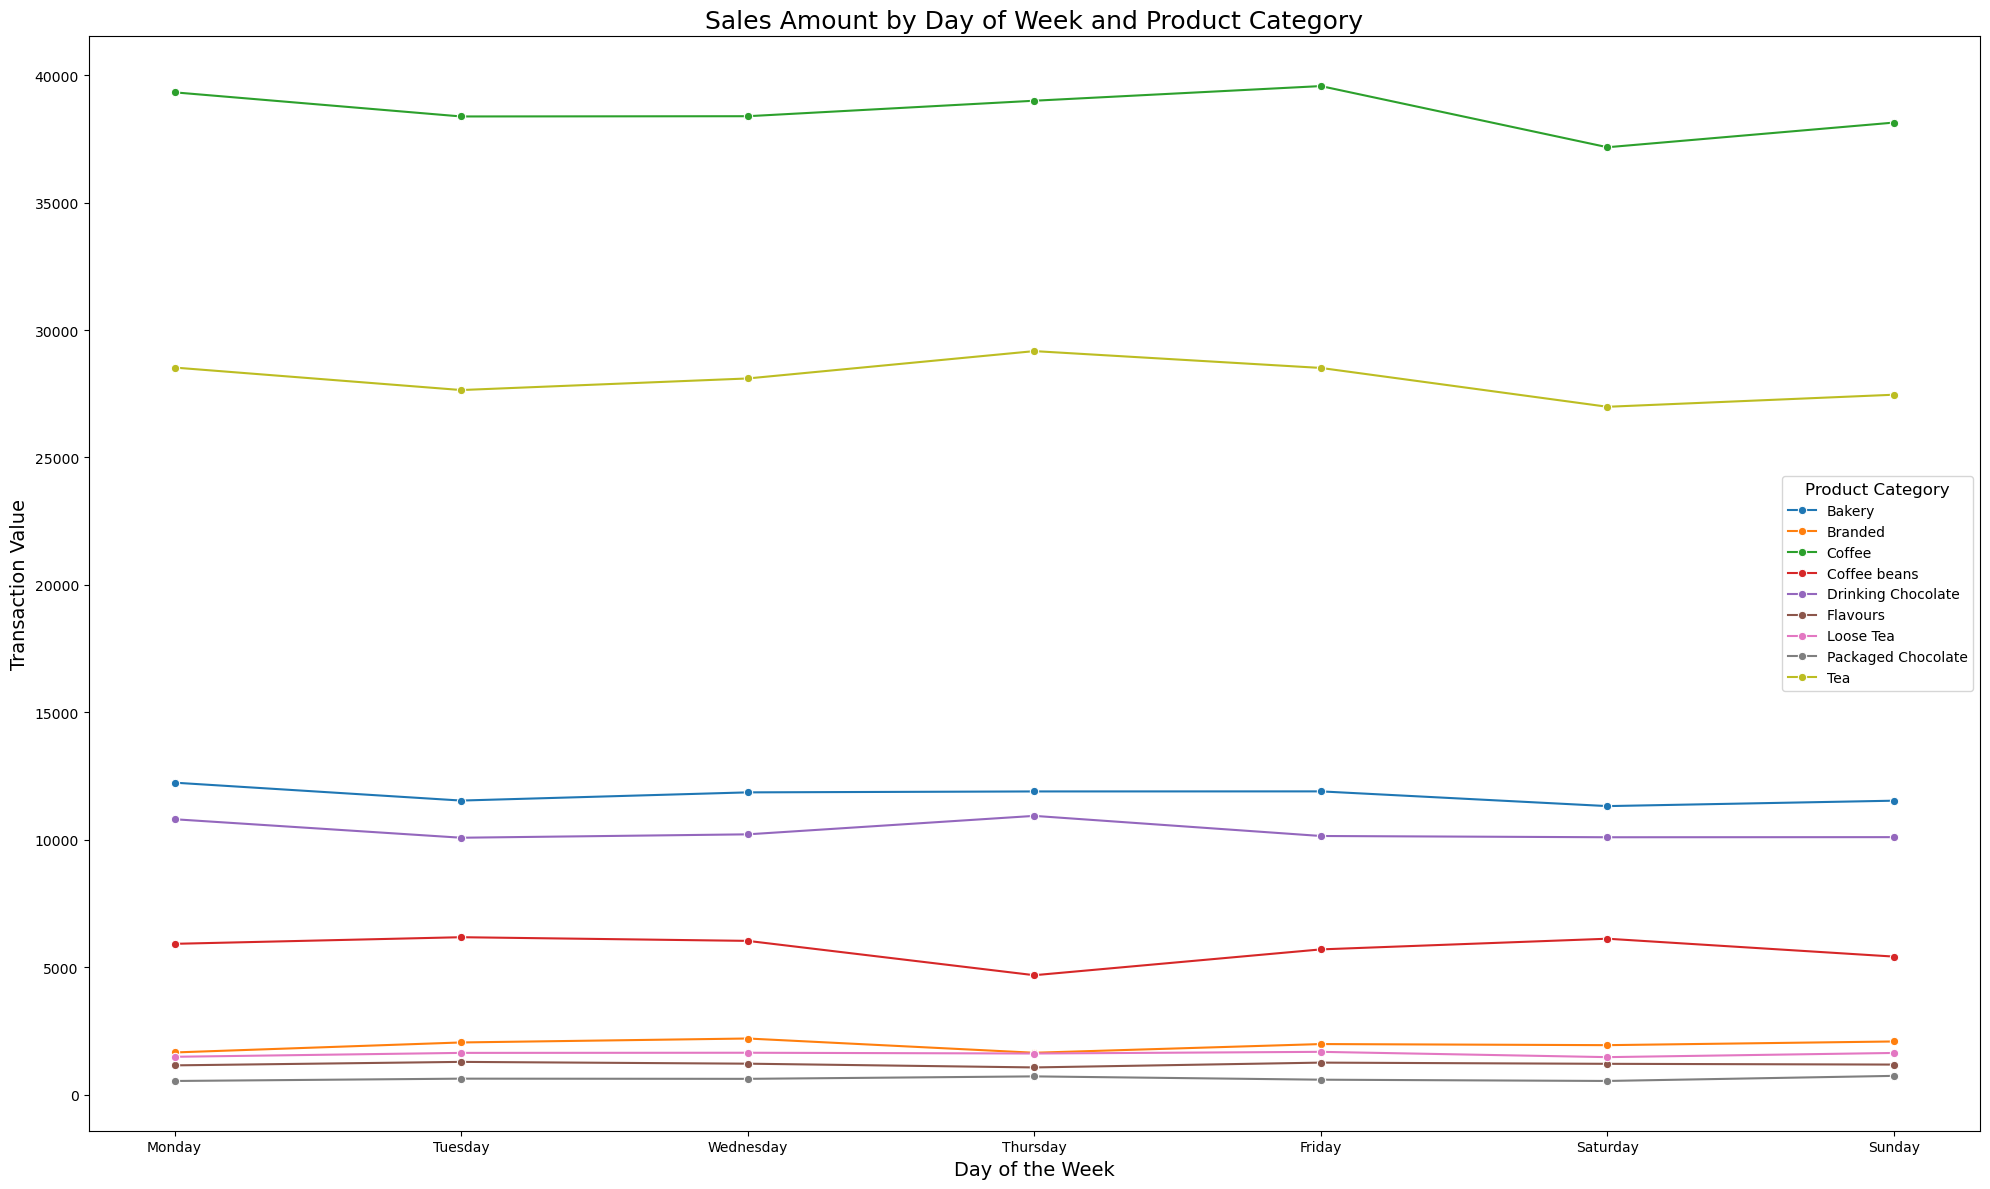

In [120]:
# Create a pivot table to summarize transaction values
sales_hour_day_pc = data.pivot_table(values='transaction_value', 
                                     index='day_of_week', 
                                     columns='product_category', 
                                     aggfunc='sum')

sales_hour_day_pc = sales_hour_day_pc.reset_index()

# Step 3: Melt the pivot table to long format 
sales_hour_day_pc_long = sales_hour_day_pc.melt(id_vars='day_of_week', 
                                                var_name='product_category', 
                                                value_name='txn_value')

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert 'day_of_week' column to categorical type with specified order
sales_hour_day_pc_long['day_of_week'] = pd.Categorical(sales_hour_day_pc_long['day_of_week'], categories=day_order, ordered=True)

# Lineplot
plt.figure(figsize=(20, 12))

sns.lineplot(data=sales_hour_day_pc_long, 
             x='day_of_week', 
             y='txn_value', 
             hue='product_category',
             marker='o')

plt.title("Sales Amount by Day of Week and Product Category", fontsize=18)
plt.xlabel("Day of the Week", fontsize=14)
plt.ylabel("Transaction Value", fontsize=14)
plt.legend(title='Product Category', title_fontsize='12', fontsize='10')

plt.tight_layout()
plt.show()


##### Sales amount distribution (transaction_value) by hour of the day for each product category

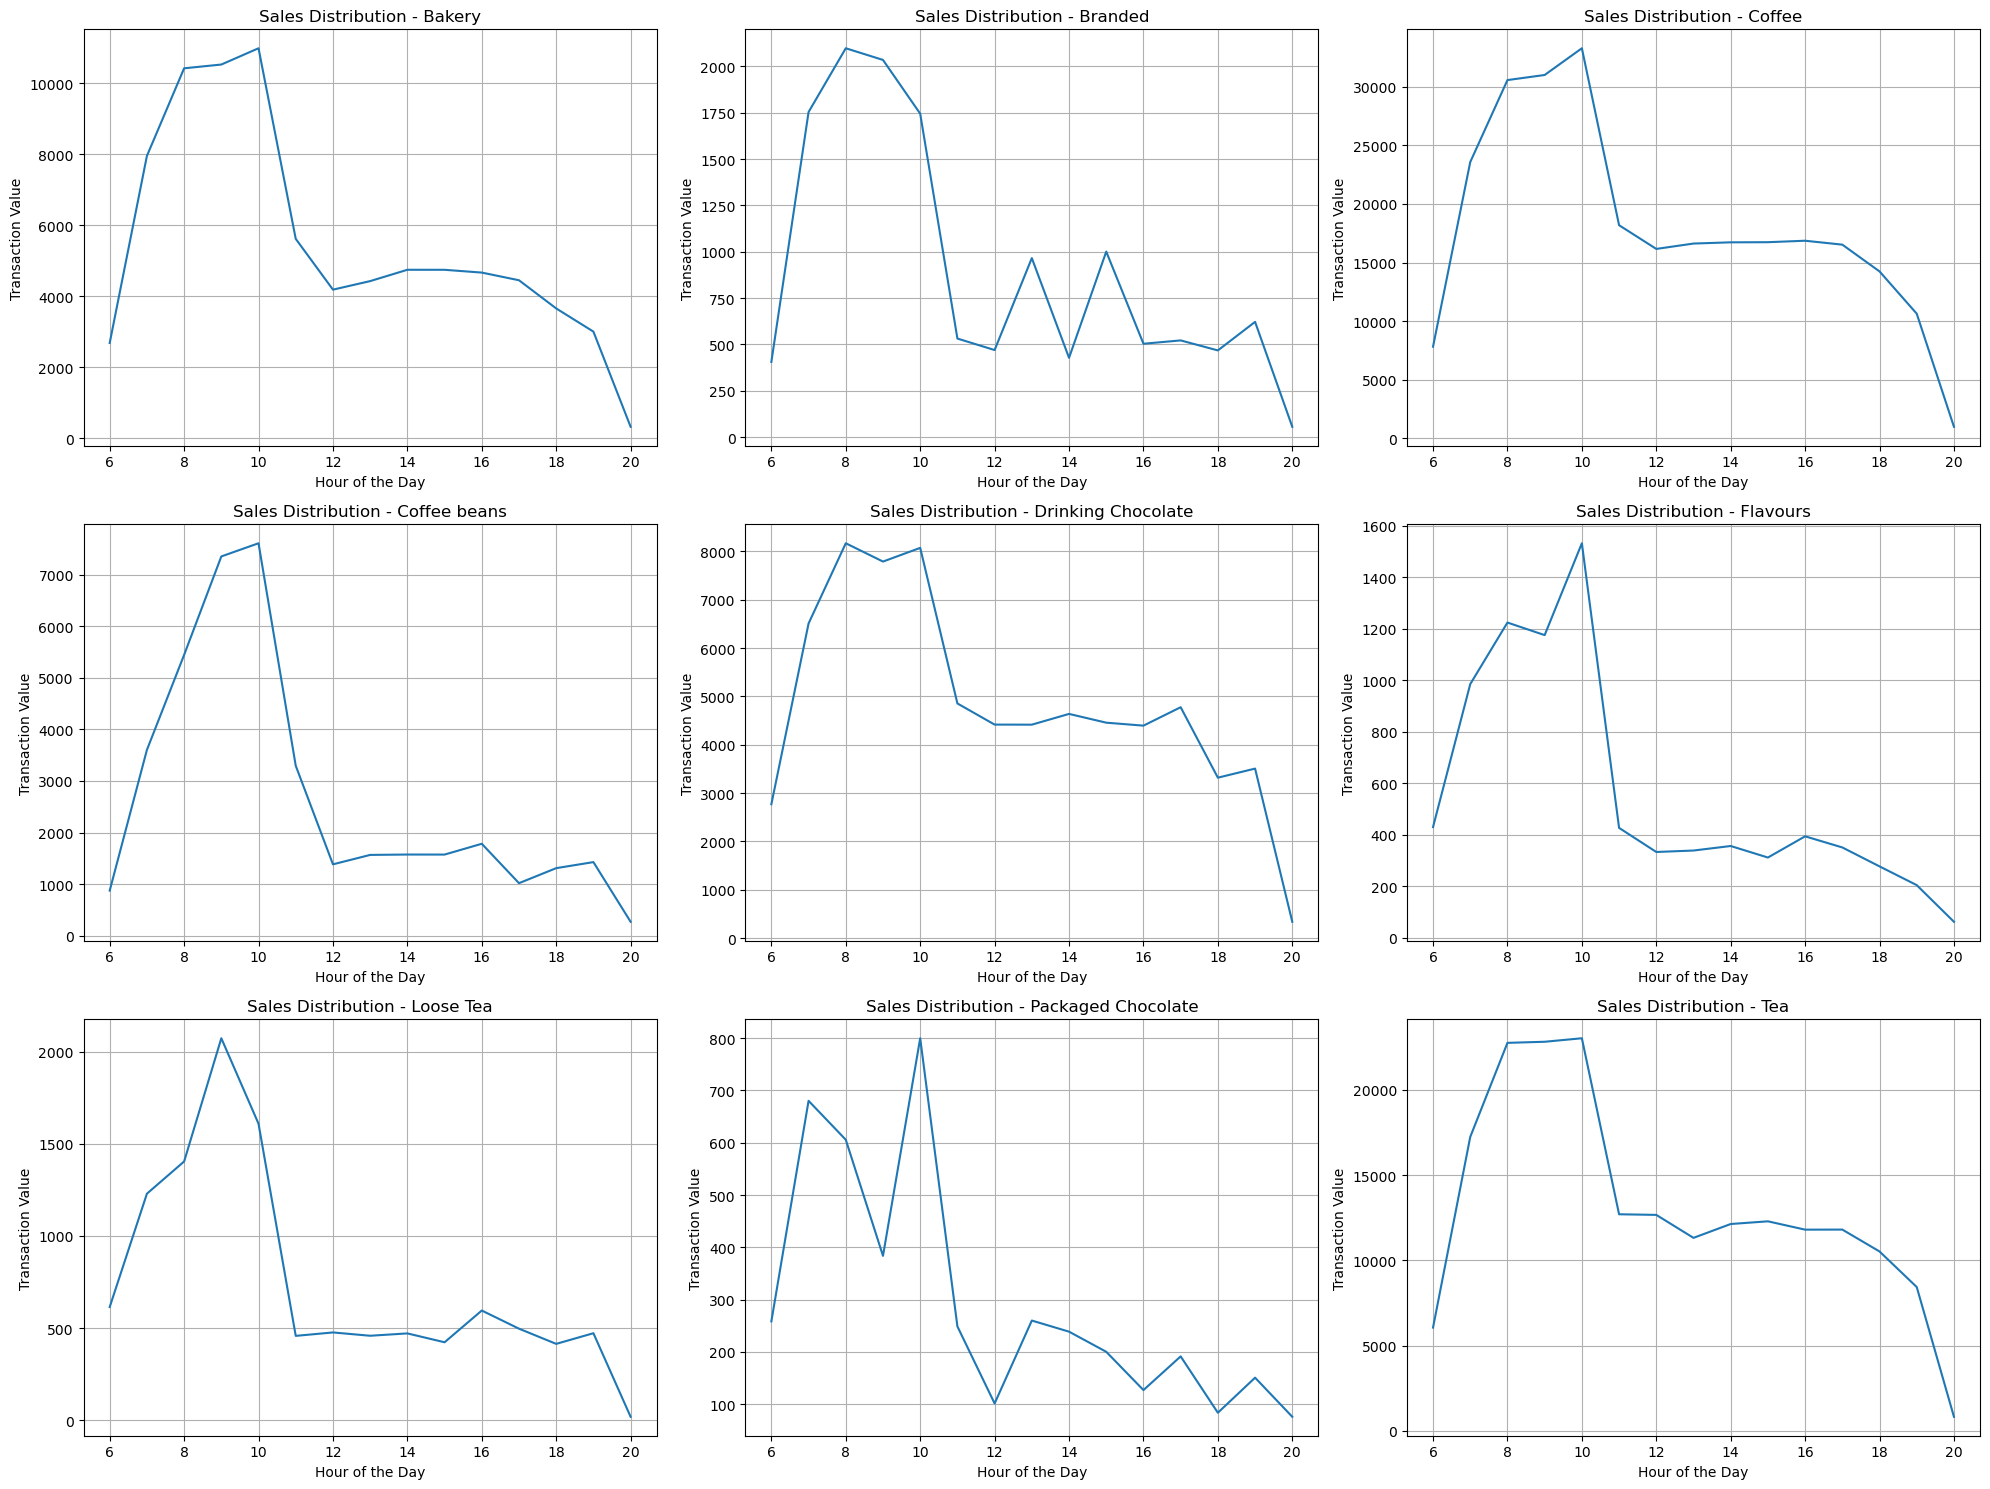

In [121]:
# Sales amount distribution (transaction_value) by hour of the day for each product category

sales_hour_category = data.groupby(['hour', 'product_category'])['transaction_value'].sum().reset_index()
product_categories = sales_hour_category['product_category'].unique()

n_categories = len(product_categories)
n_rows = (n_categories + 2) // 3  # 3 charts per row
plt.figure(figsize=(20, 5 * n_rows))

for i, category in enumerate(product_categories):
    plt.subplot(n_rows, 3, i + 1)
    cat_data = sales_hour_category[sales_hour_category['product_category'] == category]

    sns.lineplot(data=cat_data, x='hour', y='transaction_value')

    plt.title(f"Sales Distribution - {category}", fontsize=12)
    plt.xlabel("Hour of the Day")
    plt.ylabel("Transaction Value")
    plt.grid(True)

plt.tight_layout()
plt.show()

##### Sales amount distribution (transaction_value) by day of the week for each product category

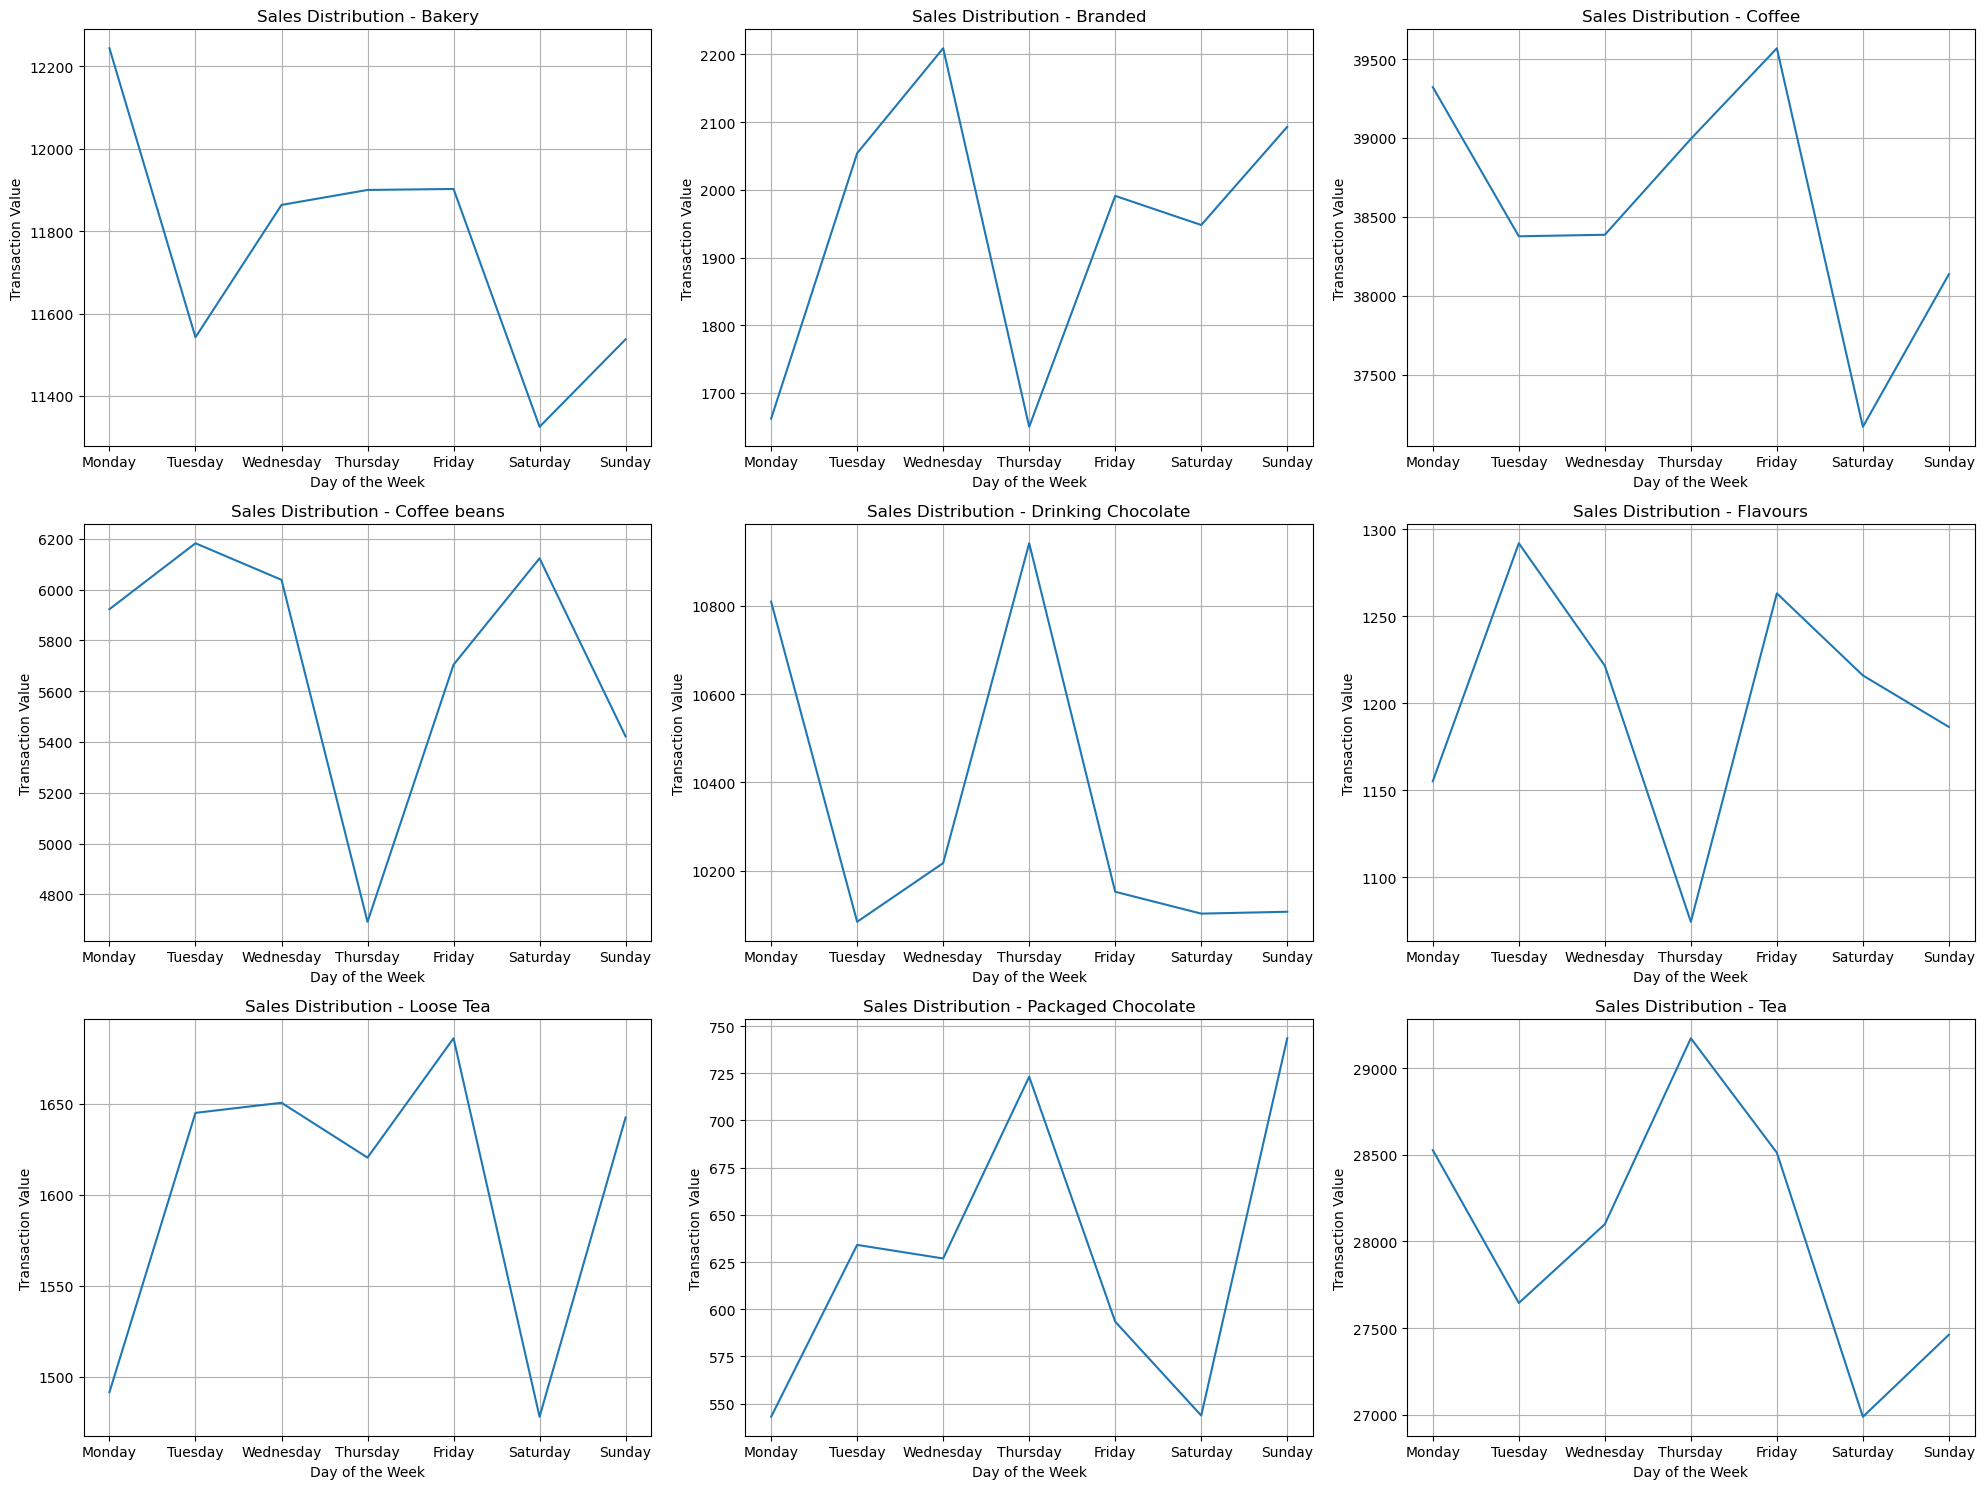

In [122]:
# Sales amount distribution (transaction_value) by day of the week for each product category

# Ensure day_of_week is ordered from Monday to Sunday
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_day_category = data.groupby(['day_of_week', 'product_category'])['transaction_value'].sum().reset_index()
sales_day_category['day_of_week'] = pd.Categorical(sales_day_category['day_of_week'], categories=days_order, ordered=True)

product_categories = sales_day_category['product_category'].unique()
n_categories = len(product_categories)
n_rows = (n_categories + 2) // 3  # 3 charts per row
plt.figure(figsize=(20, 5 * n_rows))

for i, category in enumerate(product_categories):
    plt.subplot(n_rows, 3, i + 1)
    cat_data = sales_day_category[sales_day_category['product_category'] == category]

    sns.lineplot(data=cat_data, x='day_of_week', y='transaction_value')

    plt.title(f"Sales Distribution - {category}", fontsize=12)
    plt.xlabel("Day of the Week")
    plt.ylabel("Transaction Value")
    # plt.ylim(0, sales_day_category['transaction_value'].max() * 1.1)
    plt.grid(True)

plt.tight_layout()
plt.show()

## **Results and Recommendations:**

This report presents an analysis of Maven Roasters' sales data, covering a period of 181 days from January 1, 2023, to June 30, 2023. The dataset includes 149,116 transactions across three New York City locations: Astoria, Hell's Kitchen, and Lower Manhattan. The analysis aims to identify key trends and opportunities for maximizing revenue.

**Key Findings**

*   **Overall Performance:** Maven Roasters generated a total revenue of $698,812.33 from 149,116 transactions. The average daily revenue was $3,860.84, with an average of 823.85 transactions per day. There was consistent month-on-month growth in sales and transaction counts from January to June, with approximately a **104% increase in transaction count and 103.8% increase in sales amount**.
*   **Product Performance:**
    *   **Coffee** is the top revenue driver, contributing approximately 38% of total sales.
    *   **Tea** is also a significant contributor, accounting for 29% to 33% of sales.
    *   **Coffee Beans** and **Branded** products are premium items, with high average unit prices and transaction values. These products are key for high-value transactions.
    *   **Flavors** have a low average unit price but the highest average quantity per transaction.
    *   **Bakery** and **Drinking Chocolate** have moderate prices and are purchased less frequently.
*   **Location Performance:**
    *   Sales are evenly distributed across all three locations, with **Hell's Kitchen** slightly leading.
    *   All three locations show consistent monthly growth with minimal differences in revenue.
    *  **Hell's Kitchen** leads in Coffee Bean sales, accounting for 46% of the category's total sales.
*   **High-Value Transactions (HVT):**
    *   HVT make up only 2.19% of total transactions but contribute 9.08% of the total sales revenue.
    *   The average value of an HVT is $19.38, significantly higher than the overall average of $4.69.
    *   **Coffee Beans** and **Branded** categories are key for high-value transactions. All transactions in the Branded category are classified as high-value.
*   **Temporal Trends:**
    *   Transaction frequency and sales revenue peak between 8 AM and 11 AM.
    *   There is a noticeable decline in transactions and revenue between 12 PM and 2 PM.
    *   Sales patterns are relatively stable across different days of the week.
*  **Pricing and Quantity**: There is a **weak negative correlation** between unit price and transaction quantity, meaning as unit price increases, transaction quantity tends to decrease, but the relationship is not very strong. In contrast, there is a **strong positive correlation** between unit price and transaction value, indicating that higher-priced products tend to generate higher transaction values.

**Recommendations**

*   **Focus on High-Value Products**: Strengthen offerings in the **Coffee Beans** and **Branded** categories, ensuring they are well-stocked and promoted.
*   **Maximize Coffee and Tea Sales**: Given that **Coffee** and **Tea** sales make up two-thirds of revenue, maximize sales of these products.
*   **Optimize Staffing**: Ensure adequate staffing during peak hours (8 AM to 11 AM) and consider promotions during the midday dip.
*   **Enhance Sales in Other Categories**: Boost high-value sales in **Tea, Bakery, and Flavors** categories by bundling them with higher-value items or offering special promotions.
*   **Location-Specific Promotions**: Leverage each store's unique sales trends, such as Hell's Kitchen for Coffee Beans, and offer tailored promotions accordingly.
*   **Strategic Pricing**: Consider strategic pricing adjustments on premium items while maintaining competitive pricing for frequently purchased items like tea and coffee.

**Conclusion**

Maven Roasters has shown strong overall performance during the analyzed period, with consistent growth in both sales revenue and transaction counts. By strategically focusing on high-value products, optimizing staffing and promotions, leveraging location-specific trends, and analyzing customer behavior patterns, Maven Roasters can further maximize profits across all locations.
